## 파일 불러오기

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import csv
import os
import seaborn as sns

plt.rc('font', family='Malgun Gothic')


def read_csv_without_hash(filepath):
    with open(filepath, newline='', encoding='utf-8') as csvfile:
        data = []
        reader = csv.reader(csvfile)
        skip_rows = 0
        for row in reader:
            if row and row[0].startswith('#'):
                continue
            if skip_rows  > 0:
                skip_rows -= 1
                continue
            data.append(row)

    df = pd.DataFrame(data[1:])
    df.columns = df.iloc[0]
    df = df.drop(df.index[0])
    return df

In [2]:
first_half_order = pd.read_csv('first_half_order.csv')
first_half_review = pd.read_csv('first_half_review.csv')
second_half_order = pd.read_csv('second_half_order.csv')
second_half_review = pd.read_csv('second_half_review.csv')
member_info = pd.read_csv('member_info.csv')
product_info = pd.read_excel('product_info.xlsx')

In [3]:
new_first_half_order = pd.read_csv('추가 데이터/new_first_half_order.csv')
new_second_half_order = pd.read_csv('추가 데이터/new_second_half_order.csv')
ricomanz_productinfo = pd.read_excel('추가 데이터/ricomanz_productinfo.xlsx')
ricomanz_promotion_event = pd.read_excel('추가 데이터/ricomanz_promotion_event.xlsx')

In [4]:
구매항목관련 = read_csv_without_hash('Google Analytics DATA/구매항목관련.csv') # 상품들의 인기를 볼 수 있음
사용자획득 = read_csv_without_hash('Google Analytics DATA/사용자획득.csv')
이벤트별참여도 = read_csv_without_hash('Google Analytics DATA/이벤트별참여도.csv')
인구통계세부정보 = read_csv_without_hash('Google Analytics DATA/인구통계세부정보.csv')
전환수 = read_csv_without_hash('Google Analytics DATA/전환수.csv')
트래픽획득 = read_csv_without_hash('Google Analytics DATA/트래픽획득.csv')
페이지별조회수 = read_csv_without_hash('Google Analytics DATA/페이지별조회수.csv')
플랫폼별사용자 = read_csv_without_hash('Google Analytics DATA/플랫폼별사용자.csv')
플랫폼별세부정보 = read_csv_without_hash('Google Analytics DATA/플랫폼별세부정보.csv')

In [5]:
페이지별조회수['페이지 경로 및 화면 클래스']

1                                                      /
2                               /product/list_thumb.html
3      /product/%ED%98%B8%EC%95%88%EC%98%A4%EB%8B%89%...
4      /product/%EC%9E%90%EB%A7%88%EB%85%B8-%EB%A0%88...
5       /product/자마노-레브스톤-4mm/975/category/42/display/1/
                             ...                        
769    /product/%ED%9D%91%EC%9A%94%EC%84%9D-%ED%81%90...
770                            /product/골드오닉스-다임스톤/1080/
771                            /product/리체-마제스톤-세트/1075/
772                          /product/블랙가드-마제스톤-세트/1073/
773                          /product/테라헤르츠-아우라-키링/1109/
Name: 페이지 경로 및 화면 클래스, Length: 773, dtype: object

In [6]:
사용자개요 = read_csv_without_hash('Google Analytics DATA/사용자개요.csv') #국가별사용자, 도시별사용자, 언어별사용자 데이터로 나눔

국가별사용자 = pd.concat([사용자개요.iloc[0:38], 사용자개요.iloc[40:47]])

도시별사용자 = 사용자개요.iloc[49:405].reset_index(drop=True)
도시별사용자.columns = 사용자개요.iloc[48]

언어별사용자 = 사용자개요.iloc[416:].reset_index(drop=True)
언어별사용자.columns = 사용자개요.iloc[415]

In [7]:
사용자유지관련 = read_csv_without_hash('Google Analytics DATA/사용자유지관련.csv')

신규유저 = 사용자유지관련.iloc[:26, :2]

재사용유저 = 사용자유지관련.iloc[28:54, :2].reset_index(drop=True)
재사용유저.columns = ['N주', '재사용자']

사용자유지관련.iloc[56:421]

사용자유지관련.iloc[423:788]

사용자 = 사용자유지관련.iloc[790:832, :2]
사용자.columns = ['사용자 집단', '사용자']

평균참여시간 = 사용자유지관련.iloc[834:876, :2]
평균참여시간.columns = ['사용자 집단', '평균참여시간']

평생가치 = 사용자유지관련.iloc[879:, :2]
평생가치.columns = ['사용자 집단', '평생 가치(LTV)']

In [8]:
Funnel_Data = read_csv_without_hash('Google Analytics DATA/Funnel Data/Funnel Data.csv')
Funnel_Data.columns = Funnel_Data.iloc[0]
Funnel_Data = Funnel_Data[1:17]

In [9]:
기기별구매여정 = read_csv_without_hash('Google Analytics DATA/구매 여정/기기별구매여정.csv')
브라우저별구매여정 = read_csv_without_hash('Google Analytics DATA/구매 여정/브라우저별구매여정.csv')
지역별구매여정 = read_csv_without_hash('Google Analytics DATA/구매 여정/지역별구매여정.csv')

In [10]:
Purchase전환 = read_csv_without_hash('Google Analytics DATA/방문 페이지 관련/Purchase전환.csv')
결제완료전환 = read_csv_without_hash('Google Analytics DATA/방문 페이지 관련/결제완료전환.csv')
결제하기클릭전환 = read_csv_without_hash('Google Analytics DATA/방문 페이지 관련/결제하기클릭전환.csv')
방문페이지총전환수 = read_csv_without_hash('Google Analytics DATA/방문 페이지 관련/방문페이지총전환수.csv')

In [11]:
ricomanz_productinfo_category = pd.read_excel('추가 데이터/ricomanz_productinfo_category.xlsx')

## 1차 EDA & 전처리

In [12]:
ricomanz_promotion_event

,이벤트 기간,이벤트 명,이벤트 내용
0,2023.04.29 ~ 2023.05.03,가정의 달 이벤트,"선물용 종이가방 증정 (전고객, 구매수량당)"
1,2023.11.01 ~ 2023.11.12,종이가방 증정 이벤트,"선물용 종이가방 증정 (전고객, 구매수량당)"
2,2023.11.01 ~ 2023.11.12,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매)
3,2023.12.08 ~ 2023.12.31,새해 맞이 이벤트,"2024 엽서, 선물용 종이 가방 증정 (전고객, 구매수량당)"
4,2024.01.05 ~ 2024.01.19,새해 이벤트,"리코 호안석 키링(이벤트용, 미판매) 증정 (전고객, 구매수량당)"
5,2024. 01.30 ~ 2024.02.12,구정 이벤트,"청룡엽서, 미니 호안석, 선물 쇼핑백 (전고객, 구매수량당)"


In [13]:
ricomanz_promotion_event.iloc[:,1:]

,이벤트 명,이벤트 내용
0,가정의 달 이벤트,"선물용 종이가방 증정 (전고객, 구매수량당)"
1,종이가방 증정 이벤트,"선물용 종이가방 증정 (전고객, 구매수량당)"
2,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매)
3,새해 맞이 이벤트,"2024 엽서, 선물용 종이 가방 증정 (전고객, 구매수량당)"
4,새해 이벤트,"리코 호안석 키링(이벤트용, 미판매) 증정 (전고객, 구매수량당)"
5,구정 이벤트,"청룡엽서, 미니 호안석, 선물 쇼핑백 (전고객, 구매수량당)"


In [14]:
order_df = pd.concat([new_first_half_order, new_second_half_order])
# review_df = pd.concat([first_half_review, second_half_review])
review_df = pd.read_csv('review_df.csv')

In [15]:
# order_df['주문일시'] = pd.to_datetime(order_df['주문일시']).dt.strftime('%Y-%m-%d')
order_df['주문일시'] = pd.to_datetime(order_df['주문일시'])

In [16]:
order_df.loc[(order_df['주문일시'] >= '2023-04-29') & (order_df['주문일시'] <= '2023-05-03'), '이벤트 명'] = '가정의 달 이벤트'
order_df.loc[(order_df['주문일시'] >= '2023-11-01') & (order_df['주문일시'] <= '2023-11-12'), '이벤트 명'] = '10만원 이상 구매 이벤트'
order_df.loc[(order_df['주문일시'] >= '2023-12-08') & (order_df['주문일시'] <= '2023-12-31'), '이벤트 명'] = '새해 맞이 이벤트'
order_df.loc[(order_df['주문일시'] >= '2024-01-05') & (order_df['주문일시'] <= '2024-01-19'), '이벤트 명'] = '새해 이벤트'
order_df.loc[(order_df['주문일시'] >= '2024-01-30') & (order_df['주문일시'] <= '2024-02-12'), '이벤트 명'] = '구정 이벤트'

In [17]:
order_df = pd.merge(order_df, ricomanz_promotion_event.iloc[:,1:], on='이벤트 명', how='left')

In [18]:
order_df['이벤트 명'] = order_df['이벤트 명'].fillna('이벤트 없음')

In [19]:
order_df['주문자 주소'] = order_df['주문자 주소'] + order_df['주문자 상세 주소'].fillna('')

In [20]:
print('결측치 없애기 전')
print(order_df.isna().sum())
order_df.dropna(subset=['주문자 주소', '총 주문금액'], inplace=True)
print('--------------------------')
print('없앤 후')
print(order_df.isna().sum())

결측치 없애기 전
주문일시                     0
주문자ID                 9411
주문 시 회원등급             9411
총 주문금액                   3
총 결제금액                   0
주문상품명                    0
수량                       0
판매가                      0
주문자 가입일               9411
주문자 주소                   1
주문자 상세 주소               27
주문자우편번호                  1
총 배송비 (전체 품목에 표시)        0
총 실제 환불금액                0
사용한 쿠폰명              10301
주문서 쿠폰 할인금액          10301
쿠폰 할인금액(최초)              0
결제수단                     0
주문번호                     0
이벤트 명                    0
이벤트 내용               10652
dtype: int64
--------------------------
없앤 후
주문일시                     0
주문자ID                 9410
주문 시 회원등급             9410
총 주문금액                   0
총 결제금액                   0
주문상품명                    0
수량                       0
판매가                      0
주문자 가입일               9410
주문자 주소                   0
주문자 상세 주소               26
주문자우편번호                  0
총 배송비 (전체 품목에 표시)        0
총 실제 환불금액                0


In [21]:
order_df = order_df[order_df['사용한 쿠폰명'] != '30% 할인쿠폰']
order_df = order_df[~((order_df['결제수단'].isin(['가상계좌', '무통장입금'])) & (order_df['총 결제금액']==0) & (order_df['총 실제 환불금액']==0))]

In [22]:
order_df = order_df[~((order_df.duplicated(keep=False)) & ((order_df['수량'] + 1) * order_df['판매가'] > order_df['총 주문금액']))]
dup_order = order_df[((order_df.duplicated(keep=False)) & ((order_df['수량'] + 1) * order_df['판매가'] > order_df['총 주문금액']))].drop_duplicates()
order_df = pd.concat([order_df, dup_order])

In [23]:
order_df.loc[order_df['주문자ID'].isna(), '회원/비회원'] = '비회원'
order_df['회원/비회원'] = order_df['회원/비회원'].fillna('회원')

In [24]:
import hashlib

# 주문자 주소를 기반으로 새로운 ID 생성하는 함수
def generate_id(address):
    # 주문자 주소를 바이트로 변환하여 해시 값을 생성
    hash_object = hashlib.sha256(address.encode())
    # 해시 값을 16진수로 변환하여 새로운 ID로 사용
    new_id = hash_object.hexdigest()
    return new_id

# 주문자 주소를 기반으로 새로운 ID를 생성하여 '새로운ID' 열에 추가
order_df.loc[order_df['주문자ID'].isna(),'비회원ID'] = order_df.loc[order_df['주문자ID'].isna(), '주문자 주소'].apply(generate_id)

In [25]:
order_df['주문자ID'] = order_df['주문자ID'].fillna('')
order_df['비회원ID'] = order_df['비회원ID'].fillna('')
order_df['주문자ID'] = order_df['주문자ID'] + order_df['비회원ID']
order_df.drop('비회원ID', axis=1, inplace=True)

In [26]:
order_df.groupby(['주문자ID', '회원/비회원']).size().groupby('회원/비회원').size()

회원/비회원
비회원    6878
회원     1772
dtype: int64

In [27]:
order_df = pd.merge(order_df, ricomanz_productinfo_category[['상품명', '상품 카테고리']], left_on='주문상품명', right_on='상품명', how='left')

In [28]:
order_df = order_df.drop(columns='상품명')

In [29]:
order_df.shape

(12123, 23)

<AxesSubplot:xlabel='주문일시'>

,이벤트 기간,이벤트 명,이벤트 내용
0,2023.04.29 ~ 2023.05.03,가정의 달 이벤트,"선물용 종이가방 증정 (전고객, 구매수량당)"
1,2023.11.01 ~ 2023.11.12,종이가방 증정 이벤트,"선물용 종이가방 증정 (전고객, 구매수량당)"
2,2023.11.01 ~ 2023.11.12,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매)
3,2023.12.08 ~ 2023.12.31,새해 맞이 이벤트,"2024 엽서, 선물용 종이 가방 증정 (전고객, 구매수량당)"
4,2024.01.05 ~ 2024.01.19,새해 이벤트,"리코 호안석 키링(이벤트용, 미판매) 증정 (전고객, 구매수량당)"
5,2024. 01.30 ~ 2024.02.12,구정 이벤트,"청룡엽서, 미니 호안석, 선물 쇼핑백 (전고객, 구매수량당)"


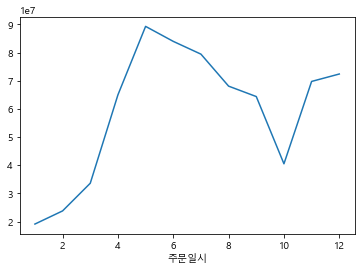

In [30]:
display(order_df.groupby(order_df['주문일시'].dt.month).sum()['총 주문금액'].plot())
display(ricomanz_promotion_event)

<AxesSubplot:xlabel='이벤트 명'>

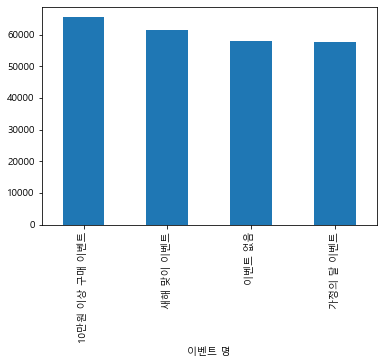

In [31]:
order_df.groupby('이벤트 명').mean()['총 주문금액'].sort_values(ascending=False).plot(kind='bar')

In [32]:
print('10만원 이상 구매 비율(10만원 이벤트 시)')
print(f"{order_df[(order_df['이벤트 명'] == '10만원 이상 구매 이벤트') & (order_df['총 주문금액'] >= 100000)].shape[0]/(order_df[order_df['이벤트 명'] == '10만원 이상 구매 이벤트'].shape[0])}")
print('-------------------------------------------')
print('10만원 이상 구매 비율')
print(f"{order_df[(order_df['이벤트 명'] != '10만원 이상 구매 이벤트') & (order_df['총 주문금액'] >= 100000)].shape[0]/(order_df[order_df['이벤트 명'] != '10만원 이상 구매 이벤트'].shape[0])}")

10만원 이상 구매 비율(10만원 이벤트 시)
0.18561484918793503
-------------------------------------------
10만원 이상 구매 비율
0.07842969551830312


In [33]:
order_df.columns

Index(['주문일시', '주문자ID', '주문 시 회원등급', '총 주문금액', '총 결제금액', '주문상품명', '수량', '판매가',
       '주문자 가입일', '주문자 주소', '주문자 상세 주소', '주문자우편번호', '총 배송비 (전체 품목에 표시)',
       '총 실제 환불금액', '사용한 쿠폰명', '주문서 쿠폰 할인금액', '쿠폰 할인금액(최초)', '결제수단', '주문번호',
       '이벤트 명', '이벤트 내용', '회원/비회원', '상품 카테고리'],
      dtype='object')

In [34]:
display(구매항목관련)
print(구매항목관련['상품 수익'].astype(float)/구매항목관련['구매한 상품'].astype(float))

,항목 이름,조회된 상품,장바구니에 추가된 상품,구매한 상품,상품 수익
1,호안오닉스 카네스톤,76577,4216,3497,128311257.95217
2,자마노 레브스톤 4mm,68719,3451,2470,91944102.321742
3,소달오닉스 블루스톤,29194,272,200,7562108.139313
4,레브스톤 포르테스톤 세트 4mm,19587,1122,702,34011635.343788
5,호안석 트레스톤,14652,878,688,25844232.136017
...,...,...,...,...,...
67,실버오닉스 아미스톤 팔찌,379,33,13,546219.156148
68,실버오닉스 아미스톤 목걸이+팔찌 세트,269,17,2,149749.200871
69,실버오닉스 아미스톤 목걸이,207,22,10,389950.068811
70,블랙 루이스 키링,161,12,11,527478.849657


1     36691.809537
2     37224.332924
3     37810.540697
4     48449.622997
5     37564.290895
          ...     
67    42016.858165
68    74874.600436
69    38995.006881
70    47952.622696
71    59009.731354
Length: 71, dtype: float64


In [35]:
member_info['회원 가입일'] = pd.to_datetime(member_info['회원 가입일'])
member_info['최종주문일'] = pd.to_datetime(member_info['최종주문일'])
member_info['최종접속일'] = pd.to_datetime(member_info['최종접속일'])

In [36]:
member_info[((member_info['총구매금액'] > 0) & (member_info['총 실주문건수'] == 0))].shape

(121, 12)

In [37]:
member_info = member_info[~((member_info['총구매금액'] > 0) & (member_info['총 실주문건수'] == 0))]

In [38]:
member_info['평균구매액'] = member_info['총구매금액']/member_info['총 실주문건수']

<AxesSubplot:xlabel='회원 가입일'>

,이벤트 기간,이벤트 명,이벤트 내용
0,2023.04.29 ~ 2023.05.03,가정의 달 이벤트,"선물용 종이가방 증정 (전고객, 구매수량당)"
1,2023.11.01 ~ 2023.11.12,종이가방 증정 이벤트,"선물용 종이가방 증정 (전고객, 구매수량당)"
2,2023.11.01 ~ 2023.11.12,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매)
3,2023.12.08 ~ 2023.12.31,새해 맞이 이벤트,"2024 엽서, 선물용 종이 가방 증정 (전고객, 구매수량당)"
4,2024.01.05 ~ 2024.01.19,새해 이벤트,"리코 호안석 키링(이벤트용, 미판매) 증정 (전고객, 구매수량당)"
5,2024. 01.30 ~ 2024.02.12,구정 이벤트,"청룡엽서, 미니 호안석, 선물 쇼핑백 (전고객, 구매수량당)"


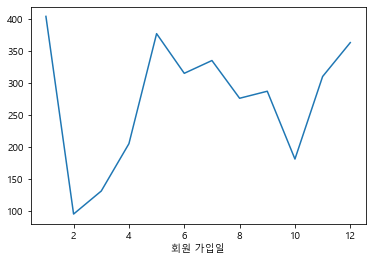

In [39]:
display(member_info.groupby(member_info['회원 가입일'].dt.month).size().plot())
display(ricomanz_promotion_event)

In [40]:
member_info['총 실주문건수'].value_counts()

1    1747
0    1307
2     186
3      34
4       5
Name: 총 실주문건수, dtype: int64

In [41]:
member_info.sort_values(by='총 방문횟수(1년 내)', ascending=False)

,아이디,회원 가입일,총구매금액,총 실주문건수,최종주문일,총적립금,사용가능 적립금,총 사용 적립금,최종접속일,총 방문횟수(1년 내),주소1,주소2,평균구매액
1761,2955943988@k,2023-08-09,122000,3,2023-08-21 19:51:27,3030.0,1130.0,1900.0,2023-09-25 13:28:27,33,NaN,NaN,40666.666667
2216,3042218349@k,2023-09-29,41000,1,2023-09-30 09:22:54,980.0,980.0,0.0,2023-10-06 12:00:33,27,NaN,NaN,41000.000000
1610,2939296470@k,2023-07-29,41000,1,2023-07-29 17:37:11,680.0,680.0,0.0,2023-10-03 10:07:49,26,경남 창원시 진해구 냉천로 262 중흥S-클래스아파트,106동 601호,41000.000000
704,2780341086@k,2023-05-08,166000,3,2024-01-09 19:21:43,2470.0,0.0,2090.0,2024-01-18 20:36:46,24,NaN,NaN,55333.333333
2428,3145896380@k,2023-11-03,134000,2,2023-11-24 23:42:10,1770.0,1770.0,0.0,2023-12-06 08:33:44,23,NaN,NaN,67000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2602729038@k,2022-12-31,0,0,NaT,0.0,0.0,0.0,2022-12-31 12:19:51,0,NaN,NaN,NaN
106,2602442888@k,2022-12-31,38000,1,2022-12-31 07:13:38,350.0,350.0,0.0,2022-12-31 07:11:09,0,NaN,NaN,38000.000000
105,2601117629@k,2022-12-30,41000,1,2022-12-30 05:28:37,380.0,380.0,0.0,2022-12-30 05:29:29,0,NaN,NaN,41000.000000
104,2600842791@k,2022-12-29,0,0,NaT,0.0,0.0,0.0,2022-12-29 22:00:12,0,NaN,NaN,NaN


In [42]:
member_info['최종주문-회원가입'] = (member_info['최종주문일'] - member_info['회원 가입일']).dt.days
member_info['최종주문-회원가입'] = member_info['최종주문-회원가입'].fillna('X')

In [43]:
ricomanz_productinfo.sort_values(by='결제수', ascending=False)

,상품코드,상품분류 번호,상품명,판매가,옵션사용,옵션입력,메인 원석,장바구니수,결제수,진열상태,상품번호,판매상태
51,P0000BBQ,42,호안오닉스 카네스톤,38000,Y,사이즈{S|M|L|XL},호안석,1375,5538,Y,718,Y
70,P0000BLY,49,자마노 레브스톤 4mm,38000,Y,사이즈{S|M|L|XL|,자마노,1028,1339,Y,986,Y
37,P0000BHB,42,호안석 트레스톤,38000,Y,사이즈{S|M|L|XL},호안석,35,491,Y,859,Y
67,P0000BME,49,레브스톤 포르테스톤 세트 4mm,49000,Y,사이즈{S|M|L|XL|,"자마노, 오닉스",337,469,Y,992,Y
40,P0000BGY,42,아이아게이트 디오스톤,43000,Y,사이즈{S|M|L|XL},아이아게이트,62,431,Y,856,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
30,P0000BMU,42,터키석 젬마스톤,36000,Y,사이즈{S|M|L|XL},터키석,0,11,N,1008,N
5,P0000BQO,42,로즈 크리스탈 아무르 키링,35000,N,NaN,로즈크리스탈,18,11,Y,1106,Y
3,P0000BQQ,42,하울라이트 젠 키링,35000,N,NaN,하울라이트,19,8,Y,1108,Y
47,P0000BCM,42,실버오닉스 아미스톤 목걸이+팔찌 세트,75000,N,NaN,"실버, 오닉스",0,7,N,740,N


In [44]:
트래픽획득

,세션 기본 채널 그룹(기본 채널 그룹),사용자,세션수,참여 세션수,세션당 평균 참여 시간,사용자당 참여 세션수,세션당 이벤트,참여율,이벤트 수,전환,총 수익
1,Organic Social,35619,52913,32588,29.933059928561978,0.9149049664504899,10.64987810178973,0.6158788955455181,563517,3781,123221048.610905
2,Direct,29803,38360,22028,29.6890771637122,0.7391202227963628,10.603206465067778,0.5742440041710115,406739,2647,84733738.895294
3,Paid Search,12125,18467,6426,17.07656901499973,0.5299793814432989,4.979314452807711,0.3479720582660963,91953,292,5867671.328082
4,Organic Search,3049,4816,3615,110.39659468438538,1.18563463430633,21.670058139534884,0.7506229235880398,104363,847,30986729.174441
5,Paid Social,2283,3637,2196,25.823480890844102,0.961892247043364,9.960681880670883,0.6037943359912016,36227,184,5265099.997197
6,Referral,1327,2189,1566,58.90634993147556,1.1801055011303692,14.453631795340337,0.7153951576062129,31639,307,11602746.542661
7,Unassigned,819,1239,486,56.958837772397096,0.5934065934065934,15.000807102502018,0.3922518159806295,18586,130,3520260.002861
8,Organic Shopping,584,834,626,83.39448441247002,1.071917808219178,19.646282973621105,0.750599520383693,16385,244,9175246.136629
9,Paid Other,440,680,426,35.254411764705885,0.9681818181818181,11.527941176470588,0.6264705882352941,7839,49,1440620.002259
10,Organic Video,5,5,4,35.4,0.8,10.2,0.8,51,0,0


* Organic Social: 소셜 미디어 플랫폼에서 유기적으로 생성된 트래픽, 즉 광고나 유료 홍보가 아닌 자연스럽게 발생한 트래픽을 의미합니다.
* Direct: 사용자가 웹사이트를 직접 방문한 경우를 나타냅니다. 이는 URL을 직접 입력하거나 즐겨찾기를 통해 사이트에 접근한 경우를 의미합니다.
* Paid Search: 검색 엔진에서 광고를 통해 유입된 트래픽을 나타냅니다. 보통 구글이나 베이직스 등의 검색 엔진을 통해 광고를 진행한 경우 해당됩니다.
* Organic Search: 검색 엔진에서 자연적으로 발생한 유기적인 트래픽을 나타냅니다. 즉, 광고가 아닌 검색 결과에서 사용자가 웹사이트로 유입된 경우입니다.
* Paid Social: 소셜 미디어 플랫폼에서 광고를 통해 유입된 트래픽을 나타냅니다.
* Referral: 다른 웹사이트에서 링크를 클릭하여 유입된 트래픽을 나타냅니다.
* Unassigned: 트래픽 소스가 명확히 식별되지 않은 경우에 사용됩니다.
* Organic Shopping: 쇼핑 검색 엔진이나 마켓플레이스에서 자연적으로 발생한 트래픽을 의미합니다.
* Paid Other: 유료로 홍보된 기타 트래픽 소스를 나타냅니다.
* Organic Video: 비디오 플랫폼에서 유기적으로 생성된 트래픽을 의미합니다.

# 고객 충성도에 대한 2차 EDA

### 리코맨즈의 회원 등급제
* VVIP : 100만원 이상 누적 구매 회원
* VIP : 50만원 이상 누적 구매 회원
* GOLD : 30만원 이상 누적 구매 회원
* SILVER ; 15만원 이상 누적 구매 회원

In [45]:
member_info.sort_values('최종접속일', ascending=False).head(1)

,아이디,회원 가입일,총구매금액,총 실주문건수,최종주문일,총적립금,사용가능 적립금,총 사용 적립금,최종접속일,총 방문횟수(1년 내),주소1,주소2,평균구매액,최종주문-회원가입
3323,3290076145@k,2024-01-17,0,0,NaT,0.0,0.0,0.0,2024-01-22 11:54:30,4,NaN,NaN,NaN,X


In [46]:
def grade(total):
    if total >= 1000000:
        return 'VVIP'
    elif total >= 500000:
        return 'VIP'
    elif total >= 300000:
        return 'GOLD'
    elif total >= 150000:
        return 'SILVER'
    else: return 'NORMAL'

In [47]:
member_total = member_info.groupby('아이디').sum()['총구매금액']
member_total.sort_values(ascending=False).to_frame()

,총구매금액
아이디,
2686391700@k,421000
3255600056@k,419000
3111510087@k,361000
2609515578@k,358000
2736456482@k,324000
...,...
2953417425@k,0
2953250113@k,0
2952531043@k,0


In [48]:
member_grade = member_total.apply(grade).to_frame().reset_index().rename(columns={'총구매금액':'등급'})

In [49]:
member_info = pd.merge(member_info, member_grade, on='아이디', how='left')

<AxesSubplot:>

,등급
NORMAL,3181
SILVER,92
GOLD,6


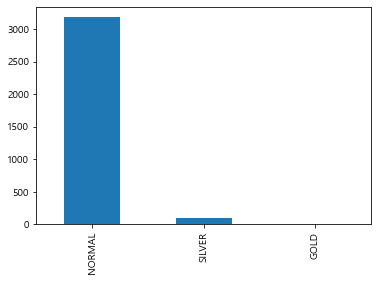

In [50]:
display(member_grade['등급'].value_counts().plot(kind='bar'))
display(member_grade['등급'].value_counts().to_frame())

In [51]:
member_info

,아이디,회원 가입일,총구매금액,총 실주문건수,최종주문일,총적립금,사용가능 적립금,총 사용 적립금,최종접속일,총 방문횟수(1년 내),주소1,주소2,평균구매액,최종주문-회원가입,등급
0,2225322623@k,2022-05-02,0,0,NaT,0.0,0.0,0.0,2022-05-02 10:42:50,0,NaN,NaN,NaN,X,NORMAL
1,2227223106@k,2022-05-03,0,0,NaT,0.0,0.0,0.0,2022-05-03 17:57:41,0,NaN,NaN,NaN,X,NORMAL
2,2227237644@k,2022-05-03,0,0,NaT,0.0,0.0,0.0,2022-05-03 18:10:50,0,NaN,NaN,NaN,X,NORMAL
3,swh773,2022-05-04,59800,1,2022-05-04 01:25:00,598.0,598.0,0.0,2022-05-06 18:55:21,0,NaN,NaN,59800.0,0.0,NORMAL
4,2228473259@k,2022-05-04,0,0,NaT,0.0,0.0,0.0,2022-05-04 16:37:46,0,NaN,NaN,NaN,X,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,3296057088@k,2024-01-21,0,0,NaT,0.0,0.0,0.0,2024-01-21 21:51:21,1,NaN,NaN,NaN,X,NORMAL
3275,3296068264@k,2024-01-21,45000,1,2024-01-21 22:03:01,420.0,0.0,0.0,2024-01-21 21:59:35,1,NaN,NaN,45000.0,0.0,NORMAL
3276,siksikki,2024-01-21,41000,1,2024-01-21 22:47:32,380.0,0.0,0.0,2024-01-21 22:36:54,1,NaN,NaN,41000.0,0.0,NORMAL
3277,3296212619@k,2024-01-21,0,0,NaT,0.0,0.0,0.0,2024-01-21 23:55:12,1,NaN,NaN,NaN,X,NORMAL


In [52]:
member_info[member_info['등급'] == 'GOLD']

,아이디,회원 가입일,총구매금액,총 실주문건수,최종주문일,총적립금,사용가능 적립금,총 사용 적립금,최종접속일,총 방문횟수(1년 내),주소1,주소2,평균구매액,최종주문-회원가입,등급
119,2609515578@k,2023-01-05,358000,2,2023-01-28 11:41:23,4720.0,4720.0,0.0,2023-01-28 11:38:20,1,NaN,NaN,179000.000000,23.0,GOLD
283,2686391700@k,2023-03-01,421000,3,2023-08-08 12:59:46,6460.0,6460.0,0.0,2023-08-08 12:54:27,5,NaN,NaN,140333.333333,160.0,GOLD
445,2736456482@k,2023-04-05,324000,4,2023-06-09 02:59:56,4110.0,1570.0,2540.0,2023-06-09 02:09:31,13,NaN,NaN,81000.000000,65.0,GOLD
1245,2879424968@k,2023-06-30,315000,2,2023-07-02 12:07:21,4290.0,4290.0,0.0,2023-07-02 11:52:44,3,NaN,NaN,157500.000000,2.0,GOLD
2256,3111510087@k,2023-10-23,361000,3,2023-12-05 02:34:22,3550.0,2760.0,790.0,2023-12-05 02:33:27,3,NaN,NaN,120333.333333,43.0,GOLD
3002,3255600056@k,2024-01-04,419000,1,2024-01-04 04:02:12,3020.0,0.0,0.0,2024-01-04 02:46:58,1,NaN,NaN,419000.000000,0.0,GOLD


<AxesSubplot:xlabel='회원 가입일'>

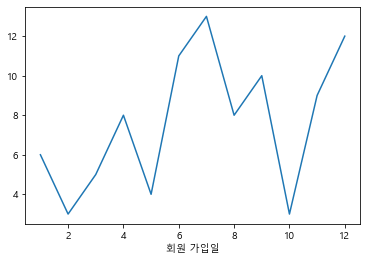

In [53]:
member_info[member_info['등급'] == 'SILVER'].groupby(member_info['회원 가입일'].dt.month).size().plot()

In [54]:
member_info[member_info['등급'] == 'SILVER']

,아이디,회원 가입일,총구매금액,총 실주문건수,최종주문일,총적립금,사용가능 적립금,총 사용 적립금,최종접속일,총 방문횟수(1년 내),주소1,주소2,평균구매액,최종주문-회원가입,등급
91,2594720306@k,2022-12-25,166000,4,2023-05-23 10:36:46,1840.0,490.0,1350.0,2023-05-23 10:36:04,1,NaN,NaN,41500.000000,149.0,SILVER
186,2642469765@k,2023-01-29,180000,2,2023-01-29 18:58:27,1740.0,1740.0,0.0,2023-04-20 08:02:32,4,NaN,NaN,90000.000000,0.0,SILVER
258,2673017177@k,2023-02-19,152000,2,2023-02-27 22:17:41,2360.0,1460.0,900.0,2023-03-03 10:40:13,8,NaN,NaN,76000.000000,8.0,SILVER
274,2681470260@k,2023-02-25,152000,2,2023-08-12 06:45:17,2560.0,1860.0,700.0,2023-08-12 06:39:58,2,NaN,NaN,76000.000000,168.0,SILVER
279,2684727367@k,2023-02-27,180000,2,2023-05-26 23:52:05,1740.0,540.0,1200.0,2023-05-31 12:38:27,6,NaN,NaN,90000.000000,88.0,SILVER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,3250034262@k,2024-01-01,280000,2,2024-01-16 19:10:26,3370.0,600.0,0.0,2024-01-16 19:08:55,13,NaN,NaN,140000.000000,15.0,SILVER
3092,3279616183@k,2024-01-10,181000,3,2024-01-16 15:42:41,2620.0,300.0,600.0,2024-01-16 15:42:19,2,NaN,NaN,60333.333333,6.0,SILVER
3099,3280210585@k,2024-01-10,152000,1,2024-01-10 23:01:45,3290.0,1800.0,0.0,2024-01-11 17:01:40,3,NaN,NaN,152000.000000,0.0,SILVER
3213,sara1516,2024-01-18,154000,1,2024-01-18 09:57:45,1510.0,0.0,0.0,2024-01-18 20:20:01,6,NaN,NaN,154000.000000,0.0,SILVER


<AxesSubplot:ylabel='최종주문-회원가입'>

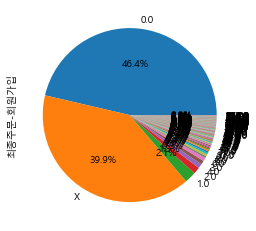

In [55]:
member_info['최종주문-회원가입'].value_counts().plot(kind='pie', autopct='%.1f%%')

<AxesSubplot:ylabel='최종주문-회원가입'>

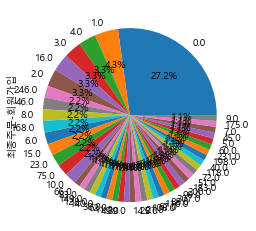

In [56]:
member_info[member_info['등급'] == 'SILVER']['최종주문-회원가입'].value_counts().plot(kind='pie', autopct='%.1f%%')

In [57]:
member_info.groupby('등급').mean()['총구매금액'].to_frame()

,총구매금액
등급,
GOLD,366333.333333
NORMAL,34388.022634
SILVER,186152.173913


<AxesSubplot:ylabel='총 실주문건수'>

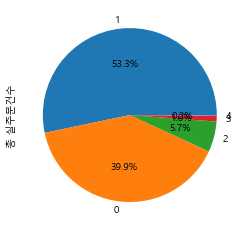

In [58]:
member_info['총 실주문건수'].value_counts().plot(kind='pie', autopct='%.1f%%')

<AxesSubplot:ylabel='None'>

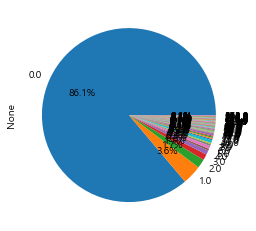

In [59]:
member_info[member_info['총 실주문건수'] == 1].groupby('최종주문-회원가입').size().plot(kind='pie', autopct='%.1f%%')

* 전체적인 충성도가 떨어진다
* 프로모션이 판매수익에 영향을 미친다
* 프로모션을 이요하여 충성도를 높인다?

In [60]:
review_df.groupby('상품명').mean()['리뷰평점'].to_frame().sort_values('리뷰평점')

,리뷰평점
상품명,
자마노 레브스톤 체인,3.000000
오닉스 케어스톤,3.769231
수에르 포르테스톤 세트,3.785714
실버오닉스 세트 앤느스톤+오닉스 케어링,4.100000
실버오닉스 앤느스톤,4.111111
...,...
자마노 크리스탈 블리스 키링,5.000000
터키석 글로리 키링,5.000000
터키석 젬마스톤,5.000000


In [61]:
order_numbers_to_remove = [
    '20231218-0000613', '20230527-0000414', '20230906-0000443', '20231016-0000220',
    '20230707-0000723', '20230811-0000753', '20230920-0000957', '20231016-0000166',
    '20230719-0000834', '20230512-0001392', '20230623-0000384', '20230805-0001308',
    '20231017-0000794', '20231214-0000657', '20231216-0000642', '20230429-0000795',
    '20230619-0001082', '20230902-0000030', '20231209-0000144', '20231213-0000803',
    '20231225-0000882', '20230326-0000282', '20230208-0000759', '20230607-0000216',
    '20231103-0000708', '20230903-0000993', '20230803-0000790', '20230903-0000769',
    '20231120-0000622', '20231215-0000121', '20230601-0000920', '20230607-0001602',
    '20230617-0000703', '20231108-0001066', '20231231-0000814', '20230912-0001606',
    '20230830-0001019', '20231123-0000702', '20231210-0000134', '20231226-0000822',
    '20230718-0000769', '20231027-0000417', '20231205-0000506', '20230131-0000453',
    '20230717-0000861', '20230803-0000262', '20230821-0000978', '20231103-0000865',

    '20231119-0000402', '20231212-0000315', '20231217-0000076', '20230514-0001587',
    '20230203-0000339', '20230401-0000360', '20230414-0000994', '20230427-0001271',
    '20230512-0000090', '20230522-0000587', '20230602-0001088', '20230605-0001172',
    '20230706-0000051', '20230720-0000693', '20230723-0000168', '20230803-0000716',
    '20230815-0001020', '20230906-0000808', '20230910-0000378', '20230916-0000208',
    '20231104-0000109', '20231119-0000365', '20231226-0000755', '20231229-0000737',
    '20230321-0000272', '20230730-0001079', '20231013-0000016', '20231124-0000849',
    '20231206-0000264', '20231208-0000445', '20230711-0001425', '20231014-0000775',
    '20231210-0000376', '20230415-0001156', '20230421-0000674', '20230829-0001184',
    '20231227-0000652', '20231230-0000229', '20230520-0000442', '20231130-0000169'
]


order_df = order_df[~order_df['주문번호'].isin(order_numbers_to_remove)]

In [62]:
order_df[order_df[['주문상품명','주문번호']].duplicated(keep=False)].sort_values(by='주문번호')

,주문일시,주문자ID,주문 시 회원등급,총 주문금액,총 결제금액,주문상품명,수량,판매가,주문자 가입일,주문자 주소,...,총 실제 환불금액,사용한 쿠폰명,주문서 쿠폰 할인금액,쿠폰 할인금액(최초),결제수단,주문번호,이벤트 명,이벤트 내용,회원/비회원,상품 카테고리
0,2023-01-01 08:23:31,777c68d982dbe0008723a7812ff4853a635232c7bc2bdc...,NaN,38000.0,38000.0,호안닉스 리치스톤,1,35000.0,NaN,경상남도 합천군 합천읍 옥산로 43 2층좌측,...,0.0,NaN,NaN,0.0,신용카드,20230101-0000221,이벤트 없음,NaN,비회원,팔찌
1,2023-01-01 08:23:31,777c68d982dbe0008723a7812ff4853a635232c7bc2bdc...,NaN,38000.0,38000.0,호안닉스 리치스톤,1,35000.0,NaN,경상남도 합천군 합천읍 옥산로 43 2층좌측,...,0.0,NaN,NaN,0.0,신용카드,20230101-0000221,이벤트 없음,NaN,비회원,팔찌
2,2023-01-01 08:38:22,c6e2c0b5b4fde839142393a017067c76f3c3bc733ec06d...,NaN,38000.0,34114.0,호안닉스 리치스톤,1,35000.0,NaN,"경기도 광주시 오포읍 창뜰아랫길 11-5 (오포읍, 프린스타운)101동302",...,0.0,NaN,NaN,0.0,신용카드,20230101-0000242,이벤트 없음,NaN,비회원,팔찌
3,2023-01-01 08:38:22,c6e2c0b5b4fde839142393a017067c76f3c3bc733ec06d...,NaN,38000.0,34114.0,호안닉스 리치스톤,1,35000.0,NaN,"경기도 광주시 오포읍 창뜰아랫길 11-5 (오포읍, 프린스타운)101동302",...,0.0,NaN,NaN,0.0,신용카드,20230101-0000242,이벤트 없음,NaN,비회원,팔찌
4,2023-01-01 09:02:48,8c026bf847ee7a4f4c9417d04fc14a8d54799600eabb5e...,NaN,73000.0,72650.0,호안닉스 리치스톤,1,35000.0,NaN,"충청북도 충주시 형설로 32 (호암동, 세영더-조은아파트)102-303",...,0.0,NaN,NaN,0.0,신용카드,20230101-0000269,이벤트 없음,NaN,비회원,팔찌
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12117,2023-12-31 22:22:20,dce84573ea2b6bf5a2d3a09fa9b317800be8c5ffdbfd80...,NaN,79000.0,0.0,호안오닉스 카네스톤,1,38000.0,NaN,"충청남도 천안시 서북구 성성9로 14 (성성동, 천안레이크타운2차 푸르지오)212동...",...,0.0,NaN,NaN,0.0,선불금,20231231-0000959,이벤트 없음,NaN,비회원,팔찌
12118,2023-12-31 22:22:20,dce84573ea2b6bf5a2d3a09fa9b317800be8c5ffdbfd80...,NaN,79000.0,0.0,호안오닉스 카네스톤,1,38000.0,NaN,"충청남도 천안시 서북구 성성9로 14 (성성동, 천안레이크타운2차 푸르지오)212동...",...,0.0,NaN,NaN,0.0,선불금,20231231-0000959,이벤트 없음,NaN,비회원,팔찌
12121,2023-12-31 22:38:32,e0085cebf0b4c1c3bd0126bf0e8662816185459c9f1e39...,NaN,79000.0,78087.0,호안오닉스 카네스톤,1,38000.0,NaN,"인천광역시 계양구 도두리로 52 (작전동, 도두리마을 동보아파트)508동 2007호",...,0.0,NaN,NaN,0.0,신용카드,20231231-0000978,이벤트 없음,NaN,비회원,팔찌
12120,2023-12-31 22:38:32,e0085cebf0b4c1c3bd0126bf0e8662816185459c9f1e39...,NaN,79000.0,78087.0,호안오닉스 카네스톤,1,38000.0,NaN,"인천광역시 계양구 도두리로 52 (작전동, 도두리마을 동보아파트)508동 2007호",...,0.0,NaN,NaN,0.0,신용카드,20231231-0000978,이벤트 없음,NaN,비회원,팔찌


In [63]:
#order_df.to_csv('전처리완료/order_df.csv', encoding='utf-8-sig')

### 추천시스템에 대해서

* 돌의 효능, 의미 등으로 추천시스템 구축
* 색이나 인기 상품으로도 가능

### 리뷰 분석

* 크롤링으로 추가 데이터 수집

### 1차 발표 준비 : 시각화

In [64]:
member_info2 = member_info[member_info['총 실주문건수'] > 0]

In [65]:
member_info2.loc[member_info2['총 실주문건수'] == 1, '구매 횟수'] = '1회 구매자'

C:\Users\USER\AppData\Local\Temp\ipykernel_29556\4263803838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_info2.loc[member_info2['총 실주문건수'] == 1, '구매 횟수'] = '1회 구매자'


In [66]:
member_info2['구매 횟수'] = member_info2['구매 횟수'].fillna('2회 이상 구매자')

C:\Users\USER\AppData\Local\Temp\ipykernel_29556\2003549728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_info2['구매 횟수'] = member_info2['구매 횟수'].fillna('2회 이상 구매자')


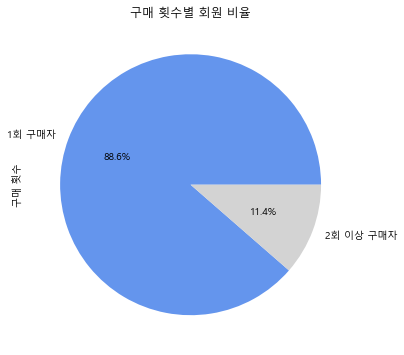

In [67]:
plt.figure(figsize=(8, 6))
member_info2['구매 횟수'].value_counts().plot(kind='pie', autopct='%.1f%%', colors=['cornflowerblue', 'lightgrey'])

plt.title('구매 횟수별 회원 비율')
plt.show()

In [68]:
member_info2.loc[(member_info2['구매 횟수'] == '1회 구매자') & (member_info2['최종주문-회원가입'] == 0), '구매 시점'] = '회원가입을 하고 바로 구매'

C:\Users\USER\AppData\Local\Temp\ipykernel_29556\3880942210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_info2.loc[(member_info2['구매 횟수'] == '1회 구매자') & (member_info2['최종주문-회원가입'] == 0), '구매 시점'] = '회원가입을 하고 바로 구매'


In [69]:
member_info2['구매 시점'] = member_info2['구매 시점'].fillna('기타')

C:\Users\USER\AppData\Local\Temp\ipykernel_29556\3725679502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_info2['구매 시점'] = member_info2['구매 시점'].fillna('기타')


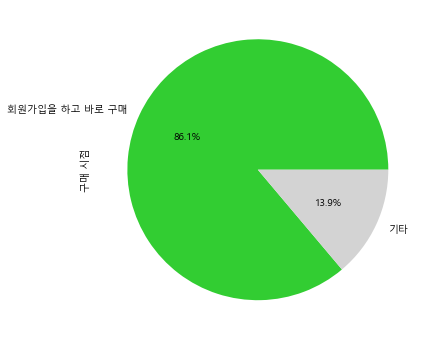

In [70]:
plt.figure(figsize=(8,6))
member_info2[member_info2['구매 횟수'] == '1회 구매자']['구매 시점'].value_counts().plot(kind='pie', autopct='%.1f%%', colors=['LimeGreen', 'Lightgrey'])

plt.show()

In [71]:
review_df

,﻿리뷰번호,리뷰작성일시,작성자ID,주문번호,상품명,리뷰평점,리뷰내용,포토URL1,포토URL2,포토URL3,...,포토URL5,동영상URL1,빠른리뷰,텍스트리뷰,포토리뷰,동영상리뷰,설문리뷰,SNS리뷰,작성플랫폼,지급완료적립금액
0,547,2023-01-01 00:00:00,비회원,NaN,실버오닉스 앤느스톤,5,생각보다 괜찮았어요.. 우리 딸도 사주려구요 ~^^,NaN,NaN,NaN,...,NaN,NaN,False,True,False,False,False,False,알파리뷰,0
1,548,2023-01-01 00:00:00,비회원,NaN,로즈문 미스티스톤,5,디자인도 이쁘구요.깔끔하게 상자포장으로 오니 선물하기도 좋아 보입니다,NaN,NaN,NaN,...,NaN,NaN,False,True,False,False,False,False,알파리뷰,0
2,549,2023-01-01 00:00:00,비회원,NaN,로즈크리스탈 에머스톤,5,은은해서 튀지도 않고 좋아요*^ 사이즈도 조코 연령대 상관없이 추천만해요~,NaN,NaN,NaN,...,NaN,NaN,False,True,False,False,False,False,알파리뷰,0
3,550,2023-01-01 00:00:00,비회원,NaN,로즈문 미스티스톤,5,심플한걸 찾고있었는데 사이즈도 원하던 사이즈에 무엇보다 보자마자 반해서 구매했어요~...,NaN,NaN,NaN,...,NaN,NaN,False,True,False,False,False,False,알파리뷰,0
4,551,2023-01-01 00:00:00,비회원,NaN,로즈크리스탈 코이스톤,5,마음에 쏙 들어요~*^^,NaN,NaN,NaN,...,NaN,NaN,False,True,False,False,False,False,알파리뷰,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4116,4777,2023-12-31 12:45:00,4303cc883bd240dd612e90dbd7a8f14effbb5bb2a1b9db...,20231227-0000674,호안오닉스 엔고르 키링,5,잘 산 것 같아 기분이 좋아요 😍😍,NaN,NaN,NaN,...,NaN,NaN,True,False,False,False,False,False,알파리뷰,300
4117,4778,2023-12-31 17:43:00,2828745697@k,20231229-0000094,레브스톤 포르테스톤 세트 4mm,3,가볍게 여기저기 사용 가능한 제품이예요.,NaN,NaN,NaN,...,NaN,NaN,True,False,False,False,False,False,알파리뷰,300
4118,4779,2023-12-31 19:45:00,666c352ffc7554f3eed4744c667f8f1f1c4e2d88450d59...,20231214-0000045,자마노 레브스톤 4mm,5,만족할 만큼 좋은 상품이에요👍 다른 분들에게도 꼭 추천하고 싶어요!! 감사합니다.,NaN,NaN,NaN,...,NaN,NaN,True,False,False,False,False,False,알파리뷰,300
4119,4780,2023-12-31 21:05:00,2f06dd9ac72a90e11097aeee3c78e7f9df1563d40e5808...,20231228-0000274,호안오닉스 카네스톤,3,무난 무난한 제품이예요~!,NaN,NaN,NaN,...,NaN,NaN,True,False,False,False,False,False,알파리뷰,300


In [72]:
review_df['리뷰작성일시'] = pd.to_datetime(review_df['리뷰작성일시'], format='%Y-%m-%d %H:%M:%S')

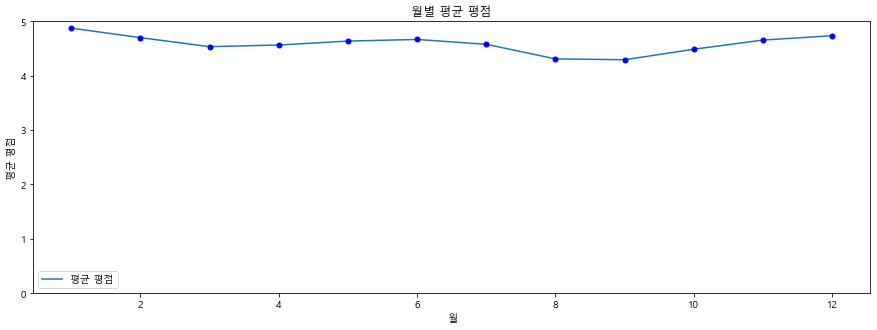

In [73]:
import matplotlib.pyplot as plt

# 그림의 크기 설정
plt.figure(figsize=(15, 5))

# 월별 평균 평점 그래프 그리기
review_df.groupby(review_df['리뷰작성일시'].dt.month).mean()['리뷰평점'].plot()

# 각 월별 평균 평점을 점으로 표시
review_df.groupby(review_df['리뷰작성일시'].dt.month).mean()['리뷰평점'].plot(marker='o', markersize=5, color='blue', linestyle='')

# y축 범위 설정
plt.ylim(0, 5)

# x축 레이블 설정
plt.xlabel('월')

# y축 레이블 설정
plt.ylabel('평균 평점')

# 그래프 제목 설정
plt.title('월별 평균 평점')

# 범례 표시
plt.legend(['평균 평점'])

# 그래프 표시
plt.show()


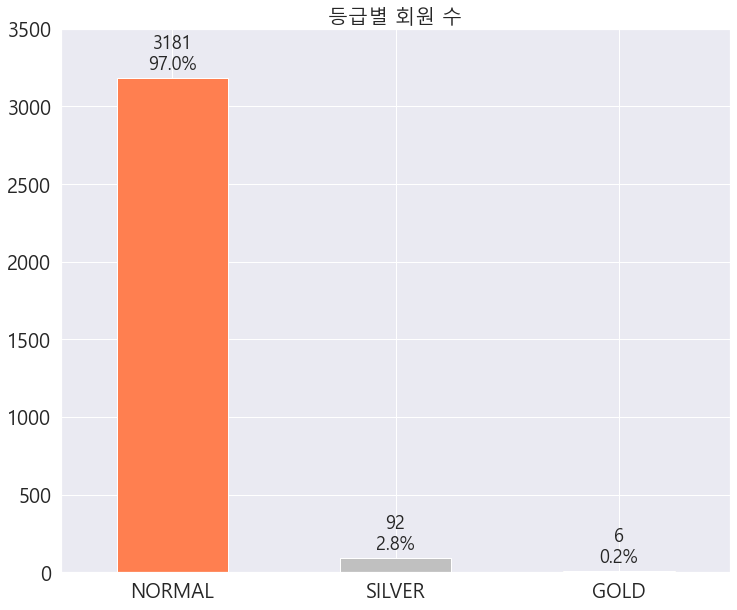

In [257]:
import matplotlib.pyplot as plt

# 등급별 회원 수 계산
grade_counts = member_info['등급'].value_counts()

plt.figure(figsize=(12, 10))

# 바 차트 그리기
bar_plot = grade_counts.plot(kind='bar', color=['coral', 'silver', 'gold'], fontsize=20)

plt.xticks(rotation=0)

# 바 위에 숫자 표시 및 퍼센티지 표시
for p in bar_plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / sum(grade_counts))
    bar_plot.annotate(str(p.get_height()) + '\n' + percentage, (p.get_x() + p.get_width() / 2., p.get_height() + 30), ha='center', va='bottom', fontsize=18)

plt.title('등급별 회원 수', fontsize=20)

# 그래프의 최고점 설정
plt.ylim(0, 3500)

plt.show()


In [75]:
order_df2 = order_df.copy()
order_df2.loc[order_df2['주문자ID'].isna(), '회원여부'] = '비회원'
order_df2['회원여부'] = order_df2['회원여부'].fillna('회원')

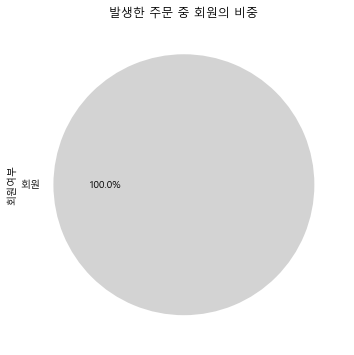

In [76]:
plt.figure(figsize = (8,6))

order_df2['회원여부'].value_counts().plot(kind='pie', autopct='%.1f%%', colors=['lightgrey', 'LemonChiffon'])

plt.title('발생한 주문 중 회원의 비중')

plt.show()

In [77]:
review_may = review_df[review_df['리뷰작성일시'].dt.month == 5]

In [78]:
review_may[review_may['리뷰내용'].str.contains('선물')].iloc[:,6]

1028                                 신란한테 선물했는데 엄청 좋아하네요!
1085    남편 선물로 구매했어요. 연휴가 있어서 늦을지 알았는데 빨리왔네요~\r\n생각지도 ...
1105    남친 사업 성공을 바라며 선물했어요(2023-05-07 10:20:52 에 등록된 ...
1156    선물했는데 신랑이 너무 좋아하네요~저도 하나 구매하려구요^^좋은기운 주세요^^(20...
1164    진짜예쁘네요 재구매했어요울사위사업잘돼라고 사위선물했네요(2023-05-10 11:5...
1173                    남편 사업 시작해서 선물로 줬어요 좋은 기운있었으면 좋겠어요
1179    아빠 선물로 샀어요 패키징도 너무 예쁘고 팔찌도 넘 예쁘네요(2023-05-11 2...
1182    상품을 아들하고 사위에게 선물했는데 둘다 완전좋다고 계속 하고다니네요.\r\n그런데...
1196    신기하게도 오른손에 찰때와 왼손에 찰때가 기분이 달라요..오른손에 차니 뭔가 능동적...
1243    정말 예뻐요~ 선물하면서 뿌듯했어요^^(2023-05-13 20:36:16 에 등록...
1244    정말 예뻐요~ 선물하면서 뿌듯했어요^^(2023-05-13 20:37:45 에 등록...
1262    두개째구매했어요 \r\n선물로 좋은듯합니다(2023-05-14 12:04:55 에 ...
1267                        아내에게 선물한건데 아주좋아합니다. 매우 만족합니다.
1285    너무 마음어 들어서 친구도 하나 선물해주려고 샀음(2023-05-15 12:59:3...
1298    카네스톤 구매후 맘에 들어 리치스톤 구매!!\r\n카네스톤은 친구한테 선물로 줬음ㅎ...
1304    남편 선물 해줘는데 너무 잘해요 디자인 색감이 남자들이 무난하게 해도 될 디자인 인...
1320    선물로 주었는데 마음 듯다고 하네요(2023-05-17 09:56:22 에 등록된 ...
1365    남자친구 선

## 고객등급 분석

In [79]:
order_member_df = pd.merge(order_df, member_info, left_on='주문자ID', right_on='아이디', how='left')

In [80]:
order_member_df['등급'].fillna('Guest', inplace=True)

In [81]:
order_member_df.groupby('등급').size()

등급
GOLD        43
Guest     9372
NORMAL    2287
SILVER     306
dtype: int64

<AxesSubplot:ylabel='상품 카테고리'>

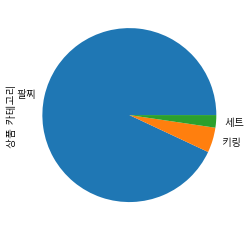

In [82]:
order_member_df[order_member_df['등급'] == 'GOLD']['상품 카테고리'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='상품 카테고리'>

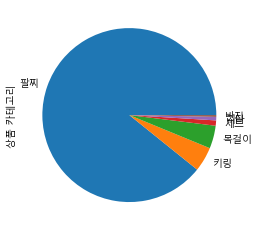

In [83]:
order_member_df[order_member_df['등급'] == 'SILVER']['상품 카테고리'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='상품 카테고리'>

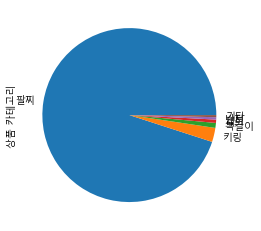

In [84]:
order_member_df[order_member_df['등급'] == 'NORMAL']['상품 카테고리'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='상품 카테고리'>

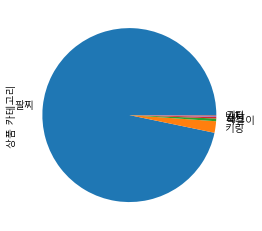

In [85]:
order_member_df[order_member_df['등급'] == 'Guest']['상품 카테고리'].value_counts().plot(kind='pie')

In [86]:
order_member_df['이벤트 명'].value_counts()

이벤트 없음            10493
새해 맞이 이벤트           921
10만원 이상 구매 이벤트      425
가정의 달 이벤트           169
Name: 이벤트 명, dtype: int64

In [87]:
dummies = pd.get_dummies(order_member_df['이벤트 명'], prefix='이벤트')
order_member_df = pd.concat([order_member_df, dummies], axis=1)

In [88]:
order_member_df

,주문일시,주문자ID,주문 시 회원등급,총 주문금액,총 결제금액,주문상품명,수량,판매가,주문자 가입일,주문자 주소,...,총 방문횟수(1년 내),주소1,주소2,평균구매액,최종주문-회원가입,등급,이벤트_10만원 이상 구매 이벤트,이벤트_가정의 달 이벤트,이벤트_새해 맞이 이벤트,이벤트_이벤트 없음
0,2023-01-01 08:23:31,777c68d982dbe0008723a7812ff4853a635232c7bc2bdc...,NaN,38000.0,38000.0,호안닉스 리치스톤,1,35000.0,NaN,경상남도 합천군 합천읍 옥산로 43 2층좌측,...,NaN,NaN,NaN,NaN,NaN,Guest,0,0,0,1
1,2023-01-01 08:23:31,777c68d982dbe0008723a7812ff4853a635232c7bc2bdc...,NaN,38000.0,38000.0,호안닉스 리치스톤,1,35000.0,NaN,경상남도 합천군 합천읍 옥산로 43 2층좌측,...,NaN,NaN,NaN,NaN,NaN,Guest,0,0,0,1
2,2023-01-01 08:38:22,c6e2c0b5b4fde839142393a017067c76f3c3bc733ec06d...,NaN,38000.0,34114.0,호안닉스 리치스톤,1,35000.0,NaN,"경기도 광주시 오포읍 창뜰아랫길 11-5 (오포읍, 프린스타운)101동302",...,NaN,NaN,NaN,NaN,NaN,Guest,0,0,0,1
3,2023-01-01 08:38:22,c6e2c0b5b4fde839142393a017067c76f3c3bc733ec06d...,NaN,38000.0,34114.0,호안닉스 리치스톤,1,35000.0,NaN,"경기도 광주시 오포읍 창뜰아랫길 11-5 (오포읍, 프린스타운)101동302",...,NaN,NaN,NaN,NaN,NaN,Guest,0,0,0,1
4,2023-01-01 09:02:48,8c026bf847ee7a4f4c9417d04fc14a8d54799600eabb5e...,NaN,73000.0,72650.0,호안닉스 리치스톤,1,35000.0,NaN,"충청북도 충주시 형설로 32 (호암동, 세영더-조은아파트)102-303",...,NaN,NaN,NaN,NaN,NaN,Guest,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12003,2023-12-31 22:22:20,dce84573ea2b6bf5a2d3a09fa9b317800be8c5ffdbfd80...,NaN,79000.0,0.0,호안오닉스 카네스톤,1,38000.0,NaN,"충청남도 천안시 서북구 성성9로 14 (성성동, 천안레이크타운2차 푸르지오)212동...",...,NaN,NaN,NaN,NaN,NaN,Guest,0,0,0,1
12004,2023-12-31 22:27:07,2905496423@k,일반회원,46000.0,45570.0,아이아게이트 디오스톤,1,43000.0,2023-07-11,서울 강서구 화곡로54길 43 금호아울림퍼스티어104동2001호,...,4.0,NaN,NaN,46000.0,173.0,NORMAL,0,0,0,1
12005,2023-12-31 22:38:32,e0085cebf0b4c1c3bd0126bf0e8662816185459c9f1e39...,NaN,79000.0,78087.0,호안오닉스 카네스톤,1,38000.0,NaN,"인천광역시 계양구 도두리로 52 (작전동, 도두리마을 동보아파트)508동 2007호",...,NaN,NaN,NaN,NaN,NaN,Guest,0,0,0,1
12006,2023-12-31 22:38:32,e0085cebf0b4c1c3bd0126bf0e8662816185459c9f1e39...,NaN,79000.0,78087.0,호안오닉스 카네스톤,1,38000.0,NaN,"인천광역시 계양구 도두리로 52 (작전동, 도두리마을 동보아파트)508동 2007호",...,NaN,NaN,NaN,NaN,NaN,Guest,0,0,0,1


## 고객 구분을 위한 분석

In [89]:
order_member_df['월'] = order_member_df['주문일시'].dt.month
grade_month = order_member_df.groupby(['등급', '월']).size().to_frame().rename(columns={0:'구매횟수'}).reset_index()
total_purchase = order_member_df.groupby('등급').size()
grade_month['비율'] = grade_month.apply(lambda row: row['구매횟수'] / total_purchase[row['등급']] * 100, axis=1)

grade_month.set_index(['등급', '월'])

구매횟수         비율
등급     월                  
GOLD   1     10  23.255814
       3      4   9.302326
       4      2   4.651163
       5      2   4.651163
       6      7  16.279070
       7      8  18.604651
       8      1   2.325581
       10     2   4.651163
       11     6  13.953488
       12     1   2.325581
Guest  1    227   2.422108
       2    348   3.713188
       3    529   5.644473
       4    995  10.616731
       5   1298  13.849765
       6   1156  12.334614
       7   1028  10.968843
       8    884   9.432352
       9    809   8.632096
       10   533   5.687153
       11   749   7.991891
       12   816   8.706786
NORMAL 1     70   3.060778
       2     94   4.110188
       3    102   4.459991
       4    158   6.908614
       5    245  10.712724
       6    226   9.881941
       7    273  11.937035
       8    236  10.319195
       9    213   9.313511
       10   140   6.121557
       11   243  10.625273
       12   287  12.549191
SILVER 1      6   1.960784
       2      6   1.960784
       3      8   2.614379
       4     22   7.189542
       5     17   5.555556
       6     33  10.784314
       7     37  12.091503
       8     35  11.437908
       9     29   9.477124
       10    19   6.209150
       11    54  17.647059
       12    40  13.071895

In [90]:
pd.options.display.float_format = '{:.2f}'.format

In [91]:
member_guest_df = order_member_df.groupby(['주문자ID', '등급']).sum()
member_guest_df.groupby('등급').mean()

,총 주문금액,총 결제금액,수량,판매가,총 배송비 (전체 품목에 표시),총 실제 환불금액,주문서 쿠폰 할인금액,쿠폰 할인금액(최초),총구매금액,총 실주문건수,총적립금,사용가능 적립금,총 사용 적립금,총 방문횟수(1년 내),평균구매액,이벤트_10만원 이상 구매 이벤트,이벤트_가정의 달 이벤트,이벤트_새해 맞이 이벤트,이벤트_이벤트 없음,월
등급,,,,,,,,,,,,,,,,,,,,
GOLD,1324800.00,1326742.00,9.40,330400.00,24000.00,0.00,12000.00,12000.00,3040600.00,23.60,39172.00,33686.00,5486.00,40.60,1184166.67,0.00,0.00,0.00,8.60,48.80
Guest,76318.59,62615.47,1.42,53397.73,4123.80,29.68,0.00,0.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.02,0.09,1.21,9.43
NORMAL,84240.91,80755.24,1.44,55731.36,4264.33,296.98,3212.57,3212.57,96775.11,1.66,1236.07,1155.06,63.85,3.92,84903.98,0.06,0.01,0.15,1.19,10.48
SILVER,395046.51,386166.74,3.87,143046.51,10500.00,2104.65,6279.07,6279.07,669837.21,6.76,8025.93,6092.67,1703.26,19.43,411846.90,0.30,0.07,0.38,2.80,28.80


In [92]:
order_member_df.columns

Index(['주문일시', '주문자ID', '주문 시 회원등급', '총 주문금액', '총 결제금액', '주문상품명', '수량', '판매가',
       '주문자 가입일', '주문자 주소', '주문자 상세 주소', '주문자우편번호', '총 배송비 (전체 품목에 표시)',
       '총 실제 환불금액', '사용한 쿠폰명', '주문서 쿠폰 할인금액', '쿠폰 할인금액(최초)', '결제수단', '주문번호',
       '이벤트 명', '이벤트 내용', '회원/비회원', '상품 카테고리', '아이디', '회원 가입일', '총구매금액',
       '총 실주문건수', '최종주문일', '총적립금', '사용가능 적립금', '총 사용 적립금', '최종접속일',
       '총 방문횟수(1년 내)', '주소1', '주소2', '평균구매액', '최종주문-회원가입', '등급',
       '이벤트_10만원 이상 구매 이벤트', '이벤트_가정의 달 이벤트', '이벤트_새해 맞이 이벤트', '이벤트_이벤트 없음',
       '월'],
      dtype='object')

In [93]:
for_clust = order_member_df[['주문자ID', '주문번호', '주문상품명','총 주문금액', '수량', '등급']]
for_clust

,주문자ID,주문번호,주문상품명,총 주문금액,수량,등급
0,777c68d982dbe0008723a7812ff4853a635232c7bc2bdc...,20230101-0000221,호안닉스 리치스톤,38000.00,1,Guest
1,777c68d982dbe0008723a7812ff4853a635232c7bc2bdc...,20230101-0000221,호안닉스 리치스톤,38000.00,1,Guest
2,c6e2c0b5b4fde839142393a017067c76f3c3bc733ec06d...,20230101-0000242,호안닉스 리치스톤,38000.00,1,Guest
3,c6e2c0b5b4fde839142393a017067c76f3c3bc733ec06d...,20230101-0000242,호안닉스 리치스톤,38000.00,1,Guest
4,8c026bf847ee7a4f4c9417d04fc14a8d54799600eabb5e...,20230101-0000269,호안닉스 리치스톤,73000.00,1,Guest
...,...,...,...,...,...,...
12003,dce84573ea2b6bf5a2d3a09fa9b317800be8c5ffdbfd80...,20231231-0000959,호안오닉스 카네스톤,79000.00,1,Guest
12004,2905496423@k,20231231-0000964,아이아게이트 디오스톤,46000.00,1,NORMAL
12005,e0085cebf0b4c1c3bd0126bf0e8662816185459c9f1e39...,20231231-0000978,호안오닉스 카네스톤,79000.00,1,Guest
12006,e0085cebf0b4c1c3bd0126bf0e8662816185459c9f1e39...,20231231-0000978,호안오닉스 카네스톤,79000.00,1,Guest


In [94]:
order_f = order_member_df.groupby(['주문자ID', '주문번호']).size().reset_index().groupby('주문자ID').size().reset_index().rename(columns={0:'주문횟수'})

In [95]:
order_m = order_member_df.groupby(['주문자ID', '주문번호']).mean()['총 주문금액'].groupby('주문자ID').sum().reset_index()

In [96]:
from datetime import datetime
order_r = (datetime(2024, 1, 1) - order_df.groupby('주문자ID')['주문일시'].max()).dt.days.reset_index()

In [97]:
member_clust = pd.merge(pd.merge(order_m, order_f, on='주문자ID', how='inner'), order_r, on='주문자ID', how='inner')

In [98]:
member_clust = pd.merge(member_clust, member_info[['아이디', '등급']], left_on='주문자ID', right_on='아이디', how='left').set_index(['주문자ID', '등급']).drop(columns='아이디')

In [99]:
df_mean = member_clust.mean()
df_std = member_clust.std()

scaled_df = (member_clust - df_mean)/df_std #컬럼별로 표준화를 진행
scaled_df

,,총 주문금액,주문횟수,주문일시
주문자ID,등급,,,
00128b47efef48fc501dbdda67d4cbecbdcebc5f1d5e034227d67c52f68110fb,NaN,-0.51,-0.31,1.12
001a99a0963a871b0b3548c3f989f808da02370d78c3c46f8fe726341c82a586,NaN,0.60,-0.31,1.08
0026cbd5f065ec9d431efaa8ff1e3da46a4ed3e65f69e1a0dac4b06da827a61c,NaN,-0.19,-0.31,0.44
0027cdfa89078ff2f41143b00ae2388012e28c0985d873043c1404da731ea9df,NaN,0.60,-0.31,-1.29
002d57a8294881886548960a3a20f68011a015b51cb9b8927d68fab261a87b04,NaN,-0.51,-0.31,-0.61
...,...,...,...,...
vkxehsjcm,NORMAL,-0.60,-0.31,1.82
wawa69,NORMAL,1.81,1.84,-1.69
wlsdkfma2438,NORMAL,0.96,-0.31,1.84


<AxesSubplot:>

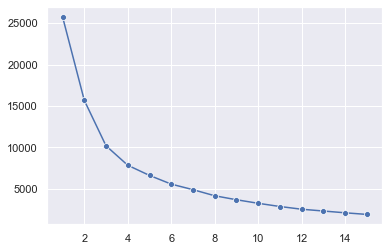

In [100]:
from sklearn.cluster import KMeans

inertias = []

for k in range(1,16):
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(scaled_df)
    inertias.append(model.inertia_)

sns.set(style='darkgrid')
sns.lineplot(x=range(1,16), y=inertias, marker='o')

In [101]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5, random_state=123)
model.fit(scaled_df)

member_clust['label'] = model.predict(scaled_df)

member_clust

,,총 주문금액,주문횟수,주문일시,label
주문자ID,등급,,,,
00128b47efef48fc501dbdda67d4cbecbdcebc5f1d5e034227d67c52f68110fb,NaN,41000.00,1,267,2
001a99a0963a871b0b3548c3f989f808da02370d78c3c46f8fe726341c82a586,NaN,79000.00,1,263,3
0026cbd5f065ec9d431efaa8ff1e3da46a4ed3e65f69e1a0dac4b06da827a61c,NaN,52000.00,1,204,2
0027cdfa89078ff2f41143b00ae2388012e28c0985d873043c1404da731ea9df,NaN,79000.00,1,46,1
002d57a8294881886548960a3a20f68011a015b51cb9b8927d68fab261a87b04,NaN,41000.00,1,108,1
...,...,...,...,...,...
vkxehsjcm,NORMAL,38000.00,1,331,2
wawa69,NORMAL,120000.00,2,9,4
wlsdkfma2438,NORMAL,91000.00,1,333,3


In [102]:
plt.rc('font', family='Malgun Gothic')

In [103]:
label_0 = member_clust[member_clust['label'] == 0]
label_0_data = label_0.mean().to_frame()
label_0_data.loc['label'] = len(label_0)
label_0_data = label_0_data.rename(columns={0:'0번 라벨'}, index={'label' : '고객 수'})

label_1 = member_clust[member_clust['label'] == 1]
label_1_data = label_1.mean().to_frame()
label_1_data.loc['label'] = len(label_1)
label_1_data = label_1_data.rename(columns={0:'1번 라벨'}, index={'label' : '고객 수'})

label_2 = member_clust[member_clust['label'] == 2]
label_2_data = label_2.mean().to_frame()
label_2_data.loc['label'] = len(label_2)
label_2_data = label_2_data.rename(columns={0:'2번 라벨'}, index={'label' : '고객 수'})

label_3 = member_clust[member_clust['label'] == 3]
label_3_data = label_3.mean().to_frame()
label_3_data.loc['label'] = len(label_3)
label_3_data = label_3_data.rename(columns={0:'3번 라벨'}, index={'label' : '고객 수'})

label_4 = member_clust[member_clust['label'] == 4]
label_4_data = label_4.mean().to_frame()
label_4_data.loc['label'] = len(label_4)
label_4_data = label_4_data.rename(columns={0:'4번 라벨'}, index={'label' : '고객 수'})

In [104]:
label_feature = pd.concat([pd.concat([pd.concat([pd.concat([label_0_data, label_1_data], axis=1), label_2_data], axis=1), label_3_data], axis=1), label_4_data], axis=1)
label_feature

,0번 라벨,1번 라벨,2번 라벨,3번 라벨,4번 라벨
총 주문금액,220532.26,46670.67,42994.38,93853.28,101964.00
주문횟수,3.44,1.00,1.00,1.00,2.10
주문일시,113.00,76.69,239.46,182.95,149.52
고객 수,124.00,3082.00,3560.00,961.00,861.00


Text(0.5, 1.0, '라벨 별 평균 주문횟수')

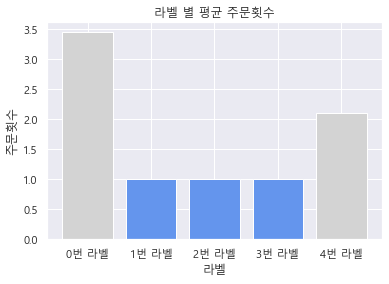

In [105]:
plt.bar(label_feature.columns, label_feature.loc['주문횟수'], color=['lightgrey', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'lightgrey'])
plt.xticks(rotation=0)
plt.xlabel('라벨')
plt.ylabel('주문횟수')
plt.title('라벨 별 평균 주문횟수')

In [106]:
label_0['주문횟수'].value_counts().sort_values(ascending=False).to_frame().rename(columns={'주문횟수' : '충성고객 주문횟수'})

,충성고객 주문횟수
3,57
4,32
2,20
5,7
6,4
7,3
8,1


In [107]:
label_4['주문횟수'].value_counts().sort_values(ascending=False).to_frame().rename(columns={'주문횟수' : '2~3회구매고객 주문횟수'})

,2~3회구매고객 주문횟수
2,774
3,87


In [108]:
label_0[label_0['주문횟수'].isin([3])].mean().to_frame().rename(columns={0:'충성고객 중 주문횟수가 3인 고객'})

,충성고객 중 주문횟수가 3인 고객
총 주문금액,202192.98
주문횟수,3.00
주문일시,111.96
label,0.00


In [109]:
label_4[label_4['주문횟수'].isin([3])].mean().to_frame().rename(columns={0:'2~3회구매고객 중 주문횟수가 3인 고객'})

,2~3회구매고객 중 주문횟수가 3인 고객
총 주문금액,126954.02
주문횟수,3.00
주문일시,144.75
label,4.00


In [110]:
member_guest_df = pd.merge(member_guest_df, member_clust['label'], left_index=True, right_index=True)
order_member_df = pd.merge(order_member_df, member_clust['label'].reset_index().drop(columns='등급'), on='주문자ID', how='left')
order_member_df

,주문일시,주문자ID,주문 시 회원등급,총 주문금액,총 결제금액,주문상품명,수량,판매가,주문자 가입일,주문자 주소,...,주소2,평균구매액,최종주문-회원가입,등급,이벤트_10만원 이상 구매 이벤트,이벤트_가정의 달 이벤트,이벤트_새해 맞이 이벤트,이벤트_이벤트 없음,월,label
0,2023-01-01 08:23:31,777c68d982dbe0008723a7812ff4853a635232c7bc2bdc...,NaN,38000.00,38000.00,호안닉스 리치스톤,1,35000.00,NaN,경상남도 합천군 합천읍 옥산로 43 2층좌측,...,NaN,NaN,NaN,Guest,0,0,0,1,1,2
1,2023-01-01 08:23:31,777c68d982dbe0008723a7812ff4853a635232c7bc2bdc...,NaN,38000.00,38000.00,호안닉스 리치스톤,1,35000.00,NaN,경상남도 합천군 합천읍 옥산로 43 2층좌측,...,NaN,NaN,NaN,Guest,0,0,0,1,1,2
2,2023-01-01 08:38:22,c6e2c0b5b4fde839142393a017067c76f3c3bc733ec06d...,NaN,38000.00,34114.00,호안닉스 리치스톤,1,35000.00,NaN,"경기도 광주시 오포읍 창뜰아랫길 11-5 (오포읍, 프린스타운)101동302",...,NaN,NaN,NaN,Guest,0,0,0,1,1,2
3,2023-01-01 08:38:22,c6e2c0b5b4fde839142393a017067c76f3c3bc733ec06d...,NaN,38000.00,34114.00,호안닉스 리치스톤,1,35000.00,NaN,"경기도 광주시 오포읍 창뜰아랫길 11-5 (오포읍, 프린스타운)101동302",...,NaN,NaN,NaN,Guest,0,0,0,1,1,2
4,2023-01-01 09:02:48,8c026bf847ee7a4f4c9417d04fc14a8d54799600eabb5e...,NaN,73000.00,72650.00,호안닉스 리치스톤,1,35000.00,NaN,"충청북도 충주시 형설로 32 (호암동, 세영더-조은아파트)102-303",...,NaN,NaN,NaN,Guest,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12003,2023-12-31 22:22:20,dce84573ea2b6bf5a2d3a09fa9b317800be8c5ffdbfd80...,NaN,79000.00,0.00,호안오닉스 카네스톤,1,38000.00,NaN,"충청남도 천안시 서북구 성성9로 14 (성성동, 천안레이크타운2차 푸르지오)212동...",...,NaN,NaN,NaN,Guest,0,0,0,1,12,1
12004,2023-12-31 22:27:07,2905496423@k,일반회원,46000.00,45570.00,아이아게이트 디오스톤,1,43000.00,2023-07-11,서울 강서구 화곡로54길 43 금호아울림퍼스티어104동2001호,...,NaN,46000.00,173.00,NORMAL,0,0,0,1,12,4
12005,2023-12-31 22:38:32,e0085cebf0b4c1c3bd0126bf0e8662816185459c9f1e39...,NaN,79000.00,78087.00,호안오닉스 카네스톤,1,38000.00,NaN,"인천광역시 계양구 도두리로 52 (작전동, 도두리마을 동보아파트)508동 2007호",...,NaN,NaN,NaN,Guest,0,0,0,1,12,4
12006,2023-12-31 22:38:32,e0085cebf0b4c1c3bd0126bf0e8662816185459c9f1e39...,NaN,79000.00,78087.00,호안오닉스 카네스톤,1,38000.00,NaN,"인천광역시 계양구 도두리로 52 (작전동, 도두리마을 동보아파트)508동 2007호",...,NaN,NaN,NaN,Guest,0,0,0,1,12,4


In [111]:
order_member_df.groupby('label')['주문일시'].min()

label
0   2023-01-01 19:34:08
1   2023-07-25 10:12:10
2   2023-01-01 08:23:31
3   2023-01-10 17:27:55
4   2023-01-02 05:50:10
Name: 주문일시, dtype: datetime64[ns]

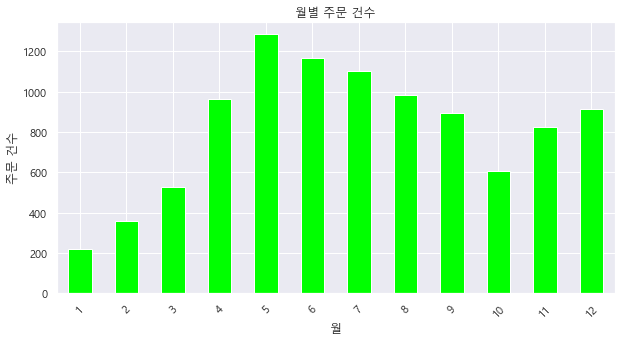

In [112]:
plt.figure(figsize=(10, 5))
order_member_df.groupby(['월','주문번호']).size().groupby('월').size().plot(kind='bar', color='lime')
plt.title('월별 주문 건수')
plt.xlabel('월')
plt.ylabel('주문 건수')
plt.xticks(rotation=45)
plt.show()

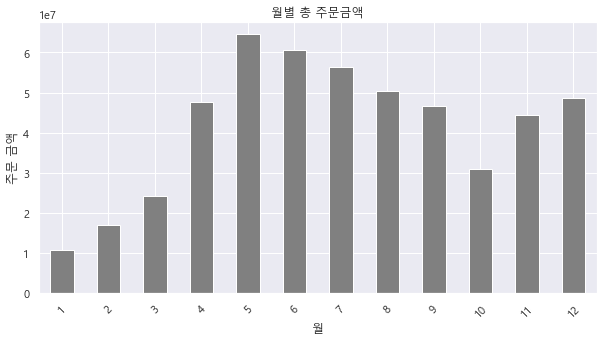

In [113]:
plt.figure(figsize=(10, 5))
order_member_df.groupby(['월','주문번호'])['총 주문금액'].mean().groupby('월').sum().plot(kind='bar', color='grey')
plt.title('월별 총 주문금액')
plt.xlabel('월')
plt.ylabel('주문 금액')
plt.xticks(rotation=45)
plt.show()

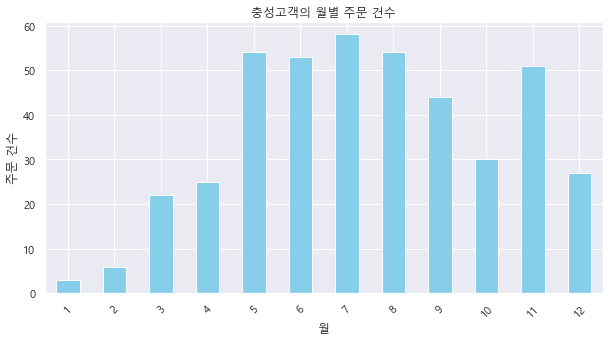

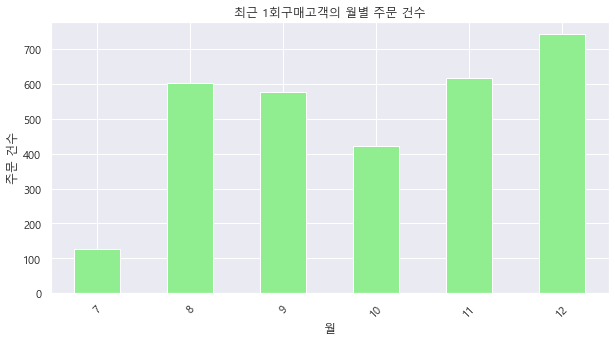

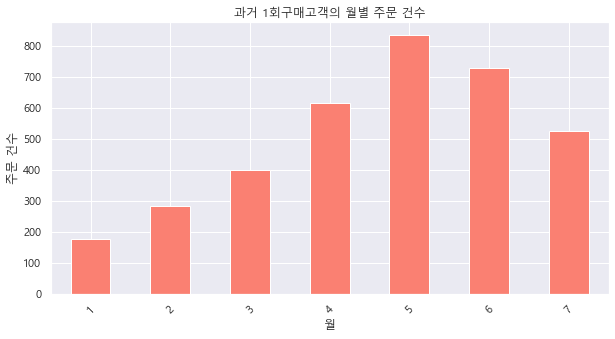

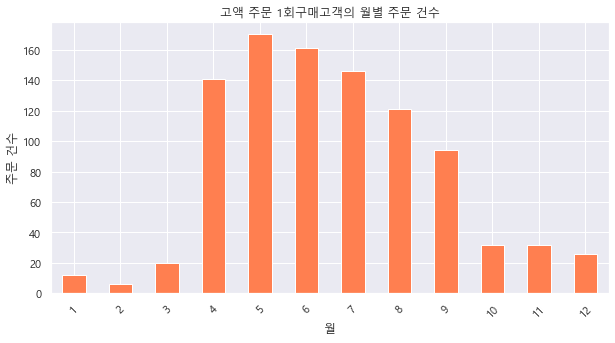

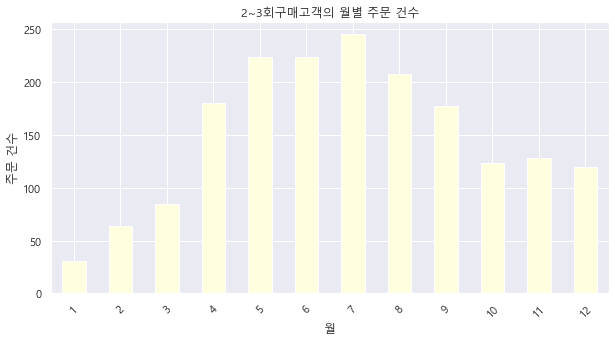

In [114]:
plt.figure(figsize=(10, 5))
order_member_df[order_member_df['label'] == 0].groupby(['월','주문번호']).size().groupby('월').size().plot(kind='bar', color='skyblue')
plt.title('충성고객의 월별 주문 건수')
plt.xlabel('월')
plt.ylabel('주문 건수')
plt.xticks(rotation=45)
plt.show()

# 라벨이 1인 경우의 월별 주문 건수 그래프
plt.figure(figsize=(10, 5))
order_member_df[order_member_df['label'] == 1].groupby(['월','주문번호']).size().groupby('월').size().plot(kind='bar', color='lightgreen')
plt.title('최근 1회구매고객의 월별 주문 건수')
plt.xlabel('월')
plt.ylabel('주문 건수')
plt.xticks(rotation=45)
plt.show()

# 라벨이 2인 경우의 월별 주문 건수 그래프
plt.figure(figsize=(10, 5))
order_member_df[order_member_df['label'] == 2].groupby(['월','주문번호']).size().groupby('월').size().plot(kind='bar', color='salmon')
plt.title('과거 1회구매고객의 월별 주문 건수')
plt.xlabel('월')
plt.ylabel('주문 건수')
plt.xticks(rotation=45)
plt.show()

# 라벨이 3인 경우의 월별 주문 건수 그래프
plt.figure(figsize=(10, 5))
order_member_df[order_member_df['label'] == 3].groupby(['월','주문번호']).size().groupby('월').size().plot(kind='bar', color='coral')
plt.title('고액 주문 1회구매고객의 월별 주문 건수')
plt.xlabel('월')
plt.ylabel('주문 건수')
plt.xticks(rotation=45)
plt.show()

# 라벨이 4인 경우의 월별 주문 건수 그래프
plt.figure(figsize=(10, 5))
order_member_df[order_member_df['label'] == 4].groupby(['월','주문번호']).size().groupby('월').size().plot(kind='bar', color='lightyellow')
plt.title('2~3회구매고객의 월별 주문 건수')
plt.xlabel('월')
plt.ylabel('주문 건수')
plt.xticks(rotation=45)
plt.show()

In [115]:
# label 열의 값을 조건에 따라 새로운 값으로 바꿔주는 함수 정의
def label_to_string(label):
    if label == 0:
        return '충성고객'
    elif label == 1:
        return '최근 1회구매고객'
    elif label == 2:
        return '과거 1회구매고객'
    elif label == 3:
        return '고액 주문 1회구매고객'
    elif label == 4:
        return '2~3회구매고객'
    else:
        return '기타'

# label 열의 값을 새로운 값으로 바꿔줌
member_clust['label'] = member_clust['label'].apply(label_to_string)

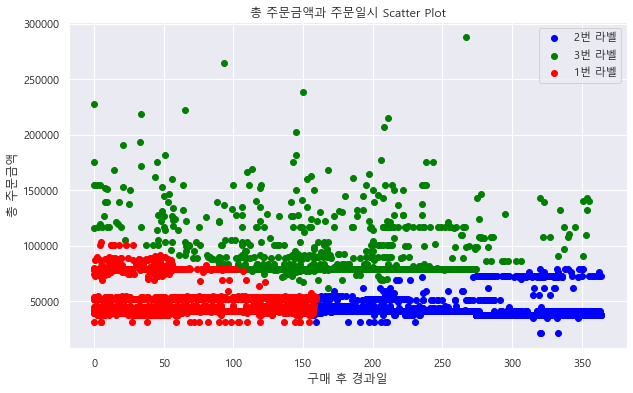

In [116]:
single_order = member_clust[member_clust['주문횟수'] == 1]

plt.figure(figsize=(10, 6))
for label, color in zip(single_order['label'].unique(), ['blue', 'green', 'red', 'purple']):
    data = single_order[single_order['label'] == label]
    plt.scatter(data['주문일시'],data['총 주문금액'],  label=label, color=color)

plt.xlabel('구매 후 경과일')
plt.ylabel('총 주문금액')
plt.legend(['2번 라벨', '3번 라벨', '1번 라벨'])
plt.title('총 주문금액과 주문일시 Scatter Plot')
plt.show()

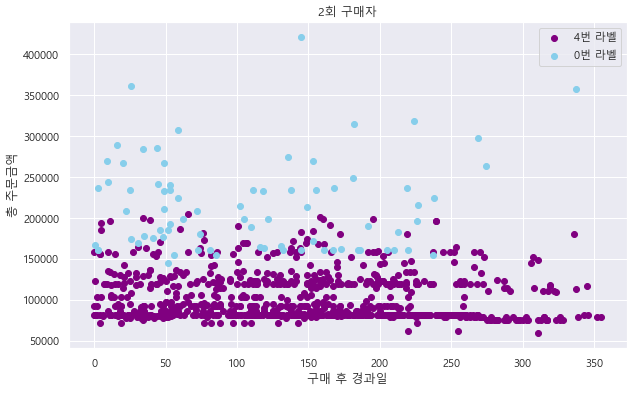

In [117]:
single_order = member_clust[member_clust['주문횟수'].isin([2,3])]

plt.figure(figsize=(10, 6))
for label, color in zip(single_order['label'].unique(), ['purple', 'skyblue']):
    data = single_order[single_order['label'] == label]
    plt.scatter(data['주문일시'],data['총 주문금액'],  label=label, color=color)

plt.xlabel('구매 후 경과일')
plt.ylabel('총 주문금액')
plt.legend(['4번 라벨', '0번 라벨'])
plt.title('2회 구매자')
plt.show()

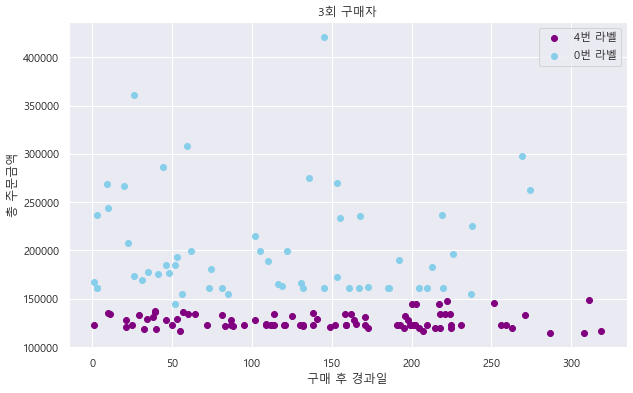

In [118]:
single_order = member_clust[member_clust['주문횟수'] == 3]

plt.figure(figsize=(10, 6))
for label, color in zip(single_order['label'].unique(), ['purple', 'skyblue']):
    data = single_order[single_order['label'] == label]
    plt.scatter(data['주문일시'],data['총 주문금액'],  label=label, color=color)

plt.xlabel('구매 후 경과일')
plt.ylabel('총 주문금액')
plt.legend(['4번 라벨', '0번 라벨'])
plt.title('3회 구매자')
plt.show()

In [119]:
member_clust.reset_index()[['주문자ID', 'label']]

,주문자ID,label
0,00128b47efef48fc501dbdda67d4cbecbdcebc5f1d5e03...,과거 1회구매고객
1,001a99a0963a871b0b3548c3f989f808da02370d78c3c4...,고액 주문 1회구매고객
2,0026cbd5f065ec9d431efaa8ff1e3da46a4ed3e65f69e1...,과거 1회구매고객
3,0027cdfa89078ff2f41143b00ae2388012e28c0985d873...,최근 1회구매고객
4,002d57a8294881886548960a3a20f68011a015b51cb9b8...,최근 1회구매고객
...,...,...
8583,vkxehsjcm,과거 1회구매고객
8584,wawa69,2~3회구매고객
8585,wlsdkfma2438,고액 주문 1회구매고객
8586,xornjs9691,고액 주문 1회구매고객


In [120]:
# member_clust.reset_index()[['주문자ID', 'label']].to_csv('label_df.csv', encoding='utf-8-sig')
label_df = pd.read_csv('label_df.csv', index_col=0)

In [121]:
label_df

,주문자ID,label
0,00128b47efef48fc501dbdda67d4cbecbdcebc5f1d5e03...,2
1,001a99a0963a871b0b3548c3f989f808da02370d78c3c4...,3
2,0026cbd5f065ec9d431efaa8ff1e3da46a4ed3e65f69e1...,2
3,0027cdfa89078ff2f41143b00ae2388012e28c0985d873...,1
4,002d57a8294881886548960a3a20f68011a015b51cb9b8...,1
...,...,...
8583,vkxehsjcm,2
8584,wawa69,4
8585,wlsdkfma2438,3
8586,xornjs9691,3


<AxesSubplot:ylabel='label'>

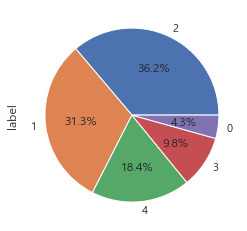

In [122]:
order_member_df.drop_duplicates(subset='주문번호')['label'].value_counts().plot(kind='pie', autopct='%.1f%%')

## cohort

In [123]:
from tqdm import tqdm

In [124]:
order_df.groupby(['주문일시', '주문자ID', '주문번호']).mean()['총 주문금액'].reset_index()

,주문일시,주문자ID,주문번호,총 주문금액
0,2023-01-01 08:23:31,777c68d982dbe0008723a7812ff4853a635232c7bc2bdc...,20230101-0000221,38000.00
1,2023-01-01 08:38:22,c6e2c0b5b4fde839142393a017067c76f3c3bc733ec06d...,20230101-0000242,38000.00
2,2023-01-01 09:02:48,8c026bf847ee7a4f4c9417d04fc14a8d54799600eabb5e...,20230101-0000269,73000.00
3,2023-01-01 09:41:47,e9d559adb70f3861ce189a22ef8266c8f39236c800451d...,20230101-0000284,38000.00
4,2023-01-01 19:34:08,7a5d9d6928b12c0f6b29b9808970635b4f18e229c49aed...,20230101-0000731,73000.00
...,...,...,...,...
9834,2023-12-31 21:24:33,b4f3b833f39da669baa6697d32c6eab5c53449c16bef97...,20231231-0000904,41000.00
9835,2023-12-31 22:16:30,0b70efc4fe63020e03a9a43d6ee19d288f3d2cec958824...,20231231-0000931,79000.00
9836,2023-12-31 22:22:20,dce84573ea2b6bf5a2d3a09fa9b317800be8c5ffdbfd80...,20231231-0000959,79000.00
9837,2023-12-31 22:27:07,2905496423@k,20231231-0000964,46000.00


In [125]:
pd.options.display.max_columns=None

In [262]:
def cohort(df):
    cohort = df.groupby(['주문일시', '주문자ID', '주문번호']).mean()['총 주문금액'].reset_index()
    cohort['OrderCycle'] = cohort['주문일시'].dt.strftime('%Y-%m')
    first_order = cohort.groupby('주문자ID')['주문일시'].min().dt.strftime('%Y-%m')
    cohort = cohort.set_index('주문자ID')
    cohort['FirstOrder'] = first_order
    cohort.reset_index(inplace=True)
    co1 = cohort.groupby(['OrderCycle', 'FirstOrder'])['주문자ID'].nunique().reset_index()
    co1.rename({'주문자ID': 'TotalUsers'}, axis=1, inplace=True)
    co2 = cohort.groupby(['FirstOrder', 'OrderCycle'])['총 주문금액'].sum().reset_index()
    co2.rename({'총 주문금액': 'PurchaseAmnt'}, axis=1, inplace=True)
    co = pd.merge(co1, co2, on=['FirstOrder', 'OrderCycle'])
    
    temp = []

    for i in tqdm(range(co.shape[0])):
        f_first_order = pd.to_datetime(co.FirstOrder[i]).to_period('M')
        f_order_cycle = pd.to_datetime(co.OrderCycle[i]).to_period('M')
    
        month_diff = (f_order_cycle - f_first_order).n
    
        temp.append(month_diff)

    co['CohortPeriod'] = temp
    
    ## 첫 번째. 재방문율 계산을 위한 Pandas Unstack 활용
    co_retention = co.set_index(['FirstOrder', 'CohortPeriod'])
    co_retention = co_retention.TotalUsers.unstack(1)
    retention = co_retention.div(co_retention[0], axis=0)


    # 두 번째. 구매 규모 형태 치환을 위한 Pandas Unstack 활용
    co_purchase = co.set_index(['FirstOrder', 'CohortPeriod'])
    co_purchase = co_purchase.PurchaseAmnt.unstack(1)
    
    print('재방문율')
    display(retention)
    
    print('\n ---------------------------------------------------------------- \n')
    
    print('구매 규모')
    display(co_purchase)
    
    ## 재구매율 시각화 진행
    plt.figure(figsize=(12, 8))
    sns.heatmap(retention, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.title('재구매율', fontsize=16)
    plt.show()

    ## 구매 규모 시각화 
    plt.figure(figsize=(20, 12))
    sns.heatmap(co_purchase, annot=True, fmt=',.0f', cmap='RdYlGn', annot_kws={'fontsize': 14, 'weight': 'bold'})
    plt.title('구매 규모', fontsize=20)
    plt.show()
    

    ## 구매 규모 비율 시각화 
    plt.figure(figsize=(20, 12))
    purchase_ratio = co_purchase.div(co_purchase.iloc[:, 0], axis=0)  # 첫 번째 열을 기준으로 각 열에 대한 비율 계산
    sns.heatmap(purchase_ratio, annot=True, fmt='.2%', cmap='RdYlGn', annot_kws={'fontsize': 14})
    plt.title('구매 규모 비율', fontsize=16)
    plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████| 73/73 [00:00<00:00, 761.42it/s]


재방문율


CohortPeriod,0,1,2,3,4,5,6,7,8,9,10
FirstOrder,,,,,,,,,,,
2023-01,1.00,0.02,0.01,0.01,0.01,0.01,0.01,0.01,NaN,0.00,NaN
2023-02,1.00,0.03,0.00,0.02,0.01,NaN,0.01,0.01,0.01,0.01,0.00
2023-03,1.00,0.04,0.02,0.02,0.02,0.01,0.00,0.01,0.01,NaN,NaN
2023-04,1.00,0.03,0.02,0.02,0.01,0.01,0.01,0.01,0.00,NaN,NaN
2023-05,1.00,0.03,0.02,0.01,0.01,0.00,0.01,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-08,1.00,0.03,0.01,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,1.00,0.04,0.02,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10,1.00,0.05,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 ---------------------------------------------------------------- 

구매 규모


CohortPeriod,0,1,2,3,4,5,6,7,8,9,10
FirstOrder,,,,,,,,,,,
2023-01,10875000.00,328000.00,114000.00,92000.00,134000.00,120000.00,126000.00,81000.00,NaN,54000.00,NaN
2023-02,16665000.00,355000.00,41000.00,309000.00,92000.00,NaN,172000.00,134000.00,123000.00,168000.00,122000.00
2023-03,23769000.00,1437000.00,459000.00,499000.00,727000.00,583000.00,163000.00,128000.00,142000.00,NaN,NaN
2023-04,45978000.00,1392000.00,1103000.00,808000.00,322000.00,248000.00,223000.00,400000.00,256000.00,NaN,NaN
2023-05,62164000.00,2252000.00,1334000.00,497000.00,705000.00,87000.00,367000.00,253000.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-08,45815000.00,1765000.00,273000.00,350000.00,453000.00,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,42379000.00,1582000.00,897000.00,443000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10,27770000.00,1593000.00,282000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


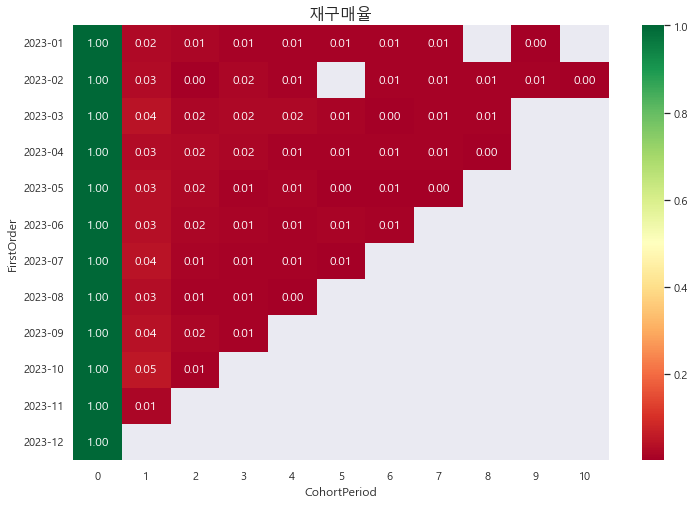

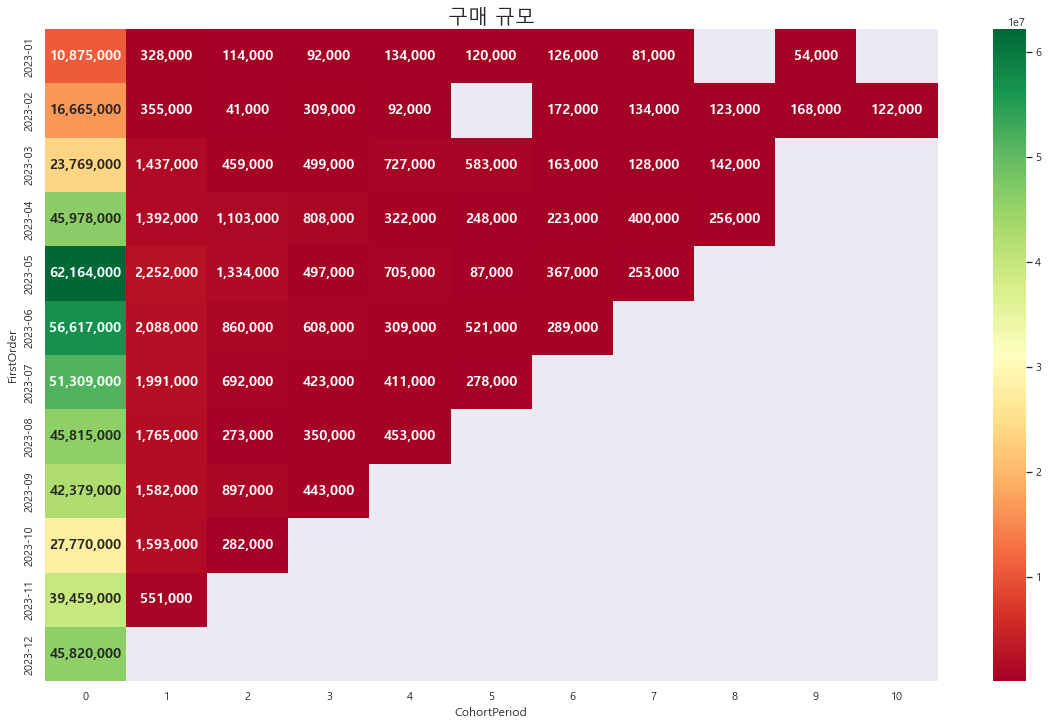

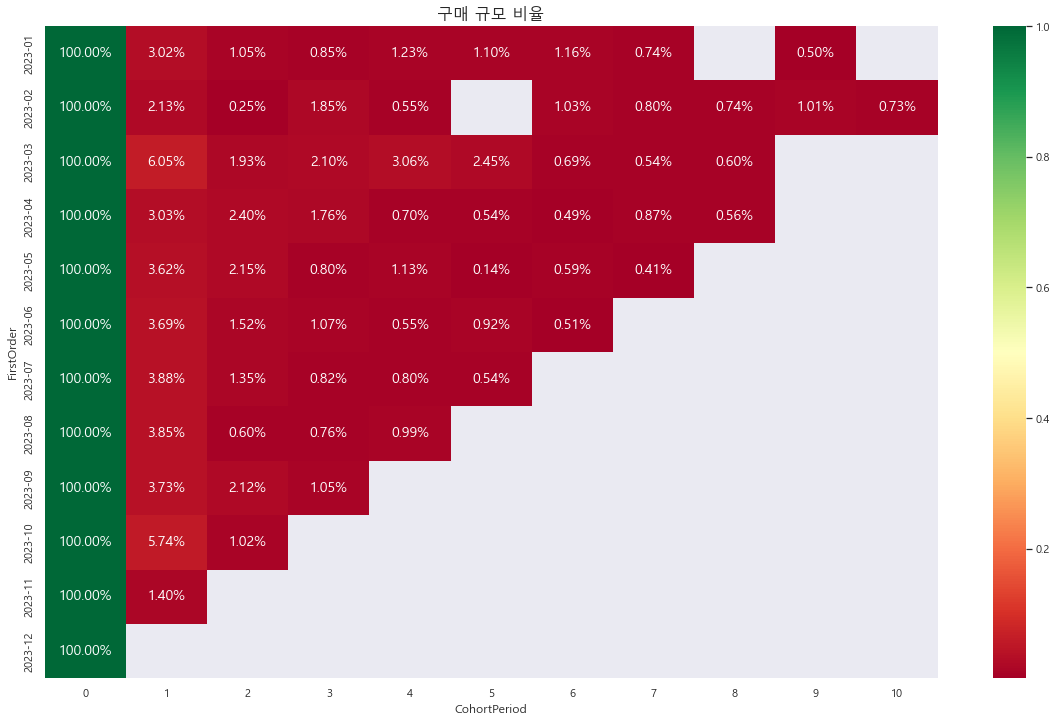

In [263]:
cohort(order_df)

In [128]:
order_label_df = pd.merge(order_df, label_df, on='주문자ID', how='left')

100%|████████████████████████████████████████████████████████████████████████████████| 58/58 [00:00<00:00, 1636.97it/s]

재방문율


CohortPeriod,0,1,2,3,4,5,6,7,8,9,10
FirstOrder,,,,,,,,,,,
2023-01,1.00,NaN,NaN,NaN,NaN,0.50,0.50,NaN,NaN,NaN,NaN
2023-02,1.00,NaN,0.20,0.40,NaN,NaN,0.20,0.40,0.20,0.20,0.20
2023-03,1.00,0.47,0.33,0.20,0.20,0.27,0.07,0.20,0.07,NaN,NaN
2023-04,1.00,0.33,0.50,0.50,0.08,0.17,NaN,NaN,0.25,NaN,NaN
2023-05,1.00,0.55,0.35,0.10,0.15,NaN,0.10,NaN,NaN,NaN,NaN
2023-06,1.00,0.53,0.40,0.13,0.07,0.33,NaN,NaN,NaN,NaN,NaN
2023-07,1.00,0.20,0.40,0.30,0.20,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,1.00,0.36,0.14,0.14,0.14,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,1.00,0.45,0.55,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 ---------------------------------------------------------------- 

구매 규모


CohortPeriod,0,1,2,3,4,5,6,7,8,9,10
FirstOrder,,,,,,,,,,,
2023-01,431000.00,NaN,NaN,NaN,NaN,79000.00,84000.00,NaN,NaN,NaN,NaN
2023-02,370000.00,NaN,41000.00,164000.00,NaN,NaN,41000.00,93000.00,41000.00,95000.00,122000.00
2023-03,1132000.00,784000.00,284000.00,161000.00,319000.00,437000.00,84000.00,128000.00,52000.00,NaN,NaN
2023-04,880000.00,326000.00,450000.00,386000.00,79000.00,125000.00,NaN,NaN,256000.00,NaN,NaN
2023-05,2639000.00,836000.00,534000.00,96000.00,213000.00,NaN,179000.00,NaN,NaN,NaN,NaN
2023-06,1602000.00,843000.00,352000.00,95000.00,52000.00,286000.00,NaN,NaN,NaN,NaN,NaN
2023-07,1399000.00,200000.00,316000.00,149000.00,191000.00,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,1939000.00,773000.00,80000.00,125000.00,349000.00,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,1076000.00,370000.00,601000.00,162000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


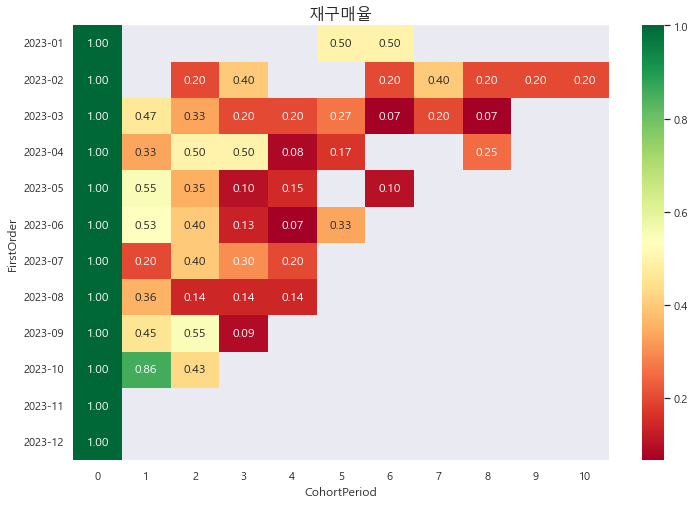

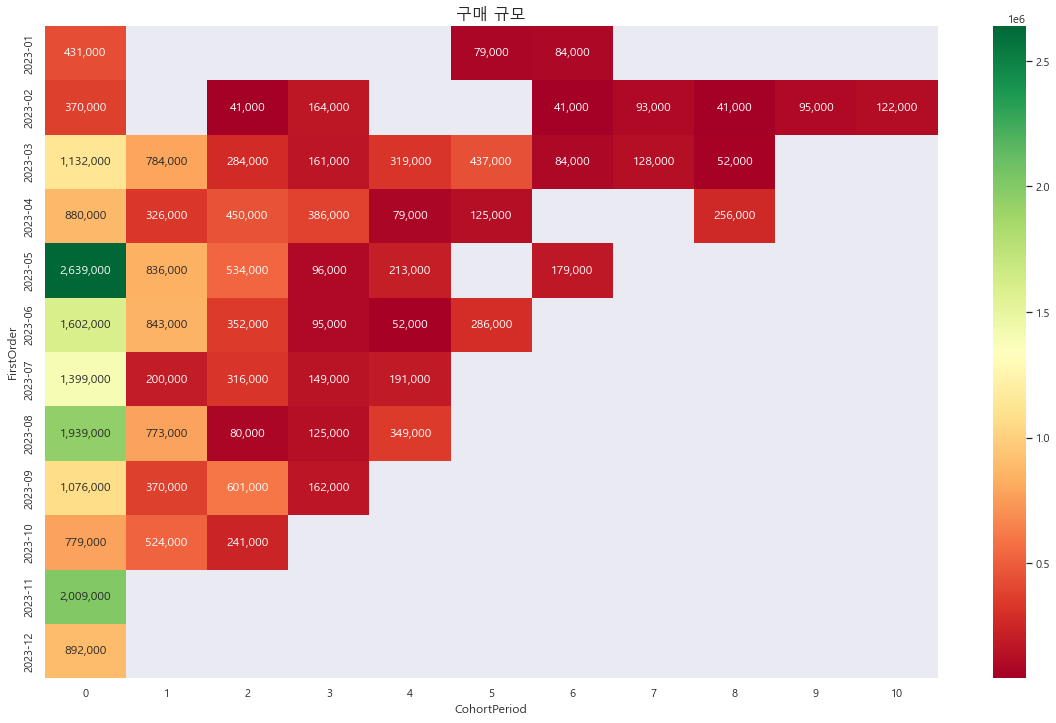

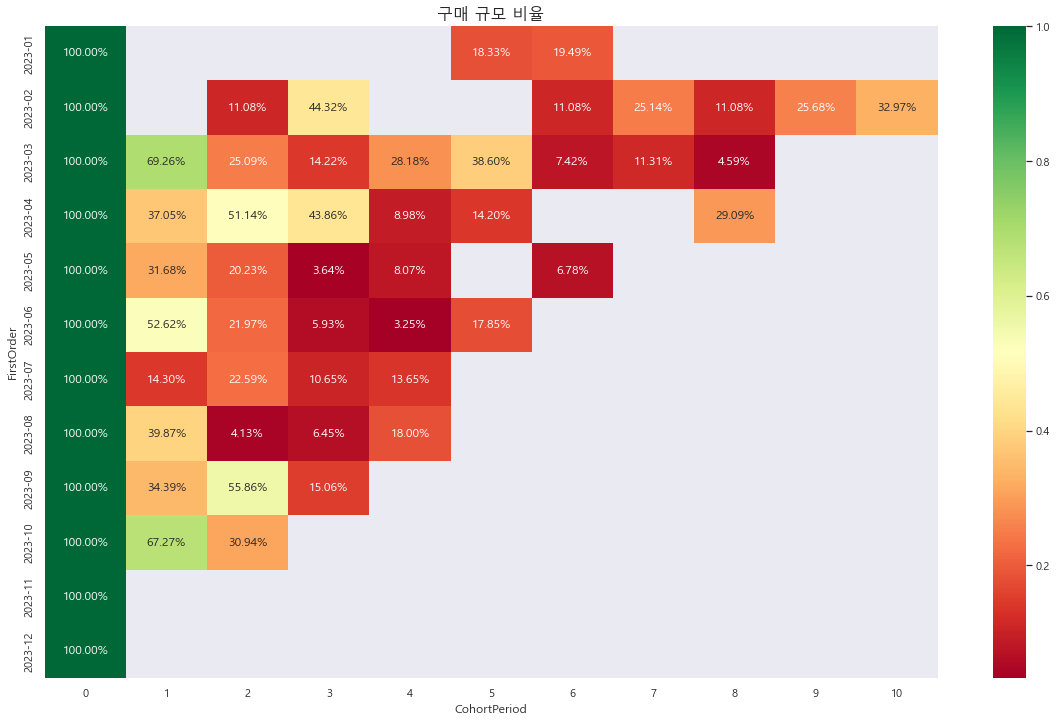

In [129]:
cohort(order_label_df[order_label_df['label'] == 0])

100%|████████████████████████████████████████████████████████████████████████████████| 69/69 [00:00<00:00, 1622.55it/s]

재방문율


CohortPeriod,0,1,2,3,4,5,6,7,8,9
FirstOrder,,,,,,,,,,
2023-01,1.00,0.22,0.13,0.09,0.09,0.04,0.04,0.09,NaN,0.04
2023-02,1.00,0.24,NaN,0.08,0.05,NaN,0.05,0.03,0.05,0.03
2023-03,1.00,0.27,0.06,0.12,0.14,0.04,0.02,NaN,0.04,NaN
2023-04,1.00,0.20,0.13,0.08,0.05,0.03,0.05,0.06,NaN,NaN
2023-05,1.00,0.22,0.12,0.06,0.09,0.02,0.03,0.04,NaN,NaN
2023-06,1.00,0.24,0.09,0.08,0.05,0.05,0.05,NaN,NaN,NaN
2023-07,1.00,0.31,0.07,0.04,0.04,0.04,NaN,NaN,NaN,NaN
2023-08,1.00,0.25,0.05,0.06,0.02,NaN,NaN,NaN,NaN,NaN
2023-09,1.00,0.31,0.09,0.08,NaN,NaN,NaN,NaN,NaN,NaN



 ---------------------------------------------------------------- 

구매 규모


CohortPeriod,0,1,2,3,4,5,6,7,8,9
FirstOrder,,,,,,,,,,
2023-01,1449000.00,328000.00,114000.00,92000.00,134000.00,41000.00,42000.00,81000.00,NaN,54000.00
2023-02,2602000.00,355000.00,NaN,145000.00,92000.00,NaN,131000.00,41000.00,82000.00,73000.00
2023-03,3322000.00,653000.00,175000.00,338000.00,408000.00,146000.00,79000.00,NaN,90000.00,NaN
2023-04,7708000.00,1066000.00,653000.00,422000.00,243000.00,123000.00,223000.00,400000.00,NaN,NaN
2023-05,9180000.00,1416000.00,800000.00,401000.00,492000.00,87000.00,188000.00,253000.00,NaN,NaN
2023-06,8081000.00,1245000.00,508000.00,513000.00,257000.00,235000.00,289000.00,NaN,NaN,NaN
2023-07,9115000.00,1791000.00,376000.00,274000.00,220000.00,278000.00,NaN,NaN,NaN,NaN
2023-08,7031000.00,992000.00,193000.00,225000.00,104000.00,NaN,NaN,NaN,NaN,NaN
2023-09,6063000.00,1212000.00,296000.00,281000.00,NaN,NaN,NaN,NaN,NaN,NaN


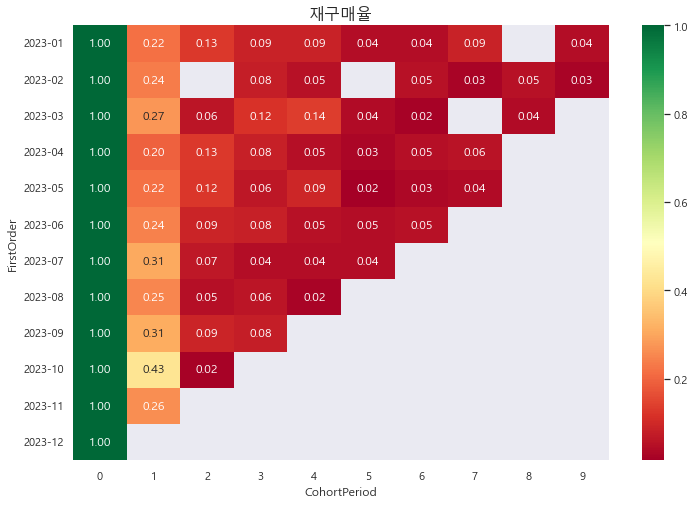

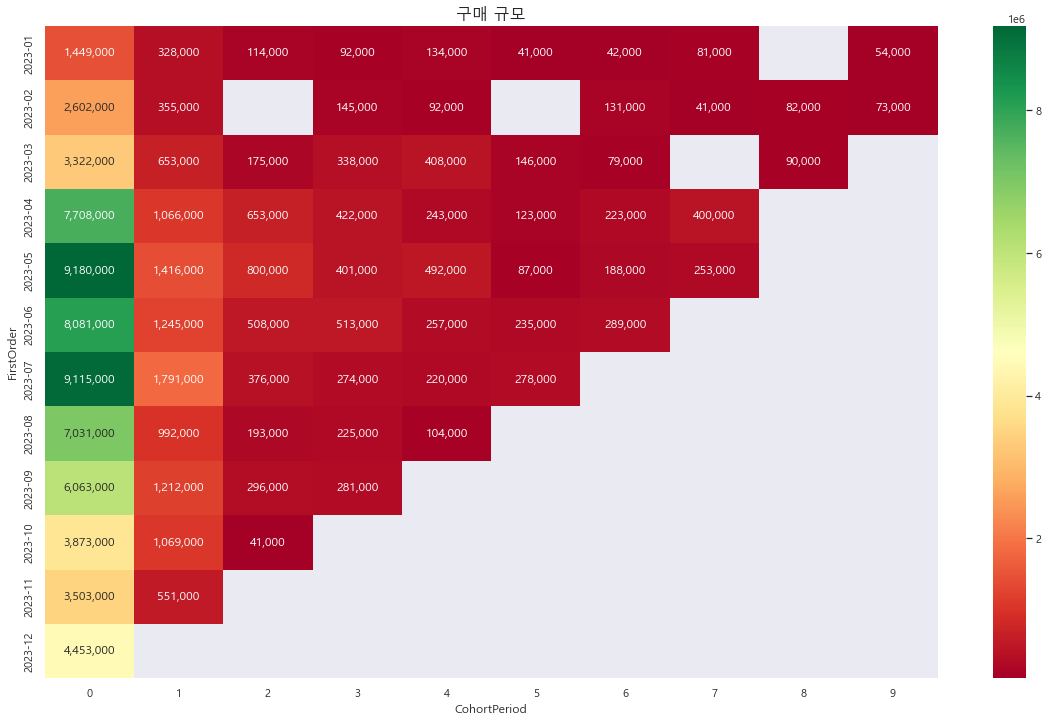

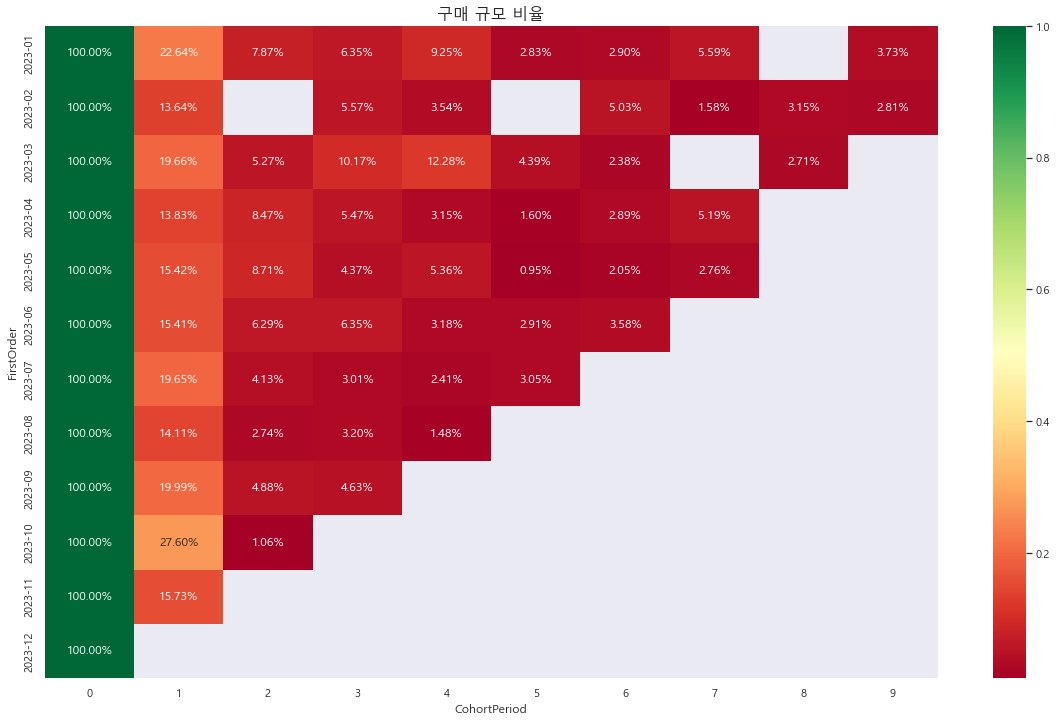

In [130]:
cohort(order_label_df[order_label_df['label'] == 4])

In [131]:
order_label_df.columns

Index(['주문일시', '주문자ID', '주문 시 회원등급', '총 주문금액', '총 결제금액', '주문상품명', '수량', '판매가',
       '주문자 가입일', '주문자 주소', '주문자 상세 주소', '주문자우편번호', '총 배송비 (전체 품목에 표시)',
       '총 실제 환불금액', '사용한 쿠폰명', '주문서 쿠폰 할인금액', '쿠폰 할인금액(최초)', '결제수단', '주문번호',
       '이벤트 명', '이벤트 내용', '회원/비회원', '상품 카테고리', 'label'],
      dtype='object')

In [132]:
order_label_df[(order_label_df['이벤트 명'] == '10만원 이상 구매 이벤트')]

,주문일시,주문자ID,주문 시 회원등급,총 주문금액,총 결제금액,주문상품명,수량,판매가,주문자 가입일,주문자 주소,주문자 상세 주소,주문자우편번호,총 배송비 (전체 품목에 표시),총 실제 환불금액,사용한 쿠폰명,주문서 쿠폰 할인금액,쿠폰 할인금액(최초),결제수단,주문번호,이벤트 명,이벤트 내용,회원/비회원,상품 카테고리,label
9812,2023-11-01 01:32:09,b00a98af41f60ba6405a47ba095229c0f4363e56821f78...,NaN,108000.00,107500.00,호안오닉스 엔고르 키링,3,35000.00,NaN,"서울특별시 동대문구 한천로2길 100 (장안동, 신의 S컬렉션)607호",607호,02633,3000.00,0.00,NaN,NaN,0.00,신용카드,20231101-0000059,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),비회원,키링,4
9813,2023-11-01 02:13:10,3c3f713612d320b377e0dd365e76c6f1f004f58627eeaf...,NaN,52000.00,52000.00,레브스톤 포르테스톤 세트 4mm,1,49000.00,NaN,경기 안양시 만안구 덕천로 57 청해유통2층,청해유통2층,14087,3000.00,0.00,NaN,NaN,0.00,신용카드,20231101-0000081,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),비회원,팔찌,1
9814,2023-11-01 06:56:18,a4b30b3f4ff0a420c5854ebe281c6edba9318dc6e20de6...,NaN,41000.00,0.00,호안오닉스 카네스톤,1,38000.00,NaN,"경상남도 창원시 의창구 하남천서길9번길 20-10 (도계동, 우성빌라)403호",403호,51163,3000.00,0.00,NaN,NaN,0.00,선불금,20231101-0000148,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),비회원,팔찌,1
9815,2023-11-01 08:04:13,99e0abf943f2e663c68da6092f79c2be512d75f367a490...,NaN,41000.00,0.00,자마노 레브스톤 4mm,1,38000.00,NaN,경상북도 구미시 신시로20길 5-8 (송정동)박성주헤어샵,박성주헤어샵,39284,3000.00,0.00,NaN,NaN,0.00,선불금,20231101-0000173,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),비회원,팔찌,1
9816,2023-11-01 08:59:10,b63679119c2f6f91775db5820d25908c2fe3a253f404a8...,NaN,46000.00,46000.00,아이아게이트 디오스톤,1,43000.00,NaN,"경기도 평택시 평택로163번길 27-1 (신대동, 상아주택)상아주택C동 403호",상아주택C동 403호,17828,3000.00,0.00,NaN,NaN,0.00,휴대폰,20231101-0000227,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),비회원,팔찌,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,2023-11-11 22:22:43,feddfe29416bca3f4148688c91dd22ee323fe88f0fa958...,NaN,79000.00,79000.00,호안오닉스 카네스톤,2,38000.00,NaN,"대구광역시 달성군 다사읍 서재로28길 39 (다사읍, 서재우방타운)103동 1109호",103동 1109호,42927,3000.00,0.00,NaN,NaN,0.00,신용카드,20231111-0001003,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),비회원,팔찌,1
10233,2023-11-11 22:38:02,445625a6b57d53a9c3e28745a502beada40ba4b0e98739...,NaN,38000.00,38000.00,로즈 크리스탈 아무르 키링,1,35000.00,NaN,전남 목포시 양을로 1-4 (죽교동)주택1층,주택1층,58717,3000.00,0.00,NaN,NaN,0.00,선불금,20231111-0001023,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),비회원,키링,4
10309,2023-11-08 23:43:41,42f89c6c843ff9b56676bf4e6b5f4633eb9a17fbed97b0...,NaN,82000.00,75000.00,흑요석 블랙가드스톤,1,36000.00,NaN,"대구광역시 남구 두류공원로17길 33 (대명동, 대구가톨릭의과대학병원)학생생활관 관리실",학생생활관 관리실,42472,3000.00,0.00,NaN,NaN,0.00,신용카드,20231108-0001300,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),비회원,팔찌,1
10686,2023-11-11 21:30:18,3158396466@k,일반회원,75000.00,72000.00,흑요석 블랙가드스톤,1,36000.00,2023-11-11,경기 고양시 덕양구 성신로 99 햇빛마을19단지아파트1904동 1001호,1904동 1001호,10483,3000.00,0.00,회원가입 쿠폰,3000.00,3000.00,"쿠폰,신용카드",20231111-0000947,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),회원,팔찌,1


In [133]:
event_10man_order_number = order_label_df[(order_label_df['이벤트 명'] == '10만원 이상 구매 이벤트') & (order_label_df['총 주문금액'] >= 100000)]['주문번호'].unique()

In [134]:
event_10man_order = order_label_df[order_label_df['주문번호'].isin(event_10man_order_number)]

In [135]:
len(event_10man_order.drop_duplicates(subset=['주문번호']))

28

In [136]:
event_10man_order.drop_duplicates(subset=['주문번호']).sort_values('주문번호')['label'].value_counts()

3    16
0     9
4     3
Name: label, dtype: int64

In [137]:
event_10man_order.drop_duplicates(subset=['주문번호']).sort_values('주문번호')['회원/비회원'].value_counts()

비회원    14
회원     14
Name: 회원/비회원, dtype: int64

In [138]:
event_10man_order.drop_duplicates(subset=['주문번호']).sort_values('주문번호')

,주문일시,주문자ID,주문 시 회원등급,총 주문금액,총 결제금액,주문상품명,수량,판매가,주문자 가입일,주문자 주소,주문자 상세 주소,주문자우편번호,총 배송비 (전체 품목에 표시),총 실제 환불금액,사용한 쿠폰명,주문서 쿠폰 할인금액,쿠폰 할인금액(최초),결제수단,주문번호,이벤트 명,이벤트 내용,회원/비회원,상품 카테고리,label
9812,2023-11-01 01:32:09,b00a98af41f60ba6405a47ba095229c0f4363e56821f78...,NaN,108000.00,107500.00,호안오닉스 엔고르 키링,3,35000.00,NaN,"서울특별시 동대문구 한천로2길 100 (장안동, 신의 S컬렉션)607호",607호,02633,3000.00,0.00,NaN,NaN,0.00,신용카드,20231101-0000059,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),비회원,키링,4
9820,2023-11-01 12:08:28,3033801894@k,일반회원,114000.00,114000.00,호안오닉스 엔고르 키링,1,35000.00,2023-09-23,경기 여주시 강변유원지길 22-35 영진리버빌아파트106동1201호,106동1201호,12634,3000.00,0.00,NaN,NaN,0.00,신용카드,20231101-0000341,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),회원,키링,3
9839,2023-11-02 11:37:55,3144316402@k,일반회원,113000.00,110000.00,오닉스 마제스톤,1,36000.00,2023-11-02,전남 여수시 소호로 658 부영아파트101동 203호,101동 203호,59674,3000.00,0.00,회원가입 쿠폰,3000.00,3000.00,"쿠폰,신용카드",20231102-0000356,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),회원,팔찌,4
9845,2023-11-02 13:13:14,3019260460@k,일반회원,103000.00,100000.00,레브 윈스톤 세트 4mm,1,51000.00,2023-09-14,인천 서구 경명대로683번길 1 미도빌라3동101호,3동101호,22707,3000.00,0.00,회원가입 쿠폰,3000.00,3000.00,"쿠폰,신용카드",20231102-0000541,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),회원,팔찌,0
9847,2023-11-02 13:19:45,3019260460@k,일반회원,122000.00,122000.00,아이아게이트 디오스톤,1,43000.00,2023-09-14,인천 서구 경명대로683번길 1 미도빌라3동101호,3동101호,22707,3000.00,0.00,NaN,NaN,0.00,신용카드,20231102-0000572,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),회원,팔찌,0
9853,2023-11-02 14:29:55,ac0dd14afbc892adcc1131f8af39c673ee37e2705d7b92...,NaN,128000.00,126204.00,호안오닉스 스테디스톤,2,38000.00,NaN,"전라남도 여수시 소호로 649 (안산동, 부영2차아파트)205동208호",205동208호,59662,3000.00,0.00,NaN,NaN,0.00,신용카드,20231102-0000639,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),비회원,팔찌,0
9887,2023-11-03 15:40:03,3145671590@k,일반회원,124000.00,121000.00,흑요석 블랙가드스톤,1,36000.00,2023-11-03,대구 북구 칠곡중앙대로136길 29 대구체육고등학교택배함,택배함,41404,3000.00,0.00,회원가입 쿠폰,3000.00,3000.00,"쿠폰,신용카드",20231103-0000561,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),회원,팔찌,3
9925,2023-11-04 01:05:39,3146944025@k,일반회원,134000.00,131000.00,호안석 골드 플렌티스톤,1,42000.00,2023-11-04,경남 함안군 가야읍 도항2길 65 동신아파트101동 503호,101동 503호,52037,3000.00,0.00,회원가입 쿠폰,3000.00,3000.00,"쿠폰,신용카드",20231104-0000081,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),회원,팔찌,3
9928,2023-11-04 01:26:31,2739bada02bd62cb3464714b8af6ce104afce425fe1df0...,NaN,123000.00,123000.00,흑요석 블랙가드스톤,1,36000.00,NaN,강원도 양양군 손양면 동해대로 2036-16 (손양면)1층,1층,25042,3000.00,0.00,NaN,NaN,0.00,신용카드,20231104-0000114,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),비회원,팔찌,3
9946,2023-11-04 20:19:15,93e66417ca9e987b9e9441370a1a6158e74ffbe6af2a67...,NaN,118000.00,118000.00,골드오닉스 다임스톤,1,42000.00,NaN,"충청북도 청주시 상당구 용정로 35 (용정동, 용정 한라비발디 2단지)205동 1202호",205동 1202호,28748,3000.00,0.00,NaN,NaN,0.00,신용카드,20231104-0000916,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),비회원,팔찌,3


In [139]:
not_event_10man_order_number = order_label_df[(order_label_df['이벤트 명'] == '10만원 이상 구매 이벤트') & (order_label_df['총 주문금액'] < 100000)]['주문번호'].unique()

In [140]:
not_event_10man_order = order_label_df[order_label_df['주문번호'].isin(not_event_10man_order_number)]

In [141]:
len(not_event_10man_order.drop_duplicates(subset=['주문번호']))

306

In [142]:
not_event_10man_order.drop_duplicates(subset=['주문번호']).sort_values('주문번호')['label'].value_counts()

1    242
4     48
0     15
3      1
Name: label, dtype: int64

In [143]:
len(order_label_df[order_label_df['주문일시'].dt.month == 11].drop_duplicates(subset=['주문번호']))

826

In [144]:
order_label_df[order_label_df['주문일시'].dt.month == 11].drop_duplicates(subset=['주문번호'])['label'].value_counts()

1    615
4    128
0     51
3     32
Name: label, dtype: int64

In [145]:
order_label_df[order_label_df['주문일시'].dt.month == 11].drop_duplicates(subset=['주문번호'])

,주문일시,주문자ID,주문 시 회원등급,총 주문금액,총 결제금액,주문상품명,수량,판매가,주문자 가입일,주문자 주소,주문자 상세 주소,주문자우편번호,총 배송비 (전체 품목에 표시),총 실제 환불금액,사용한 쿠폰명,주문서 쿠폰 할인금액,쿠폰 할인금액(최초),결제수단,주문번호,이벤트 명,이벤트 내용,회원/비회원,상품 카테고리,label
9812,2023-11-01 01:32:09,b00a98af41f60ba6405a47ba095229c0f4363e56821f78...,NaN,108000.00,107500.00,호안오닉스 엔고르 키링,3,35000.00,NaN,"서울특별시 동대문구 한천로2길 100 (장안동, 신의 S컬렉션)607호",607호,02633,3000.00,0.00,NaN,NaN,0.00,신용카드,20231101-0000059,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),비회원,키링,4
9813,2023-11-01 02:13:10,3c3f713612d320b377e0dd365e76c6f1f004f58627eeaf...,NaN,52000.00,52000.00,레브스톤 포르테스톤 세트 4mm,1,49000.00,NaN,경기 안양시 만안구 덕천로 57 청해유통2층,청해유통2층,14087,3000.00,0.00,NaN,NaN,0.00,신용카드,20231101-0000081,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),비회원,팔찌,1
9814,2023-11-01 06:56:18,a4b30b3f4ff0a420c5854ebe281c6edba9318dc6e20de6...,NaN,41000.00,0.00,호안오닉스 카네스톤,1,38000.00,NaN,"경상남도 창원시 의창구 하남천서길9번길 20-10 (도계동, 우성빌라)403호",403호,51163,3000.00,0.00,NaN,NaN,0.00,선불금,20231101-0000148,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),비회원,팔찌,1
9815,2023-11-01 08:04:13,99e0abf943f2e663c68da6092f79c2be512d75f367a490...,NaN,41000.00,0.00,자마노 레브스톤 4mm,1,38000.00,NaN,경상북도 구미시 신시로20길 5-8 (송정동)박성주헤어샵,박성주헤어샵,39284,3000.00,0.00,NaN,NaN,0.00,선불금,20231101-0000173,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),비회원,팔찌,1
9816,2023-11-01 08:59:10,b63679119c2f6f91775db5820d25908c2fe3a253f404a8...,NaN,46000.00,46000.00,아이아게이트 디오스톤,1,43000.00,NaN,"경기도 평택시 평택로163번길 27-1 (신대동, 상아주택)상아주택C동 403호",상아주택C동 403호,17828,3000.00,0.00,NaN,NaN,0.00,휴대폰,20231101-0000227,10만원 이상 구매 이벤트,호안 오닉스 엔고르 키링 증정 (10만원 이상 구매),비회원,팔찌,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10858,2023-11-30 14:54:17,59b65f3f7d6a0911b822df8e2c3e884befd63ff2c071fb...,NaN,41000.00,41000.00,호안오닉스 카네스톤,1,38000.00,NaN,"충청북도 충주시 호암수청1로 29 (호암동, LH 힐스테이트 호암)102동 1902호",102동 1902호,27502,3000.00,0.00,NaN,NaN,0.00,계좌이체,20231130-0000325,이벤트 없음,NaN,비회원,팔찌,1
10859,2023-11-30 18:02:17,3203387883@k,일반회원,45000.00,42000.00,터키석 수에르스톤 목걸이,1,42000.00,2023-11-30,경기 안양시 동안구 동안로 75 목련신동아아파트909동201호,909동201호,14074,3000.00,0.00,회원가입 쿠폰,3000.00,3000.00,"쿠폰,신용카드",20231130-0000422,이벤트 없음,NaN,회원,목걸이,1
10860,2023-11-30 20:04:47,55999055c3e18e3170ff6890bc509084763213e379618a...,NaN,39000.00,39000.00,오닉스 디펜스톤,1,36000.00,NaN,경상남도 양산시 동면 금오2길 50 (동면)202호,202호,50639,3000.00,0.00,NaN,NaN,0.00,휴대폰,20231130-0000507,이벤트 없음,NaN,비회원,팔찌,1
10861,2023-11-30 21:57:30,01732634f6cafbeb0aea37fbe18c5fc9bd6a09e62fe389...,NaN,52000.00,52000.00,블랙가드 마제스톤 세트,1,49000.00,NaN,부산광역시 강서구 대저들길 431 (대저1동)-,-,46703,3000.00,0.00,NaN,NaN,0.00,신용카드,20231130-0000542,이벤트 없음,NaN,비회원,팔찌,1


In [146]:
order_label_df[order_label_df['주문일시'].dt.month == 3].drop_duplicates(subset=['주문번호'])['label'].value_counts()

2    398
4     85
0     22
3     20
Name: label, dtype: int64

In [147]:
order_label_df2 = order_label_df.drop_duplicates(subset=['주문번호'])

In [148]:
min_order = order_label_df2.groupby('주문자ID')['주문일시'].min().reset_index()

In [149]:
march = pd.merge(min_order[min_order['주문일시'].dt.month == 3], order_label_df2, on=['주문자ID', '주문일시'], how='left')

In [150]:
march_customer = march[march['label'].isin([0,4])]['주문자ID'].unique()

In [151]:
pd.options.display.max_rows=10

In [152]:
order_label_df2[order_label_df2['주문자ID'].isin(march_customer)].sort_values('주문자ID').set_index('주문자ID')

,주문일시,주문 시 회원등급,총 주문금액,총 결제금액,주문상품명,수량,판매가,주문자 가입일,주문자 주소,주문자 상세 주소,주문자우편번호,총 배송비 (전체 품목에 표시),총 실제 환불금액,사용한 쿠폰명,주문서 쿠폰 할인금액,쿠폰 할인금액(최초),결제수단,주문번호,이벤트 명,이벤트 내용,회원/비회원,상품 카테고리,label
주문자ID,,,,,,,,,,,,,,,,,,,,,,,
1e2174bce02d4975ca0fb5aae9f77db98e3bd6ff73c37e7c5d20667c4bb66496,2023-03-17 09:30:25,NaN,38000.00,38000.00,호안오닉스 카네스톤,1,35000.00,NaN,"경기도 의정부시 용민로7번길 50 (용현동, 건영아파트)104동2202호",104동2202호,11784,3000.00,0.00,NaN,NaN,0.00,신용카드,20230317-0000176,이벤트 없음,NaN,비회원,팔찌,4
1e2174bce02d4975ca0fb5aae9f77db98e3bd6ff73c37e7c5d20667c4bb66496,2023-04-12 19:34:11,NaN,41000.00,41000.00,호안오닉스 카네스톤,1,38000.00,NaN,"경기도 의정부시 용민로7번길 50 (용현동, 건영아파트)104동2202호",104동2202호,11784,3000.00,0.00,NaN,NaN,0.00,신용카드,20230412-0001222,이벤트 없음,NaN,비회원,팔찌,4
230d84d3567dc42701d4a96c78fa2f5ea1f1d4f7a5a4f8ddedf462e0e0e14cd8,2023-08-11 22:49:31,NaN,52000.00,0.00,아멘티 포르테스톤 세트,1,49000.00,NaN,경기도 이천시 장호원읍 장터로83번길 15 (장호원읍)생극해장국,생극해장국,17420,3000.00,0.00,NaN,NaN,0.00,선불금,20230811-0001474,이벤트 없음,NaN,비회원,팔찌,0
230d84d3567dc42701d4a96c78fa2f5ea1f1d4f7a5a4f8ddedf462e0e0e14cd8,2023-07-25 15:47:10,NaN,41000.00,0.00,자마노 레브스톤 4mm,1,38000.00,NaN,경기도 이천시 장호원읍 장터로83번길 15 (장호원읍)생극해장국,생극해장국,17420,3000.00,0.00,NaN,NaN,0.00,선불금,20230725-0000780,이벤트 없음,NaN,비회원,팔찌,0
230d84d3567dc42701d4a96c78fa2f5ea1f1d4f7a5a4f8ddedf462e0e0e14cd8,2023-10-14 10:42:56,NaN,41000.00,0.00,자마노 레브스톤 4mm,1,38000.00,NaN,경기도 이천시 장호원읍 장터로83번길 15 (장호원읍)생극해장국,생극해장국,17420,3000.00,0.00,NaN,NaN,0.00,선불금,20231014-0000188,이벤트 없음,NaN,비회원,팔찌,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fb03db43f06fe99448c94db73572445cc496021d4894c8af96380c7071dd42ad,2023-04-17 22:29:11,NaN,41000.00,41000.00,호안오닉스 카네스톤,1,38000.00,NaN,"인천광역시 연수구 원인재로 232 (연수동, 솔밭마을아파트)101동 1107호",101동 1107호,21934,3000.00,0.00,NaN,NaN,0.00,신용카드,20230417-0001221,이벤트 없음,NaN,비회원,팔찌,4
fb03db43f06fe99448c94db73572445cc496021d4894c8af96380c7071dd42ad,2023-06-09 21:42:39,NaN,41000.00,41000.00,호안석 트레스톤,1,38000.00,NaN,"인천광역시 연수구 원인재로 232 (연수동, 솔밭마을아파트)101동 1107호",101동 1107호,21934,3000.00,0.00,NaN,NaN,0.00,신용카드,20230609-0001047,이벤트 없음,NaN,비회원,팔찌,4
fbfb2e3232717801ab5b10d1758ac3b11e520024a341a40a9670ac0c25a2c849,2023-03-30 23:28:32,NaN,73000.00,0.00,호안오닉스 카네스톤,2,35000.00,NaN,"충청남도 계룡시 두마면 대실남북3길 16 (두마면, 한라비발디더센트럴)102동 204호",102동 204호,32843,3000.00,0.00,NaN,NaN,0.00,선불금,20230330-0000861,이벤트 없음,NaN,비회원,팔찌,0


In [153]:
sorted_orders = order_label_df2[order_label_df2['주문자ID'].isin(march_customer)].sort_values(by=['주문자ID', '주문번호'])

In [154]:
grouped_orders = sorted_orders[['주문일시', '주문자ID', '주문번호', '주문상품명']].groupby('주문자ID').head(2)

# 주문자ID별로 첫 번째와 두 번째 주문상품명 추출
first_product = grouped_orders.groupby('주문자ID').nth(0)['주문상품명']
second_product = grouped_orders.groupby('주문자ID').nth(1)['주문상품명']

# 주문자ID별로 첫 번째와 두 번째 주문상품명을 열로 추가
grouped_orders['첫번째_주문상품명'] = grouped_orders['주문자ID'].map(first_product)
grouped_orders['두번째_주문상품명'] = grouped_orders['주문자ID'].map(second_product)

In [155]:
march_order = grouped_orders.drop_duplicates(subset=['주문자ID'])[['주문자ID', '첫번째_주문상품명', '두번째_주문상품명']]

In [156]:
march_order['첫번째_주문상품명'].value_counts().sort_values(ascending=False).to_frame()

,첫번째_주문상품명
호안오닉스 카네스톤,49
헤마타이트 릴렉스톤,4
호안스트랩 리코스톤,3
오닉스 블랙스톤,3
로즈크리스탈 코이스톤,1
...,...
블랙 루이스 키링,1
소달오닉스 마인드스톤,1
실버오닉스 아미스톤 목걸이+팔찌 세트,1
오닉스 케어스톤,1


In [157]:
march_order['주문상품명'] = march_order['첫번째_주문상품명'] + ',' + march_order['두번째_주문상품명']

In [158]:
march_order['주문상품명'].value_counts().to_frame()

,주문상품명
"호안오닉스 카네스톤,호안오닉스 카네스톤",26
"호안오닉스 카네스톤,자마노 레브스톤 4mm",3
"호안오닉스 카네스톤,소달오닉스 블루스톤",3
"호안오닉스 카네스톤,호안스트랩 리코스톤",3
"헤마타이트 릴렉스톤,호안오닉스 카네스톤",2
...,...
"블랙 루이스 키링,호안닉스 리치스톤",1
"호안오닉스 카네스톤,헤마타이트 릴렉스톤",1
"헤마타이트 릴렉스톤,소달오닉스 힐링스톤",1
"로즈문 미스티스톤,굿스톤 포르테스톤 세트",1


In [159]:
march_order[march_order['첫번째_주문상품명'] == '호안오닉스 카네스톤']['주문상품명'].value_counts().to_frame()

,주문상품명
"호안오닉스 카네스톤,호안오닉스 카네스톤",26
"호안오닉스 카네스톤,소달오닉스 블루스톤",3
"호안오닉스 카네스톤,호안스트랩 리코스톤",3
"호안오닉스 카네스톤,자마노 레브스톤 4mm",3
"호안오닉스 카네스톤,화석오닉스 인피니스톤",1
...,...
"호안오닉스 카네스톤,소달오닉스 마인드스톤",1
"호안오닉스 카네스톤,로즈크리스탈 코이스톤",1
"호안오닉스 카네스톤,엔고르 키링",1
"호안오닉스 카네스톤,헤마타이트 릴렉스톤",1


In [160]:
pd.options.display.max_rows=10

In [161]:
order_label_df3 = order_label_df.drop_duplicates(subset='주문번호')
grouped = order_label_df3.groupby('주문자ID').size()
result = order_label_df3[order_label_df3['주문자ID'].isin(grouped[grouped == 2].index)]
grouped = result.groupby('주문자ID').size()

# 첫 번째와 두 번째 구매 물품 선택
first_product = result.groupby('주문자ID').nth(0)
second_product = result.groupby('주문자ID').nth(1)

# 첫 번째와 두 번째 구매 물품을 결합하여 결과 DataFrame 생성
final_result = pd.concat([first_product, second_product]).reset_index()

# 결과 출력
final_result.sort_values(by='주문자ID')[['주문자ID']]

,주문자ID
0,006216990eb140a74817d14add4f70f9c29bda422a8e54...
794,006216990eb140a74817d14add4f70f9c29bda422a8e54...
1,00b18e884e3c3bf6f3dad3ba4bffb97caeeae3ae527bb9...
795,00b18e884e3c3bf6f3dad3ba4bffb97caeeae3ae527bb9...
2,011637cd1e47ee01175e71491d7a808fae05ffd9086a37...
...,...
791,joannalim60
1586,sooyeon0516
792,sooyeon0516
793,wawa69


## 리뷰분석

In [162]:
member_guest_df.reset_index()[['주문자ID', 'label']]

,주문자ID,label
0,2581237790@k,1
1,2594704829@k,1
2,2594720306@k,2
3,2607058756@k,2
4,2607123457@k,2
...,...,...
1709,vkxehsjcm,2
1710,wawa69,4
1711,wlsdkfma2438,3
1712,xornjs9691,3


In [163]:
review_df = pd.merge(review_df, member_guest_df.reset_index()[['주문자ID', 'label']], left_on='작성자ID', right_on='주문자ID', how='left')

In [164]:
review_df['리뷰평점'].value_counts()

5    3344
3     321
4     224
1     196
2      36
Name: 리뷰평점, dtype: int64

In [165]:
import re
import pandas as pd
from konlpy.tag import Okt
from pykospacing import Spacing
from collections import Counter

In [166]:
review_summary = review_df[['리뷰작성일시','작성자ID','상품명', '리뷰평점', '리뷰내용', 'label']]

In [167]:
review_summary.isna().sum()

리뷰작성일시       0
작성자ID      879
상품명          0
리뷰평점         0
리뷰내용         0
label     3328
dtype: int64

In [168]:
review_summary = review_summary.fillna('기타')

In [169]:
review_summary.duplicated(keep=False).sum()

18

In [170]:
review_summary.shape

(4121, 6)

In [171]:
review_summary[review_summary.duplicated()]['리뷰내용'].unique()

array(['만족하지는 못했어요 ', '디자인이 예뻐서 구매했어요!', '상품 배송 만족해요', '많이 파세요 좋아요좋아요',
       '사이즈 애매해서 상담드렸는데 너무너무 친절하게 상담해주셨어요 제품도 물론 예쁘고요 ^^',
       '좋은 상품 잘 구매했습니다. 다음에도 또 구매하고 싶어요.🌈',
       '너무좋아요ㅎㅎ잘산거같아요~\r\n다른것도 더주문해야겠어요~',
       '남편이랑 세트로 했어요 :) \r\n행운을 가져다 주기를 바라는 마음으로! ', '무난 무난한 제품이예요~!'],
      dtype=object)

In [172]:
review_summary = review_summary.reset_index(drop=True)

In [173]:
review_summary

,리뷰작성일시,작성자ID,상품명,리뷰평점,리뷰내용,label
0,2023-01-01 00:00:00,비회원,실버오닉스 앤느스톤,5,생각보다 괜찮았어요.. 우리 딸도 사주려구요 ~^^,기타
1,2023-01-01 00:00:00,비회원,로즈문 미스티스톤,5,디자인도 이쁘구요.깔끔하게 상자포장으로 오니 선물하기도 좋아 보입니다,기타
2,2023-01-01 00:00:00,비회원,로즈크리스탈 에머스톤,5,은은해서 튀지도 않고 좋아요*^ 사이즈도 조코 연령대 상관없이 추천만해요~,기타
3,2023-01-01 00:00:00,비회원,로즈문 미스티스톤,5,심플한걸 찾고있었는데 사이즈도 원하던 사이즈에 무엇보다 보자마자 반해서 구매했어요~...,기타
4,2023-01-01 00:00:00,비회원,로즈크리스탈 코이스톤,5,마음에 쏙 들어요~*^^,기타
...,...,...,...,...,...,...
4116,2023-12-31 12:45:00,4303cc883bd240dd612e90dbd7a8f14effbb5bb2a1b9db...,호안오닉스 엔고르 키링,5,잘 산 것 같아 기분이 좋아요 😍😍,기타
4117,2023-12-31 17:43:00,2828745697@k,레브스톤 포르테스톤 세트 4mm,3,가볍게 여기저기 사용 가능한 제품이예요.,4.00
4118,2023-12-31 19:45:00,666c352ffc7554f3eed4744c667f8f1f1c4e2d88450d59...,자마노 레브스톤 4mm,5,만족할 만큼 좋은 상품이에요👍 다른 분들에게도 꼭 추천하고 싶어요!! 감사합니다.,기타
4119,2023-12-31 21:05:00,2f06dd9ac72a90e11097aeee3c78e7f9df1563d40e5808...,호안오닉스 카네스톤,3,무난 무난한 제품이예요~!,기타


In [174]:
patterns = ['만족할 만큼 좋은 상품이에요', '좋은 상품 잘 구매했습니다', '다음에도 또 구매하고 싶어요', '잘 산 것 같아 기분이 좋아요', '좋은 제품이에요', '또 구매하고 싶어요', '여기저기 무난하게 잘 사용할 것 같아요', '디자인이 예뻐서 구매했어요', '무난 무난한 제품이예요', '가볍게 여기저기 사용 가능한 제품이예요', '만족하지는 못했어요']

review_analysis = review_summary[~review_summary['리뷰내용'].str.contains('|'.join(patterns))]
review_analysis = review_analysis.drop_duplicates().reset_index(drop=True)

In [175]:
# emoji_pattern = re.compile("["
#                            u"\U0001F600-\U0001F64F"  # 스마일 이모티콘
#                            u"\U0001F300-\U0001F5FF"  # 이모티콘 및 기호
#                            u"\U0001F680-\U0001F6FF"  # 기타 이모티콘
#                            u"\U0001F1E0-\U0001F1FF"  # 국기 이모티콘
#                            "]+", flags=re.UNICODE)

# # 중복된 행 찾기
# duplicated_rows = review_summary[review_summary.duplicated()]

# # 중복된 행 중에서 이모티콘을 포함하는 행 식별
# emojis_in_reviews = duplicated_rows[duplicated_rows['리뷰내용'].str.contains(emoji_pattern)]

# # 이모티콘이 포함된 리뷰를 제외한 나머지 행들 선택
# cleaned_review_analysis = review_summary.drop(emojis_in_reviews.index)

# # 중복 제거
# review_analysis = cleaned_review_analysis.drop_duplicates()

# # 결과 출력
# review_analysis = review_analysis.reset_index(drop=True)
# review_analysis

In [176]:
# emojis_in_reviews['리뷰내용'].unique()

In [177]:
review_analysis[review_analysis['리뷰내용'].str.contains('수능')]

,리뷰작성일시,작성자ID,상품명,리뷰평점,리뷰내용,label


#### 한글 표현만 남기기

In [178]:
def extract_word(text):
    hangul = re.compile('[^가-힣]') 
    result = hangul.sub(' ', text) 
    return result

In [179]:
print('Before : ', review_analysis['리뷰내용'][133])
print('After : ', extract_word(review_analysis['리뷰내용'][133]))

Before :  너무 이쁘고  좋아요^^
After :  너무 이쁘고  좋아요  


In [180]:
review_analysis['리뷰내용'] = review_analysis['리뷰내용'].apply(lambda x: extract_word(x))

#### 띄어쓰기 고치기

In [181]:
spacing = Spacing()
print('Before : ', review_analysis['리뷰내용'][12])
print('After : ', spacing(review_analysis['리뷰내용'][12]))

Before :  생일 선물로 선물해줬는데 마음에 들어하네요
After :  생일 선물로 선물해줬는데 마음에 들어 하네요


In [182]:
review_analysis['리뷰내용'] = review_analysis['리뷰내용'].apply(lambda x: spacing(x))

#### 형태소 분석

In [183]:
okt = Okt()
words = " ".join(review_analysis['리뷰내용'].tolist())

In [184]:
words

'생각보다 괜찮았어요 우리 딸도 사주려 구요 디자인도 이 쁘구 요 깔끔하게 상자 포장으로 오니 선물하기도 좋아 보입니다 은은해서 튀지도 않고 좋아요 사이즈도 조코 연령대 상관없이 추천만해요 심플한 걸 찾고 있었는데 사이즈도 원하던 사이즈에 무엇보다 보자마자 반해서 구매했어요 고급스럽게 패킹되어 와서 뜯기 아까울 정도였네요 제품도 사진과 똑같고 남자친구 것도 여기서 사려 구용 마음에 쏙 들어 요 벌써 두 번째 구매입니다 역시나 만족스럽습니다 정성스러운 포장에 기분 좋았어요 세트 예쁘네요 심플하니 예뻐요 친절하게 상담해주시고 사이즈 상담도 해주시고 상품도 만족스러워요 신랑 새해엔 가게 대 박나라고 선물해줬어요 포장도 고급 지고 기대만큼 이쁘네요 좋은 제품 감사합니다 좋은 기운 받아 대박 났음 좋겠네요 디자인이 너무 예뻐서 고민 없이 바로 샀어요 너무 만족합니다 생일 선물로 선물해줬는데 마음에 들어 하네요 예뻐요 예뻐요 예뻐요 엄마 선물 드렸는데 너무 좋아하세요 박스 포장도 잘 되어 있고 제품도 이 쁘고 맘에 들어 요 새로운 일을 시작하는데 도움이 되었으면 합니다 이렇게 예쁠 수 있나요 이제 다른 데서 못 살 듯 제품 포장도 박스 안에 이 쁘게 잘 되 있고 상품도 깔끔하고 좋아요 좋은 일 많이 생겼으면 하네요 에 등록된 네이버 페이 구매평 포장이 정말 잘 되어 와 요 주변에서 예쁘다고 많이 물어보네요 다음에 또 이용하려 구요 사이즈가 적당해 요 사진보다 실물이 훨 좋네요 좋은 분께 선물했어요 선물포장 말씀드렸는데 예쁘게 해서 보내주셨나 봐요 맘에 든다고 하니 저도 기분이 좋네요 올해는 좋은 일 많이 생겼으면 좋겠어요 감사합니다 고민하지 않고 그냥 사 길 잘했네요 너무 만족스럽습니다 벌써 여기서만 두 번째 구매네요 제품 가격 포장 상태 모두 만족스럽습니다 작은 원석 알이라 촌스럽지 않아요 로즈 크리스탈이 연애운을 높여준다고 해서 착용해봤어요 좋은 일이 일어나길 예쁘네요 예뻐요 사랑하는 남편과 커플템으로 같이 구매했어요 자기 야 우리 같이 부자 되자 선물용으로 너무 좋

In [185]:
words = okt.morphs(words, stem=True)

In [186]:
words

['생각',
 '보다',
 '괜찮다',
 '우리',
 '딸도',
 '사주다',
 '구요',
 '디자인',
 '도',
 '이',
 '쁘구',
 '요',
 '깔끔하다',
 '상자',
 '포장',
 '으로',
 '오니',
 '선물',
 '하다',
 '좋다',
 '보이다',
 '은은하다',
 '튀다',
 '않다',
 '좋다',
 '사이즈',
 '도',
 '조',
 '코',
 '연령',
 '대',
 '상관없다',
 '추천',
 '만해',
 '요',
 '심플',
 '한',
 '걸',
 '찾다',
 '있다',
 '사이즈',
 '도',
 '원하다',
 '사이즈',
 '에',
 '무엇',
 '보다',
 '보다',
 '반하다',
 '구매',
 '하다',
 '고급',
 '스럽게',
 '패킹',
 '되어다',
 '오다',
 '뜯다',
 '아깝다',
 '정도',
 '이다',
 '제품',
 '도',
 '사진',
 '과',
 '똑같다',
 '남자친구',
 '것',
 '도',
 '여기',
 '서',
 '사려',
 '구',
 '용',
 '마음',
 '에',
 '쏙',
 '들다',
 '요',
 '벌써',
 '두',
 '번째',
 '구매',
 '이다',
 '역시',
 '나',
 '만족스럽다',
 '정성스럽다',
 '포장',
 '에',
 '기분',
 '좋다',
 '세트',
 '예쁘다',
 '심플',
 '하다',
 '예쁘다',
 '친절하다',
 '상담',
 '해주다',
 '사이즈',
 '상담',
 '도',
 '해주시',
 '고',
 '상품',
 '도',
 '만족스럽다',
 '신랑',
 '새해',
 '엔',
 '가게',
 '대다',
 '박다',
 '선물',
 '해주다',
 '포장',
 '도',
 '고급',
 '지고',
 '기대',
 '만큼',
 '이쁘다',
 '좋다',
 '제품',
 '감사하다',
 '좋다',
 '기운',
 '받다',
 '대박',
 '나다',
 '좋다',
 '디자인',
 '이',
 '너무',
 '예쁘다',
 '고민',
 '없이',
 '바로',
 '사다',
 '너무',
 '만족하다',

In [187]:
len(words)

30742

#### 한글자, 불용어 제거

In [188]:
remove_one_word = [x for x in words if len(x)>1 ]
len(remove_one_word)

21120

In [189]:
Counter(remove_one_word).most_common()

[('하다', 1198),
 ('구매', 1030),
 ('좋다', 967),
 ('되다', 935),
 ('등록', 815),
 ('네이버', 815),
 ('페이', 815),
 ('너무', 400),
 ('자다', 352),
 ('예쁘다', 316),
 ('있다', 267),
 ('선물', 256),
 ('착용', 241),
 ('같다', 230),
 ('사이즈', 221),
 ('들다', 220),
 ('보다', 191),
 ('배송', 190),
 ('만족하다', 175),
 ('디자인', 163),
 ('제품', 147),
 ('받다', 140),
 ('이다', 136),
 ('으로', 125),
 ('마음', 125),
 ('이쁘다', 124),
 ('빠르다', 121),
 ('팔찌', 120),
 ('맞다', 117),
 ('하고', 110),
 ('아주', 108),
 ('생각', 97),
 ('많이', 97),
 ('주문', 97),
 ('감사하다', 96),
 ('않다', 94),
 ('다니다', 90),
 ('상품', 87),
 ('좋아하다', 85),
 ('사다', 84),
 ('다른', 80),
 ('작다', 77),
 ('넘다', 76),
 ('포장', 74),
 ('기운', 74),
 ('끊어지다', 74),
 ('오다', 73),
 ('손목', 73),
 ('행운', 72),
 ('깔끔하다', 61),
 ('줄이다', 61),
 ('고급스럽다', 60),
 ('주다', 59),
 ('생기다', 57),
 ('괜찮다', 55),
 ('사용', 55),
 ('크다', 55),
 ('하나', 54),
 ('되어다', 51),
 ('없다', 51),
 ('가격', 48),
 ('구입', 48),
 ('커플', 47),
 ('조금', 47),
 ('크기', 47),
 ('기분', 46),
 ('만족', 44),
 ('색상', 44),
 ('정말', 43),
 ('실물', 43),
 ('해주다', 42),
 ('아쉽다', 42),
 ('추천

In [190]:
with open('stopwords.txt', 'r') as f:
    list_file = f.readlines()
stopwords = list_file[0].split(",")
remove_stopwords = [x for x in remove_one_word if x not in stopwords]
len(remove_stopwords)

14928

In [191]:
display(Counter(remove_stopwords).most_common()[:10])

[('구매', 1030),
 ('좋다', 967),
 ('등록', 815),
 ('네이버', 815),
 ('페이', 815),
 ('자다', 352),
 ('예쁘다', 316),
 ('선물', 256),
 ('착용', 241),
 ('사이즈', 221)]

### CountVectorizer

In [192]:
from sklearn.feature_extraction.text import CountVectorizer

In [193]:
def preprocess(text, word_list):
    text = extract_word(text)
    okt = Okt()
    text = okt.morphs(text, stem = True)
    text = [x for x in text if x in word_list]
    return text

In [194]:
vectorizer = CountVectorizer(tokenizer = lambda x : preprocess(x, remove_stopwords))

In [195]:
data_features = vectorizer.fit_transform(review_analysis['리뷰내용'].tolist())

In [196]:
list_of_word = vectorizer.get_feature_names()

c:\users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [197]:
count_list = data_features.toarray().sum(axis=0)

In [198]:
len(count_list)

1706

In [199]:
len(list_of_word)

1706

In [200]:
word_count_dict = dict(zip(remove_stopwords, count_list))

In [201]:
word_count_dict

{'생각': 1,
 '괜찮다': 2,
 '딸도': 8,
 '사주다': 4,
 '구요': 2,
 '디자인': 2,
 '쁘구': 7,
 '깔끔하다': 1,
 '상자': 8,
 '포장': 2,
 '오니': 1,
 '선물': 1,
 '좋다': 2,
 '은은하다': 1,
 '튀다': 1,
 '사이즈': 1,
 '연령': 1,
 '상관없다': 1,
 '추천': 1,
 '만해': 1,
 '심플': 9,
 '찾다': 1,
 '원하다': 1,
 '반하다': 2,
 '구매': 1,
 '고급': 2,
 '스럽게': 1,
 '패킹': 1,
 '뜯다': 1,
 '아깝다': 4,
 '제품': 1,
 '사진': 1,
 '똑같다': 3,
 '남자친구': 1,
 '사려': 8,
 '마음': 1,
 '벌써': 13,
 '번째': 1,
 '만족스럽다': 1,
 '정성스럽다': 2,
 '기분': 1,
 '세트': 12,
 '예쁘다': 1,
 '친절하다': 4,
 '상담': 1,
 '해주다': 4,
 '해주시': 1,
 '상품': 3,
 '신랑': 1,
 '새해': 4,
 '가게': 1,
 '박다': 1,
 '지고': 2,
 '기대': 1,
 '이쁘다': 3,
 '감사하다': 1,
 '기운': 3,
 '대박': 1,
 '고민': 1,
 '사다': 2,
 '만족하다': 6,
 '생일': 3,
 '엄마': 1,
 '드리다': 1,
 '좋아하다': 4,
 '박스': 60,
 '자다': 1,
 '새롭다': 1,
 '시작': 2,
 '도움': 1,
 '생기다': 1,
 '등록': 1,
 '네이버': 2,
 '페이': 1,
 '주변': 1,
 '물어보다': 2,
 '이용': 1,
 '적당하다': 3,
 '실물': 1,
 '말씀드리다': 55,
 '보내다': 2,
 '하니': 1,
 '가격': 2,
 '상태': 1,
 '작다': 1,
 '스럽지': 1,
 '크리스탈': 2,
 '연애': 1,
 '높이다': 3,
 '착용': 1,
 '해봤다': 3,
 '일어나다': 6,
 '사랑': 1,
 '남편': 1,
 '

In [202]:
data_features.shape

(2005, 1706)

### TF-IDF

In [203]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(data_features)

In [204]:
vectorizer.vocabulary_

{'생각': 812,
 '괜찮다': 131,
 '딸도': 407,
 '사주다': 770,
 '구요': 145,
 '디자인': 398,
 '쁘구': 734,
 '깔끔하다': 200,
 '상자': 797,
 '포장': 1591,
 '오니': 1101,
 '선물': 834,
 '좋다': 1331,
 '은은하다': 1177,
 '튀다': 1549,
 '사이즈': 766,
 '연령': 1077,
 '상관없다': 788,
 '추천': 1466,
 '만해': 472,
 '심플': 943,
 '찾다': 1440,
 '원하다': 1160,
 '반하다': 585,
 '구매': 139,
 '고급': 103,
 '스럽게': 895,
 '패킹': 1576,
 '뜯다': 421,
 '아깝다': 959,
 '제품': 1307,
 '사진': 771,
 '똑같다': 416,
 '남자친구': 252,
 '사려': 751,
 '마음': 450,
 '벌써': 615,
 '번째': 610,
 '만족스럽다': 470,
 '정성스럽다': 1295,
 '기분': 183,
 '세트': 849,
 '예쁘다': 1093,
 '친절하다': 1487,
 '상담': 789,
 '해주다': 1643,
 '해주시': 1644,
 '상품': 800,
 '신랑': 920,
 '새해': 803,
 '가게': 0,
 '박다': 571,
 '지고': 1367,
 '기대': 176,
 '이쁘다': 1200,
 '감사하다': 39,
 '기운': 188,
 '대박': 331,
 '고민': 113,
 '사다': 746,
 '만족하다': 471,
 '생일': 819,
 '엄마': 1040,
 '드리다': 382,
 '좋아하다': 1333,
 '박스': 572,
 '자다': 1238,
 '새롭다': 802,
 '시작': 913,
 '도움': 359,
 '생기다': 815,
 '등록': 394,
 '네이버': 265,
 '페이': 1578,
 '주변': 1345,
 '물어보다': 538,
 '이용': 1204,
 '적당하다': 1280,

In [205]:
invert_index_vectorizer = {v: k for k, v in vectorizer.vocabulary_.items()}

In [206]:
invert_index_vectorizer

{812: '생각',
 131: '괜찮다',
 407: '딸도',
 770: '사주다',
 145: '구요',
 398: '디자인',
 734: '쁘구',
 200: '깔끔하다',
 797: '상자',
 1591: '포장',
 1101: '오니',
 834: '선물',
 1331: '좋다',
 1177: '은은하다',
 1549: '튀다',
 766: '사이즈',
 1077: '연령',
 788: '상관없다',
 1466: '추천',
 472: '만해',
 943: '심플',
 1440: '찾다',
 1160: '원하다',
 585: '반하다',
 139: '구매',
 103: '고급',
 895: '스럽게',
 1576: '패킹',
 421: '뜯다',
 959: '아깝다',
 1307: '제품',
 771: '사진',
 416: '똑같다',
 252: '남자친구',
 751: '사려',
 450: '마음',
 615: '벌써',
 610: '번째',
 470: '만족스럽다',
 1295: '정성스럽다',
 183: '기분',
 849: '세트',
 1093: '예쁘다',
 1487: '친절하다',
 789: '상담',
 1643: '해주다',
 1644: '해주시',
 800: '상품',
 920: '신랑',
 803: '새해',
 0: '가게',
 571: '박다',
 1367: '지고',
 176: '기대',
 1200: '이쁘다',
 39: '감사하다',
 188: '기운',
 331: '대박',
 113: '고민',
 746: '사다',
 471: '만족하다',
 819: '생일',
 1040: '엄마',
 382: '드리다',
 1333: '좋아하다',
 572: '박스',
 1238: '자다',
 802: '새롭다',
 913: '시작',
 359: '도움',
 815: '생기다',
 394: '등록',
 265: '네이버',
 1578: '페이',
 1345: '주변',
 538: '물어보다',
 1204: '이용',
 1280: '적당하다',

In [207]:
review_analysis.loc[review_analysis['리뷰평점'] == 5 , 'P/N'] = 1
review_analysis['P/N'] = review_analysis['P/N'].fillna(0)

In [208]:
min_cnt = min(review_analysis['P/N'].value_counts().tolist())
positive_random_idx = review_analysis[review_analysis['P/N']==1].sample(min_cnt, random_state=40).index.tolist()
negative_random_idx = review_analysis[review_analysis['P/N']==0].sample(min_cnt, random_state=40).index.tolist()

In [209]:
import random
random_idx = positive_random_idx + negative_random_idx
random.shuffle(random_idx)

In [210]:
x = tf_idf_vect[random_idx]
y = review_analysis['P/N'][random_idx]

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [212]:
model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

accuracy: 0.87
precision: 0.85
recall: 0.89
F1: 0.87


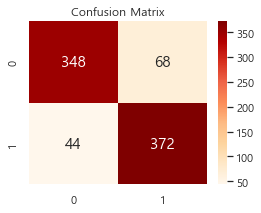

In [213]:
y_pred = model.predict(x)
print('accuracy: %.2f' % accuracy_score(y, y_pred))
print('precision: %.2f' % precision_score(y, y_pred))
print('recall: %.2f' % recall_score(y, y_pred))
print('F1: %.2f' % f1_score(y, y_pred))
 
# confusion matrix
 
confu = confusion_matrix(y_true = y, y_pred = y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [214]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(model.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(model.coef_[0])), reverse = False)

In [215]:
pos_index = sorted(((value, index) for index, value in enumerate(model.coef_[0])), reverse = True)
neg_index = sorted(((value, index) for index, value in enumerate(model.coef_[0])), reverse = False)

In [216]:
for coef in pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

예쁘다 2.1541701232351356
좋다 1.744625192953047
선물 1.643323302015406
자다 1.419941892543963
매일 1.3181162275783223
실물 1.2457914738779166
좋아하다 1.225112520548834
멋지다 1.1344344741129428
기운 1.127533417409146
만족하다 1.0823167905380113
고급스럽다 1.0780186318029912
아주 1.0731909745609216
해주다 1.040046012853029
상품 1.0017208506575144
행운 0.9954152368193365
커플 0.9527795046475547
감사하다 0.9398850035712115
사다 0.8552654327899101
번창 0.8520054779157665
좋아지다 0.8481344561908228


In [217]:
for coef in neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

끊어지다 -2.355836437895883
작다 -2.016264137707879
줄이다 -1.7351846962605504
아쉽다 -1.7056122661290802
실망 -1.248804093709254
빨간색 -1.170798722432968
약하다 -1.1703049423010377
늘어나다 -1.0676585375238654
크다 -1.0278876458005755
스톤 -0.9211467797572527
고무줄 -0.879560269845009
무난 -0.8206721962140466
다르다 -0.814119867795863
별로 -0.8068435450223831
깔끔하다 -0.8028296469462948
아쉬움 -0.7898733857264989
버리다 -0.7820195113069379
착용 -0.7683445307828514
터지다 -0.7328437042672645
싸다 -0.7205520927391035


In [219]:
word_count_dict

{'생각': 1,
 '괜찮다': 2,
 '딸도': 8,
 '사주다': 4,
 '구요': 2,
 '디자인': 2,
 '쁘구': 7,
 '깔끔하다': 1,
 '상자': 8,
 '포장': 2,
 '오니': 1,
 '선물': 1,
 '좋다': 2,
 '은은하다': 1,
 '튀다': 1,
 '사이즈': 1,
 '연령': 1,
 '상관없다': 1,
 '추천': 1,
 '만해': 1,
 '심플': 9,
 '찾다': 1,
 '원하다': 1,
 '반하다': 2,
 '구매': 1,
 '고급': 2,
 '스럽게': 1,
 '패킹': 1,
 '뜯다': 1,
 '아깝다': 4,
 '제품': 1,
 '사진': 1,
 '똑같다': 3,
 '남자친구': 1,
 '사려': 8,
 '마음': 1,
 '벌써': 13,
 '번째': 1,
 '만족스럽다': 1,
 '정성스럽다': 2,
 '기분': 1,
 '세트': 12,
 '예쁘다': 1,
 '친절하다': 4,
 '상담': 1,
 '해주다': 4,
 '해주시': 1,
 '상품': 3,
 '신랑': 1,
 '새해': 4,
 '가게': 1,
 '박다': 1,
 '지고': 2,
 '기대': 1,
 '이쁘다': 3,
 '감사하다': 1,
 '기운': 3,
 '대박': 1,
 '고민': 1,
 '사다': 2,
 '만족하다': 6,
 '생일': 3,
 '엄마': 1,
 '드리다': 1,
 '좋아하다': 4,
 '박스': 60,
 '자다': 1,
 '새롭다': 1,
 '시작': 2,
 '도움': 1,
 '생기다': 1,
 '등록': 1,
 '네이버': 2,
 '페이': 1,
 '주변': 1,
 '물어보다': 2,
 '이용': 1,
 '적당하다': 3,
 '실물': 1,
 '말씀드리다': 55,
 '보내다': 2,
 '하니': 1,
 '가격': 2,
 '상태': 1,
 '작다': 1,
 '스럽지': 1,
 '크리스탈': 2,
 '연애': 1,
 '높이다': 3,
 '착용': 1,
 '해봤다': 3,
 '일어나다': 6,
 '사랑': 1,
 '남편': 1,
 '

In [223]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager

def generate_wordcloud(data):
    """
    단어 빈도 데이터를 기반으로 WordCloud를 생성하고 시각화합니다.
    
    Parameters:
        data (dict): 단어 빈도를 나타내는 딕셔너리. 
                     키는 단어를 나타내며 값은 해당 단어의 빈도입니다.
    """
    # 한국어 TrueType 글꼴 경로 지정
    font_path = r"malgun.ttf"  # 예시 경로, 실제 경로로 변경해야 합니다.

    # WordCloud 객체 생성 및 한국어 TrueType 글꼴 설정 적용
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path)
    
    # generate_from_frequencies 함수를 사용하여 단어 빈도를 기반으로 WordCloud 생성
    wordcloud.generate_from_frequencies(data)
    
    # WordCloud를 시각화하여 출력
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_wordcloud(word_count_dict)


ValueError: Only supported for TrueType fonts

In [237]:
def extract_word(text):
    hangul = re.compile('[^가-힣]') 
    result = hangul.sub(' ', text) 
    return result

def preprocess(text, word_list):
    text = extract_word(text)
    okt = Okt()
    text = okt.morphs(text, stem = True)
    text = [x for x in text if x in word_list]
    return text

def analysis_review(df):
    # 한글 표현만 남기기
    df['리뷰내용'] = df['리뷰내용'].apply(lambda x : extract_word(x))
    
    # 띄어쓰기 고치기
    spcaing = Spacing()
    df['리뷰내용'] = df['리뷰내용'].apply(lambda x: spacing(x))
    
    # 형태소 분석
    okt = Okt()
    words = " ".join(df['리뷰내용'].tolist())
    words = okt.morphs(words, stem=True)
    
    # 한글자 제거
    remove_one_word = [x for x in words if len(x)>1 ]
    
    # 불용어 제거
    with open('stopwords.txt', 'r') as f:
        list_file = f.readlines()
    stopwords = list_file[0].split(",")
    remove_stopwords = [x for x in remove_one_word if x not in stopwords]
    
    most_common = Counter(remove_stopwords).most_common()
    most_common_dict = dict(most_common)
    display(most_common_dict)
    
    #벡터화
    vectorizer = CountVectorizer(tokenizer = lambda x : preprocess(x, remove_stopwords))
    data_features = vectorizer.fit_transform(df['리뷰내용'].tolist())
    list_of_word = vectorizer.get_feature_names()
    count_list = data_features.toarray().sum(axis=0)
    word_count_dict = dict(zip(remove_stopwords, count_list))
    
    sorted_word_count_dict = dict(sorted(word_count_dict.items(), key=lambda item: item[1], reverse=True))
    display(sorted_word_count_dict)
    
    #TF-IDF
    tfidf_vectorizer = TfidfTransformer()
    tf_idf_vect = tfidf_vectorizer.fit_transform(data_features)
    invert_index_vectorizer = {v: k for k, v in vectorizer.vocabulary_.items()}
    
    df.loc[df['리뷰평점'] == 5 , 'P/N'] = 1
    df['P/N'] = df['P/N'].fillna(0)
    min_cnt = min(df['P/N'].value_counts().tolist())
    positive_random_idx = df[df['P/N']==1].sample(min_cnt, random_state=40).index.tolist()
    negative_random_idx = df[df['P/N']==0].sample(min_cnt, random_state=40).index.tolist()
    random_idx = positive_random_idx + negative_random_idx
    random.shuffle(random_idx)
    x = tf_idf_vect[random_idx]
    y = df['P/N'][random_idx]
    model = LogisticRegression()
    model.fit(x, y)
    
    y_pred = model.predict(x)
    print('accuracy: %.2f' % accuracy_score(y, y_pred))
    print('precision: %.2f' % precision_score(y, y_pred))
    print('recall: %.2f' % recall_score(y, y_pred))
    print('F1: %.2f' % f1_score(y, y_pred))
 
    # confusion matrix
 
    confu = confusion_matrix(y_true = y, y_pred = y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
    plt.title('Confusion Matrix')
    plt.show()
    
    coef_pos_index = sorted(((value, index) for index, value in enumerate(model.coef_[0])), reverse = True)
    coef_neg_index = sorted(((value, index) for index, value in enumerate(model.coef_[0])), reverse = False)
    pos_index = sorted(((value, index) for index, value in enumerate(model.coef_[0])), reverse = True)
    neg_index = sorted(((value, index) for index, value in enumerate(model.coef_[0])), reverse = False)
    print('-----------------------------------------------------------------------')
    print('-----------------------------------------------------------------------')
    print('-----------------------------------------------------------------------')
    print('긍정적 리뷰 중요도')
    for coef in pos_index[:20]:
        print(invert_index_vectorizer[coef[1]], coef[0])
    print('-----------------------------------------------------------------------')
    print('-----------------------------------------------------------------------')
    print('-----------------------------------------------------------------------')
    print('부정적 리뷰 중요도')
    for coef in neg_index[:20]:
        print(invert_index_vectorizer[coef[1]], coef[0])

In [229]:
review_analysis

,리뷰작성일시,작성자ID,상품명,리뷰평점,리뷰내용,label,P/N
0,2023-01-01 00:00:00,비회원,실버오닉스 앤느스톤,5,생각보다 괜찮았어요 우리 딸도 사주려 구요,기타,1.00
1,2023-01-01 00:00:00,비회원,로즈문 미스티스톤,5,디자인도 이 쁘구 요 깔끔하게 상자 포장으로 오니 선물하기도 좋아 보입니다,기타,1.00
2,2023-01-01 00:00:00,비회원,로즈크리스탈 에머스톤,5,은은해서 튀지도 않고 좋아요 사이즈도 조코 연령대 상관없이 추천만해요,기타,1.00
3,2023-01-01 00:00:00,비회원,로즈문 미스티스톤,5,심플한 걸 찾고 있었는데 사이즈도 원하던 사이즈에 무엇보다 보자마자 반해서 구매했어...,기타,1.00
4,2023-01-01 00:00:00,비회원,로즈크리스탈 코이스톤,5,마음에 쏙 들어 요,기타,1.00
...,...,...,...,...,...,...,...
2000,2023-12-30 19:35:00,fae361f39411c9b1be362029637a6dacc3ea488d32ec60...,호안오닉스 카네스톤,3,깔끔한 디자인이 좋네요,기타,0.00
2001,2023-12-30 19:36:00,3245296469@k,오닉스 디펜스톤,5,남편도 너무 만족하고 착용하고 있어요 사이즈도 딱 적당하고 편하게 착용하기 좋아요 ...,1.00,1.00
2002,2023-12-30 19:58:00,c7c791d3a0866f6ff3b742140cfe97aa76a0289f30c782...,호안오닉스 카네스톤,5,선물 받은 사람이 너무 예쁘다고 좋아해요 손목이 얇은 남자는 사이즈 면 될 꺼 같아요,기타,1.00
2003,2023-12-30 22:55:00,7c9163eacb20220bceb3ec6ff8d6b652ce8d6ea87375b0...,호안오닉스 스테디스톤,5,디자인도 이쁘고 너무 맘에 들어요,기타,1.00


In [238]:
analysis_review(review_analysis[review_analysis['리뷰평점'] == 5])

C:\Users\USER\AppData\Local\Temp\ipykernel_29556\4037730753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['리뷰내용'] = df['리뷰내용'].apply(lambda x : extract_word(x))
C:\Users\USER\AppData\Local\Temp\ipykernel_29556\4037730753.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['리뷰내용'] = df['리뷰내용'].apply(lambda x: spacing(x))


{'좋다': 851,
 '구매': 816,
 '등록': 624,
 '네이버': 624,
 '페이': 624,
 '자다': 307,
 '예쁘다': 285,
 '선물': 238,
 '착용': 172,
 '사이즈': 163,
 '배송': 159,
 '만족하다': 154,
 '디자인': 139,
 '제품': 116,
 '마음': 110,
 '빠르다': 107,
 '아주': 101,
 '맞다': 100,
 '팔찌': 97,
 '이쁘다': 94,
 '감사하다': 89,
 '좋아하다': 81,
 '상품': 77,
 '사다': 76,
 '다니다': 76,
 '포장': 68,
 '기운': 66,
 '주문': 62,
 '행운': 62,
 '생각': 60,
 '고급스럽다': 55,
 '생기다': 52,
 '손목': 52,
 '깔끔하다': 49,
 '커플': 43,
 '구입': 40,
 '실물': 39,
 '만족': 39,
 '해주다': 38,
 '기분': 37,
 '남편': 37,
 '듭니': 36,
 '추천': 35,
 '적당하다': 35,
 '색상': 35,
 '괜찮다': 34,
 '고급': 34,
 '멋지다': 34,
 '지다': 33,
 '사용': 33,
 '작다': 32,
 '크다': 32,
 '크기': 32,
 '바라다': 32,
 '드리다': 31,
 '퀄리티': 31,
 '사업': 31,
 '의미': 30,
 '어울리다': 29,
 '만족스럽다': 28,
 '가격': 28,
 '심플': 27,
 '사진': 27,
 '느낌': 27,
 '아들': 27,
 '쓰다': 27,
 '에도': 26,
 '가득하다': 26,
 '번창': 25,
 '친구': 24,
 '세트': 23,
 '신랑': 22,
 '최고': 22,
 '매일': 22,
 '남자친구': 21,
 '친절하다': 21,
 '사람': 21,
 '고민': 20,
 '편하다': 20,
 '감다': 20,
 '호안': 19,
 '상담': 18,
 '딱이다': 18,
 '하니': 17,
 '남자': 17,
 '드네': 

c:\users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'좋아하다': 624,
 '추하다': 624,
 '효과': 154,
 '완벽하다': 116,
 '패킹': 89,
 '쪼이다': 76,
 '멋지다': 62,
 '게요': 62,
 '묵직하다': 52,
 '둘레': 39,
 '오묘하다': 37,
 '도움': 34,
 '사람': 32,
 '부르다': 32,
 '싸다': 29,
 '스럽지': 27,
 '택배': 27,
 '상자': 26,
 '사르다': 26,
 '자동차': 21,
 '감사하다': 19,
 '박스': 16,
 '지네': 16,
 '추천': 15,
 '커플링': 15,
 '배송': 15,
 '커서': 14,
 '분위기': 14,
 '감다': 14,
 '남편': 13,
 '고르다': 13,
 '처음': 12,
 '기대하다': 12,
 '기운': 11,
 '교환': 11,
 '오랜': 11,
 '팔지': 11,
 '품격': 10,
 '파다': 10,
 '기분': 9,
 '상품': 8,
 '쁨니': 8,
 '인스타': 8,
 '싸이': 8,
 '벌써': 7,
 '생일': 7,
 '드리다': 7,
 '팍팍': 7,
 '진주': 7,
 '치고': 7,
 '해드리다': 7,
 '미도': 7,
 '똑같다': 6,
 '페이': 6,
 '색깔': 6,
 '굿굿굿': 6,
 '뇌출혈': 6,
 '강도': 6,
 '만족': 5,
 '대박': 5,
 '다니다': 5,
 '크다': 5,
 '알도': 5,
 '튼튼하다': 5,
 '여자친구': 5,
 '우연': 5,
 '대학생': 5,
 '늦다': 5,
 '가득': 5,
 '바라다': 5,
 '차다': 5,
 '키링': 5,
 '여기다': 5,
 '반하다': 4,
 '제품': 4,
 '사진': 4,
 '박다': 4,
 '가볍다': 4,
 '부담': 4,
 '퇴원': 4,
 '자연': 4,
 '요청': 4,
 '지인': 4,
 '부족하다': 4,
 '아내': 4,
 '드럽다': 4,
 '잘살다': 4,
 '독특하다': 4,
 '사고': 4,
 '다르다': 4,
 '달다': 4,
 

C:\Users\USER\AppData\Local\Temp\ipykernel_29556\4037730753.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P/N'] = df['P/N'].fillna(0)


ValueError: a must be greater than 0 unless no samples are taken

In [239]:
analysis_review(review_analysis[review_analysis['리뷰평점'] != 5])

C:\Users\USER\AppData\Local\Temp\ipykernel_29556\4037730753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['리뷰내용'] = df['리뷰내용'].apply(lambda x : extract_word(x))
C:\Users\USER\AppData\Local\Temp\ipykernel_29556\4037730753.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['리뷰내용'] = df['리뷰내용'].apply(lambda x: spacing(x))


{'구매': 215,
 '등록': 191,
 '네이버': 191,
 '페이': 191,
 '좋다': 115,
 '착용': 69,
 '사이즈': 58,
 '끊어지다': 57,
 '줄이다': 48,
 '자다': 46,
 '작다': 45,
 '생각': 37,
 '주문': 35,
 '아쉽다': 32,
 '배송': 31,
 '예쁘다': 31,
 '제품': 31,
 '디자인': 24,
 '사용': 23,
 '팔찌': 23,
 '크다': 23,
 '약하다': 22,
 '만족하다': 21,
 '괜찮다': 21,
 '손목': 21,
 '버리다': 21,
 '가격': 20,
 '선물': 18,
 '이쁘다': 17,
 '맞다': 17,
 '크기': 15,
 '마음': 15,
 '터지다': 15,
 '빠르다': 14,
 '다니다': 14,
 '지다': 14,
 '빨간색': 14,
 '빼다': 13,
 '실망': 13,
 '싸다': 13,
 '만에': 13,
 '깔끔하다': 12,
 '고무줄': 12,
 '무난': 12,
 '느낌': 12,
 '늘어나다': 11,
 '만들다': 11,
 '사진': 11,
 '행운': 10,
 '상품': 10,
 '교환': 10,
 '굵다': 10,
 '스톤': 10,
 '아들': 10,
 '색깔': 10,
 '구슬': 9,
 '가죽': 9,
 '기분': 9,
 '아주': 9,
 '끌다': 9,
 '아쉬움': 9,
 '색상': 9,
 '얇다': 9,
 '심플': 8,
 '중간': 8,
 '반품': 8,
 '구입': 8,
 '호안': 8,
 '오닉스': 8,
 '빠지다': 8,
 '이틀': 8,
 '가볍다': 7,
 '감사하다': 7,
 '매듭': 7,
 '튼튼하다': 7,
 '쓰다': 7,
 '끼다': 7,
 '떨어지다': 7,
 '대비': 7,
 '비싸다': 7,
 '다르다': 7,
 '기운': 7,
 '사다': 7,
 '금방': 7,
 '하루': 7,
 '기대': 6,
 '포장': 6,
 '처리': 6,
 '늘다': 6,
 '제작': 6,
 '추가

c:\users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'제작': 48,
 '며칠': 32,
 '자연스럽다': 31,
 '오브': 24,
 '일주일': 23,
 '깨다': 21,
 '실망': 15,
 '튼튼하다': 15,
 '사위': 15,
 '기쁨': 14,
 '수가': 13,
 '듣다': 12,
 '서리': 12,
 '파다': 10,
 '굵다': 10,
 '감각': 10,
 '금속': 9,
 '이쁘다': 9,
 '묶음': 9,
 '관심': 9,
 '자다': 8,
 '무광': 8,
 '상태': 8,
 '터지다': 8,
 '인지': 8,
 '바라다': 7,
 '왠지': 7,
 '포장': 6,
 '디자인': 6,
 '추가': 6,
 '사람': 6,
 '사정': 6,
 '구김': 6,
 '주변': 5,
 '걸리다': 5,
 '가버리다': 5,
 '없엇으': 5,
 '참고': 5,
 '병원': 4,
 '다니다': 4,
 '듭니': 4,
 '괜찮다': 4,
 '신청': 4,
 '끊어지다': 4,
 '나이': 4,
 '느리다': 4,
 '끼다': 4,
 '언급': 4,
 '압니': 4,
 '아들': 4,
 '남성': 4,
 '고맙다': 3,
 '기대': 3,
 '페이': 3,
 '복귀': 3,
 '상당하다': 3,
 '에도': 3,
 '생각': 3,
 '종류': 3,
 '사이': 3,
 '구슬': 3,
 '드럽다': 3,
 '돌리다': 3,
 '후기': 3,
 '손목': 3,
 '길이': 3,
 '줄이다': 3,
 '신중하다': 3,
 '갯수': 3,
 '장식': 3,
 '하얀색': 3,
 '와이프': 3,
 '빠지다': 3,
 '복만': 3,
 '짜증': 3,
 '무게': 3,
 '안햇': 3,
 '인가요': 3,
 '오지': 3,
 '걷다': 3,
 '이틀': 3,
 '등록': 2,
 '퇴원': 2,
 '돌이': 2,
 '매듭': 2,
 '넣다': 2,
 '거슬리다': 2,
 '맞다': 2,
 '연하다': 2,
 '힘들다': 2,
 '선물': 2,
 '가격': 2,
 '정확하다': 2,
 '오닉스': 2,
 '젊다':

C:\Users\USER\AppData\Local\Temp\ipykernel_29556\4037730753.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P/N'] = df['P/N'].fillna(0)


ValueError: a must be greater than 0 unless no samples are taken

In [ ]:
analysis_review(review_analysis[review_analysis['작성자ID'] == '비회원'].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[~(review_analysis['작성자ID'] == '비회원')].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['label'] == 0].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['label'] == 1].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['label'] == 2].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['label'] == 3].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['label'] == 4].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['label'].isin([1,2,3])].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['label'].isin([4,5])].reset_index(drop=True))

In [ ]:
review_analysis['상품명'].value_counts()

In [ ]:
analysis_review(review_analysis[review_analysis['상품명'] == '호안오닉스 카네스톤'].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['상품명'] == '자마노 레브스톤 4mm'].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['상품명'] == '호안닉스 리치스톤'].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['상품명'] == '호안스트랩 리코스톤'].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['상품명'] == '아이아게이트 디오스톤'].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['리뷰작성일시'].dt.month == 1].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['리뷰작성일시'].dt.month == 2].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['리뷰작성일시'].dt.month == 3].reset_index(drop=True))

In [ ]:
pd.options.display.max_rows=None

In [ ]:
review_analysis[review_analysis['리뷰작성일시'].dt.month == 3]

In [ ]:
analysis_review(review_analysis[review_analysis['리뷰작성일시'].dt.month == 4].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['리뷰작성일시'].dt.month == 5].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['리뷰작성일시'].dt.month == 6].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['리뷰작성일시'].dt.month == 7].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['리뷰작성일시'].dt.month == 8].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['리뷰작성일시'].dt.month == 9].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['리뷰작성일시'].dt.month == 10].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['리뷰작성일시'].dt.month == 11].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['리뷰작성일시'].dt.month == 12].reset_index(drop=True))

{'구매': 688,
 '좋다': 593,
 '등록': 556,
 '네이버': 556,
 '페이': 556,
 '자다': 240,
 '예쁘다': 177,
 '착용': 157,
 '선물': 146,
 '배송': 138,
 '사이즈': 136,
 '디자인': 111,
 '만족하다': 105,
 '제품': 100,
 '아주': 86,
 '빠르다': 85,
 '마음': 77,
 '팔찌': 75,
 '이쁘다': 73,
 '맞다': 73,
 '상품': 71,
 '생각': 71,
 '감사하다': 54,
 '다니다': 54,
 '작다': 51,
 '좋아하다': 49,
 '사다': 49,
 '손목': 48,
 '주문': 47,
 '포장': 46,
 '기운': 43,
 '괜찮다': 42,
 '끊어지다': 38,
 '고급스럽다': 37,
 '크다': 37,
 '커플': 36,
 '구입': 36,
 '사용': 35,
 '줄이다': 32,
 '깔끔하다': 32,
 '생기다': 32,
 '행운': 31,
 '실물': 29,
 '아쉽다': 27,
 '크기': 27,
 '번창': 26,
 '사업': 26,
 '해주다': 25,
 '추천': 25,
 '사진': 24,
 '지다': 24,
 '가격': 24,
 '바라다': 23,
 '쓰다': 23,
 '굵다': 22,
 '적당하다': 22,
 '남편': 22,
 '느낌': 22,
 '기분': 21,
 '의미': 20,
 '심플': 20,
 '만족': 20,
 '멋지다': 20,
 '드네': 20,
 '신랑': 20,
 '듭니': 19,
 '에도': 18,
 '드리다': 18,
 '사람': 18,
 '끼다': 18,
 '무난': 18,
 '퀄리티': 18,
 '남자친구': 18,
 '아들': 17,
 '호안': 17,
 '품질': 16,
 '추가': 16,
 '고급': 16,
 '친구': 15,
 '색상': 15,
 '버리다': 15,
 '교환': 14,
 '감다': 14,
 '해도': 14,
 '스톤': 14,
 '부자': 14,
 '의사':

c:\users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'중간': 157,
 '사이즈': 75,
 '딱이다': 73,
 '감다': 49,
 '아빠': 38,
 '짧다': 36,
 '손목': 36,
 '선물': 32,
 '작다': 31,
 '크기': 29,
 '완소템': 27,
 '아쉽다': 26,
 '빠지다': 25,
 '가성': 17,
 '뜯다': 16,
 '번창': 15,
 '만족도': 14,
 '줄이다': 13,
 '딸도': 12,
 '깔끔하다': 10,
 '밴드': 10,
 '부여': 10,
 '아주': 9,
 '리뷰': 9,
 '부드럽다': 9,
 '벌다': 8,
 '호안': 8,
 '하얀색': 8,
 '퀠리티': 7,
 '부담': 7,
 '삐지다': 6,
 '해주다': 6,
 '심플': 6,
 '편하다': 6,
 '주문': 6,
 '포장': 5,
 '맞다': 5,
 '장식': 5,
 '쁘네': 5,
 '뿌네': 5,
 '닉스': 5,
 '신중하다': 4,
 '살짝': 4,
 '차다': 4,
 '끼다': 4,
 '라지': 4,
 '들어서다': 4,
 '수고': 4,
 '정확하다': 4,
 '쪼이다': 4,
 '견본': 4,
 '장난감': 4,
 '가상': 3,
 '감사': 3,
 '특이하다': 3,
 '최고': 3,
 '예프': 3,
 '듭니': 3,
 '굵다': 3,
 '항상': 3,
 '현재': 3,
 '가볍다': 3,
 '베리': 3,
 '나이': 3,
 '의미': 2,
 '매일': 2,
 '페이': 2,
 '배송': 2,
 '게요': 2,
 '달라': 2,
 '려고': 2,
 '가득하다': 2,
 '건지다': 2,
 '변색': 2,
 '차산': 2,
 '와이프': 2,
 '좋아하다': 2,
 '꼼꼼하다': 2,
 '고민': 2,
 '걱정': 2,
 '예정': 2,
 '바라다': 2,
 '믿다': 2,
 '만족': 2,
 '걸리다': 2,
 '플라스틱': 2,
 '싸다': 2,
 '에끼': 2,
 '사장': 2,
 '크다': 2,
 '느끼다': 2,
 '생기며': 2,
 '커서': 2,
 '구성':

accuracy: 0.87
precision: 0.86
recall: 0.88
F1: 0.87


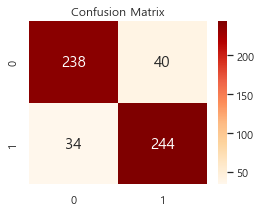

-----------------------------------------------------------------------
-----------------------------------------------------------------------
-----------------------------------------------------------------------
긍정적 리뷰 중요도
좋다 1.4089967464766004
선물 1.4063913570855309
예쁘다 1.3018116831973026
멋지다 1.1363308134583228
디자인 1.1075252179744755
커플 1.0838133924808075
아주 1.0169364013103503
자다 0.9932059642551934
감사하다 0.9513787694133166
고급스럽다 0.8654029530256556
기운 0.8648112801972228
상품 0.8489505260108537
사다 0.8119991793643357
마음 0.802806193407622
사업 0.7705784428444705
편이 0.7630283826943556
파다 0.760090525246671
팔찌 0.7585561291262087
좋아하다 0.7287847125480541
이쁘다 0.7041045171450594
-----------------------------------------------------------------------
-----------------------------------------------------------------------
-----------------------------------------------------------------------
부정적 리뷰 중요도
작다 -1.6794205460241969
줄이다 -1.576683370782317
끊어지다 -1.5665995893353972
아쉽다 -1.4896896259150365
빨간

In [264]:
analysis_review(review_analysis[review_analysis['리뷰작성일시'].dt.month.isin([3,4,5,6,7,8])].reset_index(drop=True))

In [ ]:
analysis_review(review_analysis[review_analysis['리뷰작성일시'].dt.month.isin([11,12])].reset_index(drop=True))

In [265]:
keywords = ['선물', '드렸', '커플', '부모님', '남편', '와이프']
keyword_reviews = review_analysis[review_analysis['리뷰내용'].str.contains('|'.join(keywords))]
total_reviews_per_month = review_analysis.groupby(review_analysis['리뷰작성일시'].dt.month).size()
keyword_reviews_per_month = keyword_reviews.groupby(keyword_reviews['리뷰작성일시'].dt.month).size()
keyword_ratio_per_month = keyword_reviews_per_month / total_reviews_per_month

keyword_ratio_per_month

리뷰작성일시
1    0.18
2    0.23
3    0.13
4    0.09
5    0.17
     ... 
8    0.16
9    0.07
10   0.15
11   0.21
12   0.15
Length: 12, dtype: float64

In [266]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

def preprocess_text(text):
    hangul = re.compile('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]+')
    result = hangul.sub('', text)
    return result

def word_to_vec(df, text):
    # 전처리
    df['리뷰내용'] = df['리뷰내용'].apply(preprocess_text)
    
    # 형태소 분석
    okt = Okt()
    words = df['리뷰내용'].apply(lambda x: okt.morphs(x, stem=True))
    
    # 한글자 제거 및 불용어 제거
    remove_one_word = [[word for word in sentence if len(word) > 1] for sentence in words]
    with open('stopwords.txt', 'r') as f:
        stopwords = f.read().split(",")
    remove_stopwords = [[word for word in sentence if word not in stopwords] for sentence in remove_one_word]
    
    # Word2Vec 모델 훈련
    model = Word2Vec(remove_stopwords, vector_size=100, window=5, min_count=1, workers=4)
    
    # 가장 유사한 단어 찾기
    similar_words = model.wv.most_similar(text, topn=20)
    print(f"단어 {text}와 유사한 단어들: {similar_words}")
    
    # 벡터 시각화
    X = model.wv[model.wv.index_to_key]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(result[:, 0], result[:, 1])
    words = list(model.wv.index_to_key)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.title('Word2Vec Visualization')
    plt.show()

단어 선물와 유사한 단어들: [('팔찌', 0.9994939565658569), ('손목', 0.9994857311248779), ('느낌', 0.9994797110557556), ('사다', 0.9994674921035767), ('크다', 0.9994649887084961), ('주문', 0.9994477033615112), ('끊어지다', 0.9994195699691772), ('예쁘다', 0.9994087815284729), ('좋다', 0.9994032382965088), ('생각', 0.9993875026702881), ('줄이다', 0.9993699789047241), ('의미', 0.9993698000907898), ('아쉽다', 0.9993640184402466), ('포장', 0.9993410110473633), ('상품', 0.9993383884429932), ('제품', 0.9993361234664917), ('스톤', 0.999313235282898), ('구입', 0.9993027448654175), ('끼다', 0.9993009567260742), ('사이즈', 0.9992948770523071)]


c:\users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


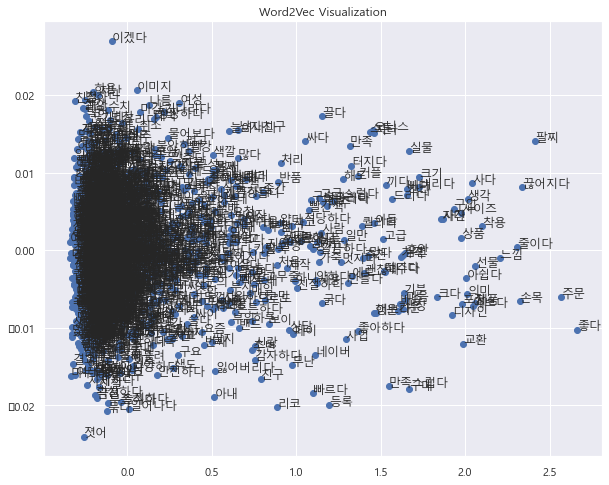

In [267]:
word_to_vec(review_analysis, '선물')

In [ ]:
ricomanz_productinfo

In [ ]:
ricomanz_productinfo['메인 원석'].dropna()

In [ ]:
stones = set()  # 돌 종류를 저장할 집합 생성
for row in ricomanz_productinfo['메인 원석'].dropna():
    stones.update(row.split(', '))  # 각 행을 콤마와 공백을 기준으로 분리하여 집합에 추가
stones_sorted = sorted(stones)  # 돌 종류를 알파벳순으로 정렬
print(', '.join(stones_sorted))  # 정렬된 돌 종류를 문자열로 변환하여 출력

In [ ]:
order_member_product_df = pd.merge(order_member_df, ricomanz_productinfo, left_on='주문상품명', right_on='상품명', how='left') 

In [ ]:
order_product_df = order_member_product_df[['주문일시', '주문자ID', '주문상품명', '수량','메인 원석', 'label']]

In [ ]:
pd.options.display.max_rows=10
pd.options.display.max_columns=10

In [ ]:
order_df.groupby([order_df['주문일시'].dt.month, '주문상품명'])['수량'].sum().to_frame().unstack()

In [ ]:
dropna_order_product_df = order_product_df.dropna()
stones_list = dropna_order_product_df['메인 원석'].str.split(', ')
all_stones = set()

for stones in stones_list:
    all_stones.update(stones)
all_stones

In [ ]:
dropna_order_product_df = order_product_df.dropna()
stones_list = dropna_order_product_df['메인 원석'].str.split(', ')
all_stones = set()
for stones in stones_list:
    all_stones.update(stones)
one_hot_df = pd.DataFrame(0, index=dropna_order_product_df['주문자ID'].index, columns=all_stones)

# 각 행의 원석에 대해 해당 열을 1로 설정
for i, stones in enumerate(stones_list):
    one_hot_df.loc[i, stones] = 1

one_hot_df